In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Benign 357
Malignanat 212


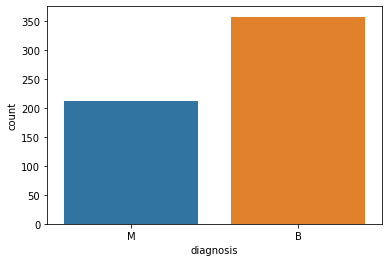

In [3]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Unnamed: 32']

In [5]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [7]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

<img src="Parameter Tunning 1.png">

<img src="Parameter Tunning 2.png">

<img src="Parameter Tunning 3.png">

In [ ]:
# ei Parameter Tunning mainly kon parameter koto efficient bahir kora hoy

In [8]:
# ei code Run korle onk time lage
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Using TensorFlow backend.
C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
409/409 [==============================] - 0s 667us/step - loss: 0.6833 - accuracy: 0.7017
Epoch 2/100
409/409 [==============================] - 0s 178us/step - loss: 0.5459 - accuracy: 0.9364
Epoch 3/100
409/409 [==============================] - 0s 203us/step - loss: 0.2505 - accuracy: 0.9633
Epoch 4/100
409/409 [==============================] - 0s 195us/step - loss: 0.1297 - accuracy: 0.9682
Epoch 5/100
409/409 [==============================] - ETA: 0s - loss: 0.1249 - accuracy: 0.96 - 0s 213us/step - loss: 0.0964 - accuracy: 0.9756
Epoch 6/100
409/409 [==============================] - 0s 210us/step - loss: 0.0830 - accuracy: 0.9804
Epoch 7/100
409/409 [==============================] - 0s 200us/step - loss: 0.0757 - accuracy: 0.9829
Epoch 8/100
409/409 [==============================] - 0s 210us/step - loss: 0.0709 - accuracy: 0.9829
Epoch 9/100
409/409 [==============================] - 0s 205us/step - loss: 0.0685 - accuracy: 0.9829
Epoch 10/100
409/409 [=========

409/409 [==============================] - 0s 183us/step - loss: 0.0116 - accuracy: 0.9976
Epoch 80/100
409/409 [==============================] - 0s 176us/step - loss: 0.0120 - accuracy: 0.9976
Epoch 81/100
409/409 [==============================] - 0s 181us/step - loss: 0.0115 - accuracy: 0.9976
Epoch 82/100
409/409 [==============================] - 0s 178us/step - loss: 0.0123 - accuracy: 0.9976
Epoch 83/100
409/409 [==============================] - 0s 176us/step - loss: 0.0121 - accuracy: 0.9951
Epoch 84/100
409/409 [==============================] - 0s 173us/step - loss: 0.0118 - accuracy: 0.9976
Epoch 85/100
409/409 [==============================] - 0s 181us/step - loss: 0.0107 - accuracy: 0.9976
Epoch 86/100
409/409 [==============================] - 0s 188us/step - loss: 0.0103 - accuracy: 0.9976
Epoch 87/100
409/409 [==============================] - 0s 173us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 88/100
409/409 [==============================] - 0s 181us/step - loss:

Epoch 58/100
409/409 [==============================] - 0s 191us/step - loss: 0.0167 - accuracy: 0.9951
Epoch 59/100
409/409 [==============================] - 0s 198us/step - loss: 0.0166 - accuracy: 0.9951
Epoch 60/100
409/409 [==============================] - 0s 195us/step - loss: 0.0156 - accuracy: 0.9951
Epoch 61/100
409/409 [==============================] - 0s 195us/step - loss: 0.0154 - accuracy: 0.9951
Epoch 62/100
409/409 [==============================] - 0s 186us/step - loss: 0.0145 - accuracy: 0.9951
Epoch 63/100
409/409 [==============================] - 0s 187us/step - loss: 0.0135 - accuracy: 0.9951
Epoch 64/100
409/409 [==============================] - 0s 187us/step - loss: 0.0124 - accuracy: 0.9951
Epoch 65/100
409/409 [==============================] - 0s 188us/step - loss: 0.0117 - accuracy: 0.9951
Epoch 66/100
409/409 [==============================] - 0s 182us/step - loss: 0.0117 - accuracy: 0.9976
Epoch 67/100
409/409 [==============================] - 0s 185us

409/409 [==============================] - 0s 222us/step - loss: 0.0355 - accuracy: 0.9902
Epoch 37/100
409/409 [==============================] - 0s 195us/step - loss: 0.0347 - accuracy: 0.9902
Epoch 38/100
409/409 [==============================] - 0s 188us/step - loss: 0.0341 - accuracy: 0.9902
Epoch 39/100
409/409 [==============================] - 0s 176us/step - loss: 0.0332 - accuracy: 0.9902
Epoch 40/100
409/409 [==============================] - 0s 183us/step - loss: 0.0324 - accuracy: 0.9902
Epoch 41/100
409/409 [==============================] - 0s 198us/step - loss: 0.0317 - accuracy: 0.9902
Epoch 42/100
409/409 [==============================] - 0s 203us/step - loss: 0.0309 - accuracy: 0.9902
Epoch 43/100
409/409 [==============================] - 0s 188us/step - loss: 0.0304 - accuracy: 0.9902
Epoch 44/100
409/409 [==============================] - 0s 187us/step - loss: 0.0299 - accuracy: 0.9902
Epoch 45/100
409/409 [==============================] - 0s 183us/step - loss:

Epoch 15/100
409/409 [==============================] - 0s 379us/step - loss: 0.0463 - accuracy: 0.9902
Epoch 16/100
409/409 [==============================] - 0s 271us/step - loss: 0.0445 - accuracy: 0.9902
Epoch 17/100
409/409 [==============================] - 0s 208us/step - loss: 0.0433 - accuracy: 0.9902
Epoch 18/100
409/409 [==============================] - 0s 188us/step - loss: 0.0417 - accuracy: 0.9902
Epoch 19/100
409/409 [==============================] - 0s 178us/step - loss: 0.0405 - accuracy: 0.9902
Epoch 20/100
409/409 [==============================] - 0s 176us/step - loss: 0.0393 - accuracy: 0.9902
Epoch 21/100
409/409 [==============================] - 0s 183us/step - loss: 0.0381 - accuracy: 0.9902
Epoch 22/100
409/409 [==============================] - 0s 173us/step - loss: 0.0372 - accuracy: 0.9902
Epoch 23/100
409/409 [==============================] - 0s 176us/step - loss: 0.0359 - accuracy: 0.9927
Epoch 24/100
409/409 [==============================] - 0s 176us

409/409 [==============================] - 0s 178us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 94/100
409/409 [==============================] - 0s 181us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 95/100
409/409 [==============================] - 0s 178us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 96/100
409/409 [==============================] - 0s 176us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 97/100
409/409 [==============================] - 0s 176us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 98/100
409/409 [==============================] - 0s 173us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 99/100
409/409 [==============================] - 0s 176us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 100/100
409/409 [==============================] - 0s 176us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1/100
409/409 [==============================] - 0s 606us/step - loss: 0.6807 - accuracy: 0.8191
Epoch 2/100
409/409 [==============================] - 0s 178us/step - loss: 

409/409 [==============================] - 0s 244us/step - loss: 0.0061 - accuracy: 0.9976
Epoch 72/100
409/409 [==============================] - 0s 232us/step - loss: 0.0061 - accuracy: 0.9976
Epoch 73/100
409/409 [==============================] - 0s 230us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 74/100
409/409 [==============================] - 0s 213us/step - loss: 0.0057 - accuracy: 0.9976
Epoch 75/100
409/409 [==============================] - 0s 213us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 76/100
409/409 [==============================] - 0s 215us/step - loss: 0.0050 - accuracy: 0.9976
Epoch 77/100
409/409 [==============================] - 0s 208us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 78/100
409/409 [==============================] - 0s 244us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 79/100
409/409 [==============================] - 0s 217us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 80/100
409/409 [==============================] - 0s 239us/step - loss:

410/410 [==============================] - 0s 195us/step - loss: 0.0152 - accuracy: 0.9951
Epoch 50/100
410/410 [==============================] - 0s 176us/step - loss: 0.0149 - accuracy: 0.9951
Epoch 51/100
410/410 [==============================] - 0s 161us/step - loss: 0.0138 - accuracy: 0.9976
Epoch 52/100
410/410 [==============================] - 0s 161us/step - loss: 0.0130 - accuracy: 0.9976
Epoch 53/100
410/410 [==============================] - 0s 166us/step - loss: 0.0123 - accuracy: 0.9976
Epoch 54/100
410/410 [==============================] - 0s 200us/step - loss: 0.0115 - accuracy: 0.9976
Epoch 55/100
410/410 [==============================] - 0s 212us/step - loss: 0.0109 - accuracy: 0.9976
Epoch 56/100
410/410 [==============================] - 0s 215us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 57/100
410/410 [==============================] - 0s 258us/step - loss: 0.0099 - accuracy: 0.9976
Epoch 58/100
410/410 [==============================] - 0s 215us/step - loss:

410/410 [==============================] - 0s 188us/step - loss: 0.0404 - accuracy: 0.9902
Epoch 28/100
410/410 [==============================] - 0s 197us/step - loss: 0.0396 - accuracy: 0.9902
Epoch 29/100
410/410 [==============================] - 0s 193us/step - loss: 0.0387 - accuracy: 0.9902
Epoch 30/100
410/410 [==============================] - 0s 180us/step - loss: 0.0381 - accuracy: 0.9902
Epoch 31/100
410/410 [==============================] - 0s 178us/step - loss: 0.0370 - accuracy: 0.9902
Epoch 32/100
410/410 [==============================] - 0s 185us/step - loss: 0.0360 - accuracy: 0.9902
Epoch 33/100
410/410 [==============================] - 0s 190us/step - loss: 0.0357 - accuracy: 0.9902
Epoch 34/100
410/410 [==============================] - 0s 185us/step - loss: 0.0348 - accuracy: 0.9902
Epoch 35/100
410/410 [==============================] - 0s 185us/step - loss: 0.0340 - accuracy: 0.9902
Epoch 36/100
410/410 [==============================] - 0s 188us/step - loss:

410/410 [==============================] - 0s 188us/step - loss: 0.0985 - accuracy: 0.9732
Epoch 6/100
410/410 [==============================] - 0s 185us/step - loss: 0.0850 - accuracy: 0.9756
Epoch 7/100
410/410 [==============================] - 0s 193us/step - loss: 0.0772 - accuracy: 0.9829
Epoch 8/100
410/410 [==============================] - 0s 193us/step - loss: 0.0719 - accuracy: 0.9854
Epoch 9/100
410/410 [==============================] - 0s 219us/step - loss: 0.0682 - accuracy: 0.9854
Epoch 10/100
410/410 [==============================] - 0s 190us/step - loss: 0.0655 - accuracy: 0.9854
Epoch 11/100
410/410 [==============================] - 0s 180us/step - loss: 0.0627 - accuracy: 0.9878
Epoch 12/100
410/410 [==============================] - 0s 188us/step - loss: 0.0609 - accuracy: 0.9878
Epoch 13/100
410/410 [==============================] - 0s 189us/step - loss: 0.0582 - accuracy: 0.9878
Epoch 14/100
410/410 [==============================] - 0s 181us/step - loss: 0.0

410/410 [==============================] - 0s 268us/step - loss: 0.0089 - accuracy: 0.9976
Epoch 84/100
410/410 [==============================] - 0s 256us/step - loss: 0.0085 - accuracy: 0.9976
Epoch 85/100
410/410 [==============================] - 0s 251us/step - loss: 0.0075 - accuracy: 0.9976
Epoch 86/100
410/410 [==============================] - 0s 254us/step - loss: 0.0069 - accuracy: 0.9976
Epoch 87/100
410/410 [==============================] - 0s 212us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 88/100
410/410 [==============================] - 0s 190us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 89/100
410/410 [==============================] - 0s 185us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 90/100
410/410 [==============================] - 0s 176us/step - loss: 0.0420 - accuracy: 0.9927
Epoch 91/100
410/410 [==============================] - 0s 195us/step - loss: 0.0202 - accuracy: 0.9878
Epoch 92/100
410/410 [==============================] - 0s 185us/step - loss:

410/410 [==============================] - 0s 193us/step - loss: 0.0373 - accuracy: 0.9902
Epoch 62/100
410/410 [==============================] - 0s 193us/step - loss: 0.0370 - accuracy: 0.9902
Epoch 63/100
410/410 [==============================] - 0s 190us/step - loss: 0.0368 - accuracy: 0.9902
Epoch 64/100
410/410 [==============================] - 0s 258us/step - loss: 0.0365 - accuracy: 0.9902
Epoch 65/100
410/410 [==============================] - 0s 239us/step - loss: 0.0361 - accuracy: 0.9902
Epoch 66/100
410/410 [==============================] - 0s 239us/step - loss: 0.0357 - accuracy: 0.9902
Epoch 67/100
410/410 [==============================] - 0s 244us/step - loss: 0.0356 - accuracy: 0.9902
Epoch 68/100
410/410 [==============================] - 0s 218us/step - loss: 0.0352 - accuracy: 0.9902
Epoch 69/100
410/410 [==============================] - 0s 229us/step - loss: 0.0348 - accuracy: 0.9902
Epoch 70/100
410/410 [==============================] - 0s 173us/step - loss:

410/410 [==============================] - 0s 219us/step - loss: 0.0290 - accuracy: 0.9902
Epoch 40/100
410/410 [==============================] - 0s 207us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 41/100
410/410 [==============================] - 0s 205us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 42/100
410/410 [==============================] - 0s 197us/step - loss: 0.0280 - accuracy: 0.9902
Epoch 43/100
410/410 [==============================] - 0s 197us/step - loss: 0.0268 - accuracy: 0.9902
Epoch 44/100
410/410 [==============================] - 0s 222us/step - loss: 0.0257 - accuracy: 0.9902
Epoch 45/100
410/410 [==============================] - 0s 212us/step - loss: 0.0254 - accuracy: 0.9927
Epoch 46/100
410/410 [==============================] - 0s 212us/step - loss: 0.0250 - accuracy: 0.9927
Epoch 47/100
410/410 [==============================] - 0s 210us/step - loss: 0.0244 - accuracy: 0.9927
Epoch 48/100
410/410 [==============================] - 0s 210us/step - loss:

Epoch 18/100
409/409 [==============================] - 0s 183us/step - loss: 0.0536 - accuracy: 0.9878
Epoch 19/100
409/409 [==============================] - 0s 170us/step - loss: 0.0528 - accuracy: 0.9878
Epoch 20/100
409/409 [==============================] - 0s 170us/step - loss: 0.0520 - accuracy: 0.9878
Epoch 21/100
409/409 [==============================] - 0s 171us/step - loss: 0.0503 - accuracy: 0.9878
Epoch 22/100
409/409 [==============================] - 0s 176us/step - loss: 0.0480 - accuracy: 0.9878
Epoch 23/100
409/409 [==============================] - 0s 176us/step - loss: 0.0482 - accuracy: 0.9878
Epoch 24/100
409/409 [==============================] - 0s 198us/step - loss: 0.0470 - accuracy: 0.9878
Epoch 25/100
409/409 [==============================] - 0s 188us/step - loss: 0.0459 - accuracy: 0.9878
Epoch 26/100
409/409 [==============================] - 0s 195us/step - loss: 0.0449 - accuracy: 0.9878
Epoch 27/100
409/409 [==============================] - 0s 210us

409/409 [==============================] - 0s 178us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 97/100
409/409 [==============================] - 0s 186us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 98/100
409/409 [==============================] - 0s 169us/step - loss: 0.0064 - accuracy: 0.9976
Epoch 99/100
409/409 [==============================] - 0s 173us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 100/100
409/409 [==============================] - 0s 195us/step - loss: 0.0050 - accuracy: 0.9976
Epoch 1/100
409/409 [==============================] - 0s 485us/step - loss: 0.6520 - accuracy: 0.7971
Epoch 2/100
409/409 [==============================] - 0s 164us/step - loss: 0.4709 - accuracy: 0.9364
Epoch 3/100
409/409 [==============================] - 0s 171us/step - loss: 0.2991 - accuracy: 0.9487
Epoch 4/100
409/409 [==============================] - 0s 173us/step - loss: 0.2012 - accuracy: 0.9535
Epoch 5/100
409/409 [==============================] - 0s 171us/step - loss: 0.1

Epoch 75/100
409/409 [==============================] - 0s 188us/step - loss: 0.0127 - accuracy: 0.9951
Epoch 76/100
409/409 [==============================] - 0s 183us/step - loss: 0.0112 - accuracy: 0.9951
Epoch 77/100
409/409 [==============================] - 0s 178us/step - loss: 0.0132 - accuracy: 0.9951
Epoch 78/100
409/409 [==============================] - 0s 176us/step - loss: 0.0111 - accuracy: 0.9951
Epoch 79/100
409/409 [==============================] - 0s 186us/step - loss: 0.0103 - accuracy: 0.9951
Epoch 80/100
409/409 [==============================] - 0s 173us/step - loss: 0.0095 - accuracy: 0.9951
Epoch 81/100
409/409 [==============================] - 0s 186us/step - loss: 0.0093 - accuracy: 0.9951
Epoch 82/100
409/409 [==============================] - 0s 176us/step - loss: 0.0084 - accuracy: 0.9951
Epoch 83/100
409/409 [==============================] - 0s 176us/step - loss: 0.0084 - accuracy: 0.9951
Epoch 84/100
409/409 [==============================] - ETA: 0s 

409/409 [==============================] - 0s 186us/step - loss: 0.0269 - accuracy: 0.9902
Epoch 54/100
409/409 [==============================] - 0s 176us/step - loss: 0.0264 - accuracy: 0.9902
Epoch 55/100
409/409 [==============================] - 0s 176us/step - loss: 0.0274 - accuracy: 0.9902
Epoch 56/100
409/409 [==============================] - 0s 178us/step - loss: 0.0255 - accuracy: 0.9902
Epoch 57/100
409/409 [==============================] - 0s 173us/step - loss: 0.0253 - accuracy: 0.9902
Epoch 58/100
409/409 [==============================] - 0s 181us/step - loss: 0.0246 - accuracy: 0.9902
Epoch 59/100
409/409 [==============================] - 0s 186us/step - loss: 0.0235 - accuracy: 0.9902
Epoch 60/100
409/409 [==============================] - 0s 176us/step - loss: 0.0236 - accuracy: 0.9902
Epoch 61/100
409/409 [==============================] - 0s 176us/step - loss: 0.0222 - accuracy: 0.9902
Epoch 62/100
409/409 [==============================] - 0s 173us/step - loss:

Epoch 32/100
409/409 [==============================] - 0s 178us/step - loss: 0.0331 - accuracy: 0.9927
Epoch 33/100
409/409 [==============================] - 0s 176us/step - loss: 0.0316 - accuracy: 0.9927
Epoch 34/100
409/409 [==============================] - 0s 176us/step - loss: 0.0312 - accuracy: 0.9927
Epoch 35/100
409/409 [==============================] - 0s 178us/step - loss: 0.0303 - accuracy: 0.9927
Epoch 36/100
409/409 [==============================] - 0s 181us/step - loss: 0.0303 - accuracy: 0.9927
Epoch 37/100
409/409 [==============================] - 0s 188us/step - loss: 0.0291 - accuracy: 0.9927
Epoch 38/100
409/409 [==============================] - 0s 183us/step - loss: 0.0298 - accuracy: 0.9927
Epoch 39/100
409/409 [==============================] - 0s 181us/step - loss: 0.0285 - accuracy: 0.9927
Epoch 40/100
409/409 [==============================] - 0s 176us/step - loss: 0.0274 - accuracy: 0.9927
Epoch 41/100
409/409 [==============================] - 0s 178us

409/409 [==============================] - 0s 183us/step - loss: 0.0539 - accuracy: 0.9878
Epoch 11/100
409/409 [==============================] - 0s 183us/step - loss: 0.0493 - accuracy: 0.9878
Epoch 12/100
409/409 [==============================] - 0s 181us/step - loss: 0.0459 - accuracy: 0.9902
Epoch 13/100
409/409 [==============================] - 0s 178us/step - loss: 0.0439 - accuracy: 0.9878
Epoch 14/100
409/409 [==============================] - 0s 186us/step - loss: 0.0406 - accuracy: 0.9927
Epoch 15/100
409/409 [==============================] - 0s 193us/step - loss: 0.0382 - accuracy: 0.9927
Epoch 16/100
409/409 [==============================] - 0s 178us/step - loss: 0.0364 - accuracy: 0.9927
Epoch 17/100
409/409 [==============================] - 0s 176us/step - loss: 0.0356 - accuracy: 0.9927
Epoch 18/100
409/409 [==============================] - 0s 178us/step - loss: 0.0332 - accuracy: 0.9927
Epoch 19/100
409/409 [==============================] - 0s 176us/step - loss:

409/409 [==============================] - 0s 193us/step - loss: 9.2966e-04 - accuracy: 1.0000
Epoch 89/100
409/409 [==============================] - 0s 186us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 90/100
409/409 [==============================] - 0s 178us/step - loss: 8.7821e-04 - accuracy: 1.0000
Epoch 91/100
409/409 [==============================] - 0s 200us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 92/100
409/409 [==============================] - 0s 171us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 93/100
409/409 [==============================] - 0s 178us/step - loss: 8.2876e-04 - accuracy: 1.0000
Epoch 94/100
409/409 [==============================] - 0s 173us/step - loss: 7.4846e-04 - accuracy: 1.0000
Epoch 95/100
409/409 [==============================] - 0s 181us/step - loss: 8.6294e-04 - accuracy: 1.0000
Epoch 96/100
409/409 [==============================] - 0s 171us/step - loss: 8.6981e-04 - accuracy: 1.0000
Epoch 97/100
409/409 [==============================]

410/410 [==============================] - 0s 190us/step - loss: 0.0113 - accuracy: 0.9976
Epoch 67/100
410/410 [==============================] - 0s 190us/step - loss: 0.0105 - accuracy: 0.9976
Epoch 68/100
410/410 [==============================] - 0s 178us/step - loss: 0.0107 - accuracy: 0.9976
Epoch 69/100
410/410 [==============================] - 0s 173us/step - loss: 0.0103 - accuracy: 0.9976
Epoch 70/100
410/410 [==============================] - 0s 178us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 71/100
410/410 [==============================] - 0s 176us/step - loss: 0.0094 - accuracy: 0.9976
Epoch 72/100
410/410 [==============================] - 0s 176us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 73/100
410/410 [==============================] - 0s 176us/step - loss: 0.0089 - accuracy: 0.9976
Epoch 74/100
410/410 [==============================] - 0s 173us/step - loss: 0.0087 - accuracy: 0.9976
Epoch 75/100
410/410 [==============================] - 0s 168us/step - loss:

410/410 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.98 - 0s 178us/step - loss: 0.0306 - accuracy: 0.9902
Epoch 45/100
410/410 [==============================] - 0s 178us/step - loss: 0.0311 - accuracy: 0.9902
Epoch 46/100
410/410 [==============================] - 0s 176us/step - loss: 0.0303 - accuracy: 0.9902
Epoch 47/100
410/410 [==============================] - 0s 176us/step - loss: 0.0298 - accuracy: 0.9902
Epoch 48/100
410/410 [==============================] - 0s 176us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 49/100
410/410 [==============================] - 0s 173us/step - loss: 0.0290 - accuracy: 0.9902
Epoch 50/100
410/410 [==============================] - 0s 173us/step - loss: 0.0284 - accuracy: 0.9902
Epoch 51/100
410/410 [==============================] - 0s 168us/step - loss: 0.0273 - accuracy: 0.9902
Epoch 52/100
410/410 [==============================] - 0s 173us/step - loss: 0.0282 - accuracy: 0.9902
Epoch 53/100
410/410 [=============

410/410 [==============================] - 0s 173us/step - loss: 0.0482 - accuracy: 0.9878
Epoch 23/100
410/410 [==============================] - 0s 171us/step - loss: 0.0470 - accuracy: 0.9878
Epoch 24/100
410/410 [==============================] - 0s 168us/step - loss: 0.0461 - accuracy: 0.9878
Epoch 25/100
410/410 [==============================] - 0s 171us/step - loss: 0.0456 - accuracy: 0.9878
Epoch 26/100
410/410 [==============================] - 0s 166us/step - loss: 0.0438 - accuracy: 0.9878
Epoch 27/100
410/410 [==============================] - 0s 183us/step - loss: 0.0439 - accuracy: 0.9902
Epoch 28/100
410/410 [==============================] - 0s 168us/step - loss: 0.0418 - accuracy: 0.9902
Epoch 29/100
410/410 [==============================] - 0s 173us/step - loss: 0.0422 - accuracy: 0.9902
Epoch 30/100
410/410 [==============================] - 0s 168us/step - loss: 0.0402 - accuracy: 0.9902
Epoch 31/100
410/410 [==============================] - 0s 168us/step - loss:

410/410 [==============================] - 0s 185us/step - loss: 0.0051 - accuracy: 0.9976
Epoch 1/100
410/410 [==============================] - 0s 495us/step - loss: 0.6688 - accuracy: 0.8683
Epoch 2/100
410/410 [==============================] - 0s 163us/step - loss: 0.5415 - accuracy: 0.9512
Epoch 3/100
410/410 [==============================] - 0s 171us/step - loss: 0.3773 - accuracy: 0.9585
Epoch 4/100
410/410 [==============================] - 0s 173us/step - loss: 0.2466 - accuracy: 0.9610
Epoch 5/100
410/410 [==============================] - 0s 183us/step - loss: 0.1637 - accuracy: 0.9659
Epoch 6/100
410/410 [==============================] - 0s 176us/step - loss: 0.1202 - accuracy: 0.9659
Epoch 7/100
410/410 [==============================] - 0s 185us/step - loss: 0.0980 - accuracy: 0.9732
Epoch 8/100
410/410 [==============================] - 0s 166us/step - loss: 0.0864 - accuracy: 0.9780
Epoch 9/100
410/410 [==============================] - 0s 173us/step - loss: 0.0797 -

410/410 [==============================] - 0s 176us/step - loss: 0.0264 - accuracy: 0.9902
Epoch 79/100
410/410 [==============================] - 0s 176us/step - loss: 0.0265 - accuracy: 0.9902
Epoch 80/100
410/410 [==============================] - 0s 176us/step - loss: 0.0257 - accuracy: 0.9902
Epoch 81/100
410/410 [==============================] - 0s 178us/step - loss: 0.0251 - accuracy: 0.9902
Epoch 82/100
410/410 [==============================] - 0s 171us/step - loss: 0.0244 - accuracy: 0.9902
Epoch 83/100
410/410 [==============================] - 0s 183us/step - loss: 0.0249 - accuracy: 0.9902
Epoch 84/100
410/410 [==============================] - 0s 173us/step - loss: 0.0240 - accuracy: 0.9902
Epoch 85/100
410/410 [==============================] - 0s 178us/step - loss: 0.0238 - accuracy: 0.9902
Epoch 86/100
410/410 [==============================] - 0s 173us/step - loss: 0.0230 - accuracy: 0.9902
Epoch 87/100
410/410 [==============================] - 0s 168us/step - loss:

Epoch 57/100
410/410 [==============================] - 0s 185us/step - loss: 0.0262 - accuracy: 0.9878
Epoch 58/100
410/410 [==============================] - 0s 178us/step - loss: 0.0224 - accuracy: 0.9902
Epoch 59/100
410/410 [==============================] - 0s 173us/step - loss: 0.0238 - accuracy: 0.9902
Epoch 60/100
410/410 [==============================] - 0s 180us/step - loss: 0.0235 - accuracy: 0.9878
Epoch 61/100
410/410 [==============================] - 0s 173us/step - loss: 0.0219 - accuracy: 0.9902
Epoch 62/100
410/410 [==============================] - 0s 166us/step - loss: 0.0211 - accuracy: 0.9902
Epoch 63/100
410/410 [==============================] - 0s 171us/step - loss: 0.0207 - accuracy: 0.9902
Epoch 64/100
410/410 [==============================] - 0s 178us/step - loss: 0.0204 - accuracy: 0.9902
Epoch 65/100
410/410 [==============================] - 0s 171us/step - loss: 0.0187 - accuracy: 0.9927
Epoch 66/100
410/410 [==============================] - 0s 176us

409/409 [==============================] - 0s 193us/step - loss: 0.0353 - accuracy: 0.9902
Epoch 36/500
409/409 [==============================] - 0s 198us/step - loss: 0.0348 - accuracy: 0.9902
Epoch 37/500
409/409 [==============================] - 0s 183us/step - loss: 0.0348 - accuracy: 0.9902
Epoch 38/500
409/409 [==============================] - 0s 183us/step - loss: 0.0333 - accuracy: 0.9902
Epoch 39/500
409/409 [==============================] - 0s 188us/step - loss: 0.0329 - accuracy: 0.9902
Epoch 40/500
409/409 [==============================] - 0s 188us/step - loss: 0.0324 - accuracy: 0.9902
Epoch 41/500
409/409 [==============================] - 0s 186us/step - loss: 0.0316 - accuracy: 0.9902
Epoch 42/500
409/409 [==============================] - 0s 183us/step - loss: 0.0312 - accuracy: 0.9902
Epoch 43/500
409/409 [==============================] - 0s 181us/step - loss: 0.0305 - accuracy: 0.9902
Epoch 44/500
409/409 [==============================] - 0s 188us/step - loss:

409/409 [==============================] - 0s 198us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 114/500
409/409 [==============================] - 0s 188us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 115/500
409/409 [==============================] - 0s 188us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 116/500
409/409 [==============================] - 0s 186us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 117/500
409/409 [==============================] - 0s 183us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 118/500
409/409 [==============================] - 0s 181us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 119/500
409/409 [==============================] - 0s 200us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 120/500
409/409 [==============================] - 0s 186us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 121/500
409/409 [==============================] - 0s 195us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 122/500
409/409 [==============================] - 0s 193us/ste

409/409 [==============================] - 0s 208us/step - loss: 1.2671e-04 - accuracy: 1.0000
Epoch 189/500
409/409 [==============================] - 0s 186us/step - loss: 1.2665e-04 - accuracy: 1.0000
Epoch 190/500
409/409 [==============================] - 0s 183us/step - loss: 1.2320e-04 - accuracy: 1.0000
Epoch 191/500
409/409 [==============================] - 0s 186us/step - loss: 1.1784e-04 - accuracy: 1.0000
Epoch 192/500
409/409 [==============================] - 0s 195us/step - loss: 1.1092e-04 - accuracy: 1.0000
Epoch 193/500
409/409 [==============================] - 0s 188us/step - loss: 1.1029e-04 - accuracy: 1.0000
Epoch 194/500
409/409 [==============================] - 0s 195us/step - loss: 1.1030e-04 - accuracy: 1.0000
Epoch 195/500
409/409 [==============================] - 0s 191us/step - loss: 1.0709e-04 - accuracy: 1.0000
Epoch 196/500
409/409 [==============================] - 0s 193us/step - loss: 1.0529e-04 - accuracy: 1.0000
Epoch 197/500
409/409 [==========

409/409 [==============================] - 0s 200us/step - loss: 1.7949e-05 - accuracy: 1.0000
Epoch 264/500
409/409 [==============================] - 0s 188us/step - loss: 1.7651e-05 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 208us/step - loss: 1.6796e-05 - accuracy: 1.0000
Epoch 266/500
409/409 [==============================] - 0s 183us/step - loss: 1.6361e-05 - accuracy: 1.0000
Epoch 267/500
409/409 [==============================] - 0s 193us/step - loss: 1.5630e-05 - accuracy: 1.0000
Epoch 268/500
409/409 [==============================] - 0s 193us/step - loss: 1.5695e-05 - accuracy: 1.0000
Epoch 269/500
409/409 [==============================] - 0s 191us/step - loss: 1.5612e-05 - accuracy: 1.0000
Epoch 270/500
409/409 [==============================] - 0s 188us/step - loss: 1.4823e-05 - accuracy: 1.0000
Epoch 271/500
409/409 [==============================] - 0s 188us/step - loss: 1.4739e-05 - accuracy: 1.0000
Epoch 272/500
409/409 [==========

409/409 [==============================] - 0s 195us/step - loss: 2.9161e-06 - accuracy: 1.0000
Epoch 339/500
409/409 [==============================] - 0s 195us/step - loss: 2.8444e-06 - accuracy: 1.0000
Epoch 340/500
409/409 [==============================] - 0s 183us/step - loss: 2.6992e-06 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 186us/step - loss: 2.5876e-06 - accuracy: 1.0000
Epoch 342/500
409/409 [==============================] - 0s 195us/step - loss: 2.5988e-06 - accuracy: 1.0000
Epoch 343/500
409/409 [==============================] - 0s 198us/step - loss: 2.5591e-06 - accuracy: 1.0000
Epoch 344/500
409/409 [==============================] - 0s 193us/step - loss: 2.5172e-06 - accuracy: 1.0000
Epoch 345/500
409/409 [==============================] - 0s 188us/step - loss: 2.4638e-06 - accuracy: 1.0000
Epoch 346/500
409/409 [==============================] - 0s 188us/step - loss: 2.3416e-06 - accuracy: 1.0000
Epoch 347/500
409/409 [==========

409/409 [==============================] - 0s 193us/step - loss: 5.1078e-07 - accuracy: 1.0000
Epoch 414/500
409/409 [==============================] - 0s 186us/step - loss: 4.9218e-07 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 191us/step - loss: 4.6860e-07 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 188us/step - loss: 4.9640e-07 - accuracy: 1.0000
Epoch 417/500
409/409 [==============================] - 0s 178us/step - loss: 4.8615e-07 - accuracy: 1.0000
Epoch 418/500
409/409 [==============================] - 0s 181us/step - loss: 4.6312e-07 - accuracy: 1.0000
Epoch 419/500
409/409 [==============================] - 0s 186us/step - loss: 4.3752e-07 - accuracy: 1.0000
Epoch 420/500
409/409 [==============================] - 0s 188us/step - loss: 4.3256e-07 - accuracy: 1.0000
Epoch 421/500
409/409 [==============================] - 0s 191us/step - loss: 4.2220e-07 - accuracy: 1.0000
Epoch 422/500
409/409 [==========

409/409 [==============================] - 0s 191us/step - loss: 9.6822e-08 - accuracy: 1.0000
Epoch 488/500
409/409 [==============================] - 0s 183us/step - loss: 9.5124e-08 - accuracy: 1.0000
Epoch 489/500
409/409 [==============================] - 0s 183us/step - loss: 9.1584e-08 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 178us/step - loss: 8.9220e-08 - accuracy: 1.0000
Epoch 491/500
409/409 [==============================] - 0s 186us/step - loss: 8.7303e-08 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 186us/step - loss: 8.5643e-08 - accuracy: 1.0000
Epoch 493/500
409/409 [==============================] - 0s 181us/step - loss: 8.3486e-08 - accuracy: 1.0000
Epoch 494/500
409/409 [==============================] - 0s 178us/step - loss: 7.9805e-08 - accuracy: 1.0000
Epoch 495/500
409/409 [==============================] - 0s 183us/step - loss: 8.0142e-08 - accuracy: 1.0000
Epoch 496/500
409/409 [==========

409/409 [==============================] - 0s 193us/step - loss: 0.0134 - accuracy: 0.9951
Epoch 66/500
409/409 [==============================] - 0s 193us/step - loss: 0.0126 - accuracy: 0.9951
Epoch 67/500
409/409 [==============================] - 0s 183us/step - loss: 0.0125 - accuracy: 0.9951
Epoch 68/500
409/409 [==============================] - 0s 195us/step - loss: 0.0119 - accuracy: 0.9951
Epoch 69/500
409/409 [==============================] - 0s 193us/step - loss: 0.0117 - accuracy: 0.9951
Epoch 70/500
409/409 [==============================] - 0s 195us/step - loss: 0.0110 - accuracy: 0.9951
Epoch 71/500
409/409 [==============================] - 0s 188us/step - loss: 0.0107 - accuracy: 0.9951
Epoch 72/500
409/409 [==============================] - 0s 191us/step - loss: 0.0101 - accuracy: 0.9951
Epoch 73/500
409/409 [==============================] - 0s 191us/step - loss: 0.0096 - accuracy: 0.9951
Epoch 74/500
409/409 [==============================] - 0s 193us/step - loss:

Epoch 142/500
409/409 [==============================] - 0s 195us/step - loss: 3.5772e-04 - accuracy: 1.0000
Epoch 143/500
409/409 [==============================] - 0s 186us/step - loss: 3.2494e-04 - accuracy: 1.0000
Epoch 144/500
409/409 [==============================] - 0s 195us/step - loss: 3.0727e-04 - accuracy: 1.0000
Epoch 145/500
409/409 [==============================] - 0s 200us/step - loss: 3.3332e-04 - accuracy: 1.0000
Epoch 146/500
409/409 [==============================] - 0s 193us/step - loss: 3.1764e-04 - accuracy: 1.0000
Epoch 147/500
409/409 [==============================] - 0s 198us/step - loss: 3.1130e-04 - accuracy: 1.0000
Epoch 148/500
409/409 [==============================] - 0s 191us/step - loss: 2.7998e-04 - accuracy: 1.0000
Epoch 149/500
409/409 [==============================] - 0s 193us/step - loss: 2.6670e-04 - accuracy: 1.0000
Epoch 150/500
409/409 [==============================] - 0s 191us/step - loss: 2.4921e-04 - accuracy: 1.0000
Epoch 151/500
409/4

409/409 [==============================] - 0s 191us/step - loss: 3.6050e-05 - accuracy: 1.0000
Epoch 218/500
409/409 [==============================] - 0s 200us/step - loss: 3.4397e-05 - accuracy: 1.0000
Epoch 219/500
409/409 [==============================] - 0s 188us/step - loss: 3.2341e-05 - accuracy: 1.0000
Epoch 220/500
409/409 [==============================] - 0s 186us/step - loss: 3.1754e-05 - accuracy: 1.0000
Epoch 221/500
409/409 [==============================] - 0s 198us/step - loss: 3.1092e-05 - accuracy: 1.0000
Epoch 222/500
409/409 [==============================] - 0s 188us/step - loss: 3.0546e-05 - accuracy: 1.0000
Epoch 223/500
409/409 [==============================] - 0s 191us/step - loss: 2.9715e-05 - accuracy: 1.0000
Epoch 224/500
409/409 [==============================] - 0s 193us/step - loss: 2.9981e-05 - accuracy: 1.0000
Epoch 225/500
409/409 [==============================] - 0s 200us/step - loss: 2.7845e-05 - accuracy: 1.0000
Epoch 226/500
409/409 [==========

Epoch 292/500
409/409 [==============================] - 0s 191us/step - loss: 5.0785e-06 - accuracy: 1.0000
Epoch 293/500
409/409 [==============================] - 0s 191us/step - loss: 5.0749e-06 - accuracy: 1.0000
Epoch 294/500
409/409 [==============================] - 0s 186us/step - loss: 4.8425e-06 - accuracy: 1.0000
Epoch 295/500
409/409 [==============================] - 0s 186us/step - loss: 4.7603e-06 - accuracy: 1.0000
Epoch 296/500
409/409 [==============================] - 0s 195us/step - loss: 4.6764e-06 - accuracy: 1.0000
Epoch 297/500
409/409 [==============================] - 0s 198us/step - loss: 4.7659e-06 - accuracy: 1.0000
Epoch 298/500
409/409 [==============================] - 0s 198us/step - loss: 4.5996e-06 - accuracy: 1.0000
Epoch 299/500
409/409 [==============================] - 0s 198us/step - loss: 4.3208e-06 - accuracy: 1.0000
Epoch 300/500
409/409 [==============================] - 0s 200us/step - loss: 4.2553e-06 - accuracy: 1.0000
Epoch 301/500
409/4

409/409 [==============================] - 0s 213us/step - loss: 8.7586e-07 - accuracy: 1.0000
Epoch 368/500
409/409 [==============================] - 0s 193us/step - loss: 8.3040e-07 - accuracy: 1.0000
Epoch 369/500
409/409 [==============================] - 0s 191us/step - loss: 8.2679e-07 - accuracy: 1.0000
Epoch 370/500
409/409 [==============================] - 0s 193us/step - loss: 7.8673e-07 - accuracy: 1.0000
Epoch 371/500
409/409 [==============================] - 0s 188us/step - loss: 8.1784e-07 - accuracy: 1.0000
Epoch 372/500
409/409 [==============================] - 0s 191us/step - loss: 7.7667e-07 - accuracy: 1.0000
Epoch 373/500
409/409 [==============================] - 0s 193us/step - loss: 7.4457e-07 - accuracy: 1.0000
Epoch 374/500
409/409 [==============================] - 0s 193us/step - loss: 7.1883e-07 - accuracy: 1.0000
Epoch 375/500
409/409 [==============================] - 0s 193us/step - loss: 7.2024e-07 - accuracy: 1.0000
Epoch 376/500
409/409 [==========

409/409 [==============================] - 0s 200us/step - loss: 1.5116e-07 - accuracy: 1.0000
Epoch 443/500
409/409 [==============================] - 0s 198us/step - loss: 1.5535e-07 - accuracy: 1.0000
Epoch 444/500
409/409 [==============================] - 0s 198us/step - loss: 1.4989e-07 - accuracy: 1.0000
Epoch 445/500
409/409 [==============================] - 0s 193us/step - loss: 1.4008e-07 - accuracy: 1.0000
Epoch 446/500
409/409 [==============================] - 0s 191us/step - loss: 1.4015e-07 - accuracy: 1.0000
Epoch 447/500
409/409 [==============================] - 0s 195us/step - loss: 1.3585e-07 - accuracy: 1.0000
Epoch 448/500
409/409 [==============================] - 0s 193us/step - loss: 1.2986e-07 - accuracy: 1.0000
Epoch 449/500
409/409 [==============================] - 0s 191us/step - loss: 1.2897e-07 - accuracy: 1.0000
Epoch 450/500
409/409 [==============================] - 0s 195us/step - loss: 1.2588e-07 - accuracy: 1.0000
Epoch 451/500
409/409 [==========

409/409 [==============================] - 0s 195us/step - loss: 0.0532 - accuracy: 0.9878
Epoch 19/500
409/409 [==============================] - 0s 188us/step - loss: 0.0509 - accuracy: 0.9878
Epoch 20/500
409/409 [==============================] - 0s 193us/step - loss: 0.0498 - accuracy: 0.9878
Epoch 21/500
409/409 [==============================] - 0s 193us/step - loss: 0.0484 - accuracy: 0.9878
Epoch 22/500
409/409 [==============================] - 0s 183us/step - loss: 0.0471 - accuracy: 0.9878
Epoch 23/500
409/409 [==============================] - 0s 183us/step - loss: 0.0459 - accuracy: 0.9878
Epoch 24/500
409/409 [==============================] - 0s 183us/step - loss: 0.0448 - accuracy: 0.9902
Epoch 25/500
409/409 [==============================] - 0s 173us/step - loss: 0.0435 - accuracy: 0.9902
Epoch 26/500
409/409 [==============================] - 0s 188us/step - loss: 0.0424 - accuracy: 0.9902
Epoch 27/500
409/409 [==============================] - 0s 186us/step - loss:

409/409 [==============================] - 0s 195us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 97/500
409/409 [==============================] - 0s 186us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 98/500
409/409 [==============================] - 0s 188us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 99/500
409/409 [==============================] - 0s 188us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 100/500
409/409 [==============================] - 0s 181us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 101/500
409/409 [==============================] - 0s 183us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 102/500
409/409 [==============================] - 0s 188us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 103/500
409/409 [==============================] - 0s 183us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 104/500
409/409 [==============================] - 0s 181us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 105/500
409/409 [==============================] - 0s 176us/step -

409/409 [==============================] - 0s 195us/step - loss: 6.2475e-04 - accuracy: 1.0000
Epoch 174/500
409/409 [==============================] - 0s 186us/step - loss: 6.3384e-04 - accuracy: 1.0000
Epoch 175/500
409/409 [==============================] - 0s 186us/step - loss: 6.6502e-04 - accuracy: 1.0000
Epoch 176/500
409/409 [==============================] - 0s 178us/step - loss: 6.4256e-04 - accuracy: 1.0000
Epoch 177/500
409/409 [==============================] - 0s 183us/step - loss: 6.1956e-04 - accuracy: 1.0000
Epoch 178/500
409/409 [==============================] - 0s 195us/step - loss: 6.0673e-04 - accuracy: 1.0000
Epoch 179/500
409/409 [==============================] - 0s 183us/step - loss: 5.8011e-04 - accuracy: 1.0000
Epoch 180/500
409/409 [==============================] - 0s 191us/step - loss: 5.8039e-04 - accuracy: 1.0000
Epoch 181/500
409/409 [==============================] - 0s 178us/step - loss: 5.6881e-04 - accuracy: 1.0000
Epoch 182/500
409/409 [==========

409/409 [==============================] - 0s 188us/step - loss: 4.3991e-04 - accuracy: 1.0000
Epoch 249/500
409/409 [==============================] - 0s 188us/step - loss: 3.6680e-04 - accuracy: 1.0000
Epoch 250/500
409/409 [==============================] - 0s 183us/step - loss: 3.4469e-04 - accuracy: 1.0000
Epoch 251/500
409/409 [==============================] - 0s 181us/step - loss: 3.1039e-04 - accuracy: 1.0000
Epoch 252/500
409/409 [==============================] - 0s 178us/step - loss: 2.9867e-04 - accuracy: 1.0000
Epoch 253/500
409/409 [==============================] - 0s 198us/step - loss: 2.8723e-04 - accuracy: 1.0000
Epoch 254/500
409/409 [==============================] - 0s 183us/step - loss: 2.8396e-04 - accuracy: 1.0000
Epoch 255/500
409/409 [==============================] - 0s 181us/step - loss: 2.7608e-04 - accuracy: 1.0000
Epoch 256/500
409/409 [==============================] - 0s 181us/step - loss: 2.7206e-04 - accuracy: 1.0000
Epoch 257/500
409/409 [==========

409/409 [==============================] - 0s 193us/step - loss: 1.1015e-04 - accuracy: 1.0000
Epoch 324/500
409/409 [==============================] - 0s 191us/step - loss: 1.0725e-04 - accuracy: 1.0000
Epoch 325/500
409/409 [==============================] - 0s 203us/step - loss: 1.0767e-04 - accuracy: 1.0000
Epoch 326/500
409/409 [==============================] - 0s 186us/step - loss: 1.0928e-04 - accuracy: 1.0000
Epoch 327/500
409/409 [==============================] - 0s 191us/step - loss: 1.0809e-04 - accuracy: 1.0000
Epoch 328/500
409/409 [==============================] - 0s 191us/step - loss: 1.0456e-04 - accuracy: 1.0000
Epoch 329/500
409/409 [==============================] - 0s 181us/step - loss: 1.0449e-04 - accuracy: 1.0000
Epoch 330/500
409/409 [==============================] - 0s 183us/step - loss: 1.0839e-04 - accuracy: 1.0000
Epoch 331/500
409/409 [==============================] - 0s 181us/step - loss: 1.0042e-04 - accuracy: 1.0000
Epoch 332/500
409/409 [==========

409/409 [==============================] - 0s 200us/step - loss: 3.8828e-05 - accuracy: 1.0000
Epoch 399/500
409/409 [==============================] - 0s 178us/step - loss: 3.9055e-05 - accuracy: 1.0000
Epoch 400/500
409/409 [==============================] - 0s 188us/step - loss: 3.9536e-05 - accuracy: 1.0000
Epoch 401/500
409/409 [==============================] - 0s 193us/step - loss: 4.0021e-05 - accuracy: 1.0000
Epoch 402/500
409/409 [==============================] - 0s 183us/step - loss: 3.6502e-05 - accuracy: 1.0000
Epoch 403/500
409/409 [==============================] - 0s 193us/step - loss: 3.5596e-05 - accuracy: 1.0000
Epoch 404/500
409/409 [==============================] - 0s 200us/step - loss: 3.5404e-05 - accuracy: 1.0000
Epoch 405/500
409/409 [==============================] - 0s 186us/step - loss: 3.7746e-05 - accuracy: 1.0000
Epoch 406/500
409/409 [==============================] - 0s 186us/step - loss: 3.4299e-05 - accuracy: 1.0000
Epoch 407/500
409/409 [==========

409/409 [==============================] - 0s 200us/step - loss: 1.0044e-05 - accuracy: 1.0000
Epoch 474/500
409/409 [==============================] - 0s 181us/step - loss: 1.3742e-05 - accuracy: 1.0000
Epoch 475/500
409/409 [==============================] - 0s 188us/step - loss: 9.3221e-06 - accuracy: 1.0000
Epoch 476/500
409/409 [==============================] - 0s 193us/step - loss: 8.8336e-06 - accuracy: 1.0000
Epoch 477/500
409/409 [==============================] - 0s 183us/step - loss: 9.0466e-06 - accuracy: 1.0000
Epoch 478/500
409/409 [==============================] - 0s 176us/step - loss: 8.5383e-06 - accuracy: 1.0000
Epoch 479/500
409/409 [==============================] - 0s 191us/step - loss: 8.3226e-06 - accuracy: 1.0000
Epoch 480/500
409/409 [==============================] - 0s 191us/step - loss: 8.5008e-06 - accuracy: 1.0000
Epoch 481/500
409/409 [==============================] - 0s 235us/step - loss: 8.3612e-06 - accuracy: 1.0000
Epoch 482/500
409/409 [==========

409/409 [==============================] - 0s 195us/step - loss: 0.0145 - accuracy: 0.9976
Epoch 51/500
409/409 [==============================] - 0s 183us/step - loss: 0.0141 - accuracy: 0.9976
Epoch 52/500
409/409 [==============================] - 0s 188us/step - loss: 0.0133 - accuracy: 0.9976
Epoch 53/500
409/409 [==============================] - 0s 188us/step - loss: 0.0129 - accuracy: 0.9976
Epoch 54/500
409/409 [==============================] - 0s 198us/step - loss: 0.0120 - accuracy: 0.9976
Epoch 55/500
409/409 [==============================] - 0s 193us/step - loss: 0.0106 - accuracy: 0.9976
Epoch 56/500
409/409 [==============================] - 0s 186us/step - loss: 0.0101 - accuracy: 0.9976
Epoch 57/500
409/409 [==============================] - 0s 188us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 58/500
409/409 [==============================] - 0s 183us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 59/500
409/409 [==============================] - 0s 186us/step - loss:

409/409 [==============================] - 0s 205us/step - loss: 3.5945e-04 - accuracy: 1.0000
Epoch 128/500
409/409 [==============================] - 0s 191us/step - loss: 3.6239e-04 - accuracy: 1.0000
Epoch 129/500
409/409 [==============================] - 0s 191us/step - loss: 3.4570e-04 - accuracy: 1.0000
Epoch 130/500
409/409 [==============================] - 0s 188us/step - loss: 3.3036e-04 - accuracy: 1.0000
Epoch 131/500
409/409 [==============================] - 0s 191us/step - loss: 3.0873e-04 - accuracy: 1.0000
Epoch 132/500
409/409 [==============================] - 0s 183us/step - loss: 3.1870e-04 - accuracy: 1.0000
Epoch 133/500
409/409 [==============================] - 0s 186us/step - loss: 3.0472e-04 - accuracy: 1.0000
Epoch 134/500
409/409 [==============================] - 0s 183us/step - loss: 2.9186e-04 - accuracy: 1.0000
Epoch 135/500
409/409 [==============================] - 0s 191us/step - loss: 2.8282e-04 - accuracy: 1.0000
Epoch 136/500
409/409 [==========

409/409 [==============================] - 0s 186us/step - loss: 4.2979e-05 - accuracy: 1.0000
Epoch 203/500
409/409 [==============================] - 0s 195us/step - loss: 4.3484e-05 - accuracy: 1.0000
Epoch 204/500
409/409 [==============================] - 0s 198us/step - loss: 4.1890e-05 - accuracy: 1.0000
Epoch 205/500
409/409 [==============================] - 0s 183us/step - loss: 4.0237e-05 - accuracy: 1.0000
Epoch 206/500
409/409 [==============================] - 0s 188us/step - loss: 3.9532e-05 - accuracy: 1.0000
Epoch 207/500
409/409 [==============================] - 0s 188us/step - loss: 3.8297e-05 - accuracy: 1.0000
Epoch 208/500
409/409 [==============================] - 0s 188us/step - loss: 3.7237e-05 - accuracy: 1.0000
Epoch 209/500
409/409 [==============================] - 0s 195us/step - loss: 3.6515e-05 - accuracy: 1.0000
Epoch 210/500
409/409 [==============================] - 0s 191us/step - loss: 3.4912e-05 - accuracy: 1.0000
Epoch 211/500
409/409 [==========

409/409 [==============================] - 0s 198us/step - loss: 6.7467e-06 - accuracy: 1.0000
Epoch 278/500
409/409 [==============================] - 0s 183us/step - loss: 6.7007e-06 - accuracy: 1.0000
Epoch 279/500
409/409 [==============================] - 0s 191us/step - loss: 6.4722e-06 - accuracy: 1.0000
Epoch 280/500
409/409 [==============================] - 0s 191us/step - loss: 6.1689e-06 - accuracy: 1.0000
Epoch 281/500
409/409 [==============================] - 0s 200us/step - loss: 6.0191e-06 - accuracy: 1.0000
Epoch 282/500
409/409 [==============================] - 0s 191us/step - loss: 6.1604e-06 - accuracy: 1.0000
Epoch 283/500
409/409 [==============================] - 0s 188us/step - loss: 6.0321e-06 - accuracy: 1.0000
Epoch 284/500
409/409 [==============================] - 0s 191us/step - loss: 5.9821e-06 - accuracy: 1.0000
Epoch 285/500
409/409 [==============================] - 0s 183us/step - loss: 5.6841e-06 - accuracy: 1.0000
Epoch 286/500
409/409 [==========

409/409 [==============================] - 0s 181us/step - loss: 1.2082e-06 - accuracy: 1.0000
Epoch 352/500
409/409 [==============================] - 0s 183us/step - loss: 1.1864e-06 - accuracy: 1.0000
Epoch 353/500
409/409 [==============================] - 0s 191us/step - loss: 1.1604e-06 - accuracy: 1.0000
Epoch 354/500
409/409 [==============================] - 0s 181us/step - loss: 1.1107e-06 - accuracy: 1.0000
Epoch 355/500
409/409 [==============================] - 0s 181us/step - loss: 1.1020e-06 - accuracy: 1.0000
Epoch 356/500
409/409 [==============================] - 0s 181us/step - loss: 1.0705e-06 - accuracy: 1.0000
Epoch 357/500
409/409 [==============================] - 0s 188us/step - loss: 1.0615e-06 - accuracy: 1.0000
Epoch 358/500
409/409 [==============================] - 0s 186us/step - loss: 1.0351e-06 - accuracy: 1.0000
Epoch 359/500
409/409 [==============================] - 0s 186us/step - loss: 9.8581e-07 - accuracy: 1.0000
Epoch 360/500
409/409 [==========

409/409 [==============================] - 0s 220us/step - loss: 2.2087e-07 - accuracy: 1.0000
Epoch 427/500
409/409 [==============================] - 0s 188us/step - loss: 2.2002e-07 - accuracy: 1.0000
Epoch 428/500
409/409 [==============================] - 0s 191us/step - loss: 2.0977e-07 - accuracy: 1.0000
Epoch 429/500
409/409 [==============================] - 0s 188us/step - loss: 2.0707e-07 - accuracy: 1.0000
Epoch 430/500
409/409 [==============================] - 0s 188us/step - loss: 2.0044e-07 - accuracy: 1.0000
Epoch 431/500
409/409 [==============================] - ETA: 0s - loss: 2.4818e-07 - accuracy: 1.00 - 0s 178us/step - loss: 1.9544e-07 - accuracy: 1.0000
Epoch 432/500
409/409 [==============================] - 0s 193us/step - loss: 1.9303e-07 - accuracy: 1.0000
Epoch 433/500
409/409 [==============================] - 0s 188us/step - loss: 1.9547e-07 - accuracy: 1.0000
Epoch 434/500
409/409 [==============================] - 0s 183us/step - loss: 1.8881e-07 - accu

409/409 [==============================] - 0s 210us/step - loss: 4.4667e-08 - accuracy: 1.0000
Epoch 1/500
409/409 [==============================] - 0s 604us/step - loss: 0.6812 - accuracy: 0.7653
Epoch 2/500
409/409 [==============================] - 0s 177us/step - loss: 0.5459 - accuracy: 0.9315
Epoch 3/500
409/409 [==============================] - 0s 178us/step - loss: 0.2738 - accuracy: 0.9487
Epoch 4/500
409/409 [==============================] - 0s 200us/step - loss: 0.1454 - accuracy: 0.9609
Epoch 5/500
409/409 [==============================] - 0s 195us/step - loss: 0.1030 - accuracy: 0.9731
Epoch 6/500
409/409 [==============================] - 0s 200us/step - loss: 0.0810 - accuracy: 0.9780
Epoch 7/500
409/409 [==============================] - 0s 215us/step - loss: 0.0684 - accuracy: 0.9878
Epoch 8/500
409/409 [==============================] - 0s 200us/step - loss: 0.0594 - accuracy: 0.9902
Epoch 9/500
409/409 [==============================] - 0s 191us/step - loss: 0.05

409/409 [==============================] - 0s 205us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 79/500
409/409 [==============================] - 0s 198us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 80/500
409/409 [==============================] - 0s 188us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 81/500
409/409 [==============================] - 0s 186us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 82/500
409/409 [==============================] - 0s 195us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 83/500
409/409 [==============================] - 0s 203us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 84/500
409/409 [==============================] - 0s 188us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 85/500
409/409 [==============================] - 0s 191us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 86/500
409/409 [==============================] - 0s 188us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 87/500
409/409 [==============================] - 0s 200us/step - loss:

409/409 [==============================] - 0s 220us/step - loss: 1.6348e-04 - accuracy: 1.0000
Epoch 155/500
409/409 [==============================] - 0s 193us/step - loss: 1.6076e-04 - accuracy: 1.0000
Epoch 156/500
409/409 [==============================] - 0s 191us/step - loss: 1.5533e-04 - accuracy: 1.0000
Epoch 157/500
409/409 [==============================] - 0s 195us/step - loss: 1.5070e-04 - accuracy: 1.0000
Epoch 158/500
409/409 [==============================] - 0s 195us/step - loss: 1.4673e-04 - accuracy: 1.0000
Epoch 159/500
409/409 [==============================] - 0s 198us/step - loss: 1.4274e-04 - accuracy: 1.0000
Epoch 160/500
409/409 [==============================] - 0s 203us/step - loss: 1.3867e-04 - accuracy: 1.0000
Epoch 161/500
409/409 [==============================] - 0s 195us/step - loss: 1.3566e-04 - accuracy: 1.0000
Epoch 162/500
409/409 [==============================] - 0s 193us/step - loss: 1.4301e-04 - accuracy: 1.0000
Epoch 163/500
409/409 [==========

Epoch 229/500
409/409 [==============================] - 0s 210us/step - loss: 2.3711e-05 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 195us/step - loss: 2.2655e-05 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 193us/step - loss: 2.2754e-05 - accuracy: 1.0000
Epoch 232/500
409/409 [==============================] - 0s 195us/step - loss: 2.1188e-05 - accuracy: 1.0000
Epoch 233/500
409/409 [==============================] - 0s 191us/step - loss: 2.0840e-05 - accuracy: 1.0000
Epoch 234/500
409/409 [==============================] - 0s 195us/step - loss: 2.0033e-05 - accuracy: 1.0000
Epoch 235/500
409/409 [==============================] - 0s 191us/step - loss: 1.9589e-05 - accuracy: 1.0000
Epoch 236/500
409/409 [==============================] - 0s 195us/step - loss: 1.9451e-05 - accuracy: 1.0000
Epoch 237/500
409/409 [==============================] - 0s 195us/step - loss: 1.8781e-05 - accuracy: 1.0000
Epoch 238/500
409/4

409/409 [==============================] - 0s 208us/step - loss: 3.8082e-06 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 188us/step - loss: 3.6422e-06 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 193us/step - loss: 3.6263e-06 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 188us/step - loss: 3.5802e-06 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 183us/step - loss: 3.5116e-06 - accuracy: 1.0000
Epoch 309/500
409/409 [==============================] - 0s 195us/step - loss: 3.3848e-06 - accuracy: 1.0000
Epoch 310/500
409/409 [==============================] - 0s 186us/step - loss: 3.2427e-06 - accuracy: 1.0000
Epoch 311/500
409/409 [==============================] - 0s 186us/step - loss: 3.2162e-06 - accuracy: 1.0000
Epoch 312/500
409/409 [==============================] - 0s 193us/step - loss: 3.1457e-06 - accuracy: 1.0000
Epoch 313/500
409/409 [==========

Epoch 379/500
409/409 [==============================] - 0s 195us/step - loss: 6.7825e-07 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - 0s 196us/step - loss: 6.6062e-07 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 191us/step - loss: 6.4024e-07 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 187us/step - loss: 6.4323e-07 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - 0s 189us/step - loss: 6.3493e-07 - accuracy: 1.0000
Epoch 384/500
409/409 [==============================] - 0s 203us/step - loss: 6.0972e-07 - accuracy: 1.0000
Epoch 385/500
409/409 [==============================] - 0s 225us/step - loss: 5.8970e-07 - accuracy: 1.0000
Epoch 386/500
409/409 [==============================] - 0s 213us/step - loss: 5.7540e-07 - accuracy: 1.0000
Epoch 387/500
409/409 [==============================] - 0s 205us/step - loss: 5.6260e-07 - accuracy: 1.0000
Epoch 388/500
409/4

409/409 [==============================] - 0s 205us/step - loss: 1.3266e-07 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 195us/step - loss: 1.2745e-07 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 242us/step - loss: 1.2716e-07 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 232us/step - loss: 1.2704e-07 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 220us/step - loss: 1.2241e-07 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 237us/step - loss: 1.1911e-07 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 237us/step - loss: 1.1691e-07 - accuracy: 1.0000
Epoch 460/500
409/409 [==============================] - 0s 242us/step - loss: 1.1485e-07 - accuracy: 1.0000
Epoch 461/500
409/409 [==============================] - 0s 221us/step - loss: 1.1018e-07 - accuracy: 1.0000
Epoch 462/500
409/409 [==========

410/410 [==============================] - 0s 200us/step - loss: 0.0300 - accuracy: 0.9927
Epoch 30/500
410/410 [==============================] - 0s 193us/step - loss: 0.0293 - accuracy: 0.9927
Epoch 31/500
410/410 [==============================] - 0s 197us/step - loss: 0.0285 - accuracy: 0.9927
Epoch 32/500
410/410 [==============================] - 0s 193us/step - loss: 0.0283 - accuracy: 0.9927
Epoch 33/500
410/410 [==============================] - 0s 200us/step - loss: 0.0275 - accuracy: 0.9927
Epoch 34/500
410/410 [==============================] - 0s 195us/step - loss: 0.0266 - accuracy: 0.9927
Epoch 35/500
410/410 [==============================] - 0s 193us/step - loss: 0.0263 - accuracy: 0.9927
Epoch 36/500
410/410 [==============================] - 0s 205us/step - loss: 0.0255 - accuracy: 0.9927
Epoch 37/500
410/410 [==============================] - 0s 193us/step - loss: 0.0251 - accuracy: 0.9927
Epoch 38/500
410/410 [==============================] - 0s 195us/step - loss:

410/410 [==============================] - 0s 212us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 108/500
410/410 [==============================] - 0s 190us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 109/500
410/410 [==============================] - 0s 190us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 110/500
410/410 [==============================] - 0s 190us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 111/500
410/410 [==============================] - 0s 197us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 112/500
410/410 [==============================] - 0s 195us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 113/500
410/410 [==============================] - 0s 193us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 114/500
410/410 [==============================] - 0s 188us/step - loss: 9.9765e-04 - accuracy: 1.0000
Epoch 115/500
410/410 [==============================] - 0s 205us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 116/500
410/410 [==============================] - 0s 195us

410/410 [==============================] - 0s 202us/step - loss: 1.1093e-04 - accuracy: 1.0000
Epoch 183/500
410/410 [==============================] - 0s 193us/step - loss: 1.0784e-04 - accuracy: 1.0000
Epoch 184/500
410/410 [==============================] - 0s 188us/step - loss: 1.0217e-04 - accuracy: 1.0000
Epoch 185/500
410/410 [==============================] - 0s 193us/step - loss: 1.0051e-04 - accuracy: 1.0000
Epoch 186/500
410/410 [==============================] - 0s 188us/step - loss: 9.8736e-05 - accuracy: 1.0000
Epoch 187/500
410/410 [==============================] - 0s 205us/step - loss: 9.4056e-05 - accuracy: 1.0000
Epoch 188/500
410/410 [==============================] - 0s 195us/step - loss: 9.1491e-05 - accuracy: 1.0000
Epoch 189/500
410/410 [==============================] - 0s 195us/step - loss: 9.0490e-05 - accuracy: 1.0000
Epoch 190/500
410/410 [==============================] - 0s 197us/step - loss: 8.6503e-05 - accuracy: 1.0000
Epoch 191/500
410/410 [==========

Epoch 257/500
410/410 [==============================] - 0s 205us/step - loss: 1.4950e-05 - accuracy: 1.0000
Epoch 258/500
410/410 [==============================] - 0s 205us/step - loss: 1.4737e-05 - accuracy: 1.0000
Epoch 259/500
410/410 [==============================] - 0s 185us/step - loss: 1.4156e-05 - accuracy: 1.0000
Epoch 260/500
410/410 [==============================] - 0s 195us/step - loss: 1.3858e-05 - accuracy: 1.0000
Epoch 261/500
410/410 [==============================] - 0s 205us/step - loss: 1.3641e-05 - accuracy: 1.0000
Epoch 262/500
410/410 [==============================] - 0s 193us/step - loss: 1.3405e-05 - accuracy: 1.0000
Epoch 263/500
410/410 [==============================] - 0s 190us/step - loss: 1.2791e-05 - accuracy: 1.0000
Epoch 264/500
410/410 [==============================] - 0s 195us/step - loss: 1.2748e-05 - accuracy: 1.0000
Epoch 265/500
410/410 [==============================] - 0s 195us/step - loss: 1.2785e-05 - accuracy: 1.0000
Epoch 266/500
410/4

410/410 [==============================] - 0s 205us/step - loss: 2.5128e-06 - accuracy: 1.0000
Epoch 332/500
410/410 [==============================] - 0s 190us/step - loss: 2.4780e-06 - accuracy: 1.0000
Epoch 333/500
410/410 [==============================] - 0s 195us/step - loss: 2.4433e-06 - accuracy: 1.0000
Epoch 334/500
410/410 [==============================] - 0s 197us/step - loss: 2.4397e-06 - accuracy: 1.0000
Epoch 335/500
410/410 [==============================] - 0s 195us/step - loss: 2.3798e-06 - accuracy: 1.0000
Epoch 336/500
410/410 [==============================] - 0s 205us/step - loss: 2.2975e-06 - accuracy: 1.0000
Epoch 337/500
410/410 [==============================] - 0s 197us/step - loss: 2.2225e-06 - accuracy: 1.0000
Epoch 338/500
410/410 [==============================] - 0s 195us/step - loss: 2.1446e-06 - accuracy: 1.0000
Epoch 339/500
410/410 [==============================] - 0s 190us/step - loss: 2.1401e-06 - accuracy: 1.0000
Epoch 340/500
410/410 [==========

410/410 [==============================] - 0s 202us/step - loss: 4.7172e-07 - accuracy: 1.0000
Epoch 407/500
410/410 [==============================] - 0s 188us/step - loss: 4.5733e-07 - accuracy: 1.0000
Epoch 408/500
410/410 [==============================] - 0s 202us/step - loss: 4.5257e-07 - accuracy: 1.0000
Epoch 409/500
410/410 [==============================] - 0s 185us/step - loss: 4.3920e-07 - accuracy: 1.0000
Epoch 410/500
410/410 [==============================] - 0s 190us/step - loss: 4.2538e-07 - accuracy: 1.0000
Epoch 411/500
410/410 [==============================] - 0s 188us/step - loss: 4.2370e-07 - accuracy: 1.0000
Epoch 412/500
410/410 [==============================] - 0s 197us/step - loss: 4.0855e-07 - accuracy: 1.0000
Epoch 413/500
410/410 [==============================] - 0s 188us/step - loss: 3.9846e-07 - accuracy: 1.0000
Epoch 414/500
410/410 [==============================] - 0s 185us/step - loss: 3.8542e-07 - accuracy: 1.0000
Epoch 415/500
410/410 [==========

410/410 [==============================] - 0s 207us/step - loss: 9.2901e-08 - accuracy: 1.0000
Epoch 481/500
410/410 [==============================] - 0s 188us/step - loss: 8.8842e-08 - accuracy: 1.0000
Epoch 482/500
410/410 [==============================] - 0s 188us/step - loss: 8.6632e-08 - accuracy: 1.0000
Epoch 483/500
410/410 [==============================] - 0s 183us/step - loss: 8.3817e-08 - accuracy: 1.0000
Epoch 484/500
410/410 [==============================] - 0s 195us/step - loss: 8.3901e-08 - accuracy: 1.0000
Epoch 485/500
410/410 [==============================] - 0s 202us/step - loss: 8.2640e-08 - accuracy: 1.0000
Epoch 486/500
410/410 [==============================] - 0s 185us/step - loss: 7.9531e-08 - accuracy: 1.0000
Epoch 487/500
410/410 [==============================] - 0s 195us/step - loss: 7.6906e-08 - accuracy: 1.0000
Epoch 488/500
410/410 [==============================] - 0s 215us/step - loss: 7.6619e-08 - accuracy: 1.0000
Epoch 489/500
410/410 [==========

410/410 [==============================] - 0s 210us/step - loss: 0.0182 - accuracy: 0.9902
Epoch 58/500
410/410 [==============================] - 0s 188us/step - loss: 0.0180 - accuracy: 0.9902
Epoch 59/500
410/410 [==============================] - 0s 263us/step - loss: 0.0175 - accuracy: 0.9927
Epoch 60/500
410/410 [==============================] - 0s 183us/step - loss: 0.0162 - accuracy: 0.9927
Epoch 61/500
410/410 [==============================] - 0s 190us/step - loss: 0.0171 - accuracy: 0.9902
Epoch 62/500
410/410 [==============================] - 0s 188us/step - loss: 0.0164 - accuracy: 0.9927
Epoch 63/500
410/410 [==============================] - 0s 188us/step - loss: 0.0153 - accuracy: 0.9927
Epoch 64/500
410/410 [==============================] - 0s 190us/step - loss: 0.0152 - accuracy: 0.9927
Epoch 65/500
410/410 [==============================] - 0s 183us/step - loss: 0.0149 - accuracy: 0.9951
Epoch 66/500
410/410 [==============================] - 0s 188us/step - loss:

Epoch 135/500
410/410 [==============================] - 0s 224us/step - loss: 5.5325e-04 - accuracy: 1.0000
Epoch 136/500
410/410 [==============================] - 0s 188us/step - loss: 5.3845e-04 - accuracy: 1.0000
Epoch 137/500
410/410 [==============================] - 0s 193us/step - loss: 5.0572e-04 - accuracy: 1.0000
Epoch 138/500
410/410 [==============================] - 0s 190us/step - loss: 5.0063e-04 - accuracy: 1.0000
Epoch 139/500
410/410 [==============================] - 0s 197us/step - loss: 4.8031e-04 - accuracy: 1.0000
Epoch 140/500
410/410 [==============================] - 0s 193us/step - loss: 4.7203e-04 - accuracy: 1.0000
Epoch 141/500
410/410 [==============================] - 0s 202us/step - loss: 4.4240e-04 - accuracy: 1.0000
Epoch 142/500
410/410 [==============================] - 0s 190us/step - loss: 4.4042e-04 - accuracy: 1.0000
Epoch 143/500
410/410 [==============================] - 0s 197us/step - loss: 4.2215e-04 - accuracy: 1.0000
Epoch 144/500
410/4

410/410 [==============================] - 0s 205us/step - loss: 5.9096e-05 - accuracy: 1.0000
Epoch 211/500
410/410 [==============================] - 0s 193us/step - loss: 5.7825e-05 - accuracy: 1.0000
Epoch 212/500
410/410 [==============================] - 0s 205us/step - loss: 5.4237e-05 - accuracy: 1.0000
Epoch 213/500
410/410 [==============================] - 0s 190us/step - loss: 5.4288e-05 - accuracy: 1.0000
Epoch 214/500
410/410 [==============================] - 0s 188us/step - loss: 5.2487e-05 - accuracy: 1.0000
Epoch 215/500
410/410 [==============================] - 0s 190us/step - loss: 5.1082e-05 - accuracy: 1.0000
Epoch 216/500
410/410 [==============================] - 0s 193us/step - loss: 4.9684e-05 - accuracy: 1.0000
Epoch 217/500
410/410 [==============================] - 0s 190us/step - loss: 4.8206e-05 - accuracy: 1.0000
Epoch 218/500
410/410 [==============================] - 0s 190us/step - loss: 4.7401e-05 - accuracy: 1.0000
Epoch 219/500
410/410 [==========

410/410 [==============================] - 0s 193us/step - loss: 8.4167e-06 - accuracy: 1.0000
Epoch 286/500
410/410 [==============================] - 0s 188us/step - loss: 8.6784e-06 - accuracy: 1.0000
Epoch 287/500
410/410 [==============================] - 0s 193us/step - loss: 8.1391e-06 - accuracy: 1.0000
Epoch 288/500
410/410 [==============================] - 0s 190us/step - loss: 7.8257e-06 - accuracy: 1.0000
Epoch 289/500
410/410 [==============================] - 0s 190us/step - loss: 7.5433e-06 - accuracy: 1.0000
Epoch 290/500
410/410 [==============================] - 0s 195us/step - loss: 7.4703e-06 - accuracy: 1.0000
Epoch 291/500
410/410 [==============================] - 0s 188us/step - loss: 7.3279e-06 - accuracy: 1.0000
Epoch 292/500
410/410 [==============================] - 0s 190us/step - loss: 7.3757e-06 - accuracy: 1.0000
Epoch 293/500
410/410 [==============================] - 0s 193us/step - loss: 6.9917e-06 - accuracy: 1.0000
Epoch 294/500
410/410 [==========

410/410 [==============================] - 0s 193us/step - loss: 1.4822e-06 - accuracy: 1.0000
Epoch 361/500
410/410 [==============================] - 0s 205us/step - loss: 1.4011e-06 - accuracy: 1.0000
Epoch 362/500
410/410 [==============================] - 0s 246us/step - loss: 1.3795e-06 - accuracy: 1.0000
Epoch 363/500
410/410 [==============================] - 0s 288us/step - loss: 1.3154e-06 - accuracy: 1.0000
Epoch 364/500
410/410 [==============================] - 0s 202us/step - loss: 1.3035e-06 - accuracy: 1.0000
Epoch 365/500
410/410 [==============================] - 0s 197us/step - loss: 1.2706e-06 - accuracy: 1.0000
Epoch 366/500
410/410 [==============================] - 0s 195us/step - loss: 1.2202e-06 - accuracy: 1.0000
Epoch 367/500
410/410 [==============================] - 0s 197us/step - loss: 1.2031e-06 - accuracy: 1.0000
Epoch 368/500
410/410 [==============================] - 0s 229us/step - loss: 1.1856e-06 - accuracy: 1.0000
Epoch 369/500
410/410 [==========

410/410 [==============================] - 0s 215us/step - loss: 2.5586e-07 - accuracy: 1.0000
Epoch 436/500
410/410 [==============================] - 0s 193us/step - loss: 2.4853e-07 - accuracy: 1.0000
Epoch 437/500
410/410 [==============================] - 0s 190us/step - loss: 2.4292e-07 - accuracy: 1.0000
Epoch 438/500
410/410 [==============================] - 0s 185us/step - loss: 2.3856e-07 - accuracy: 1.0000
Epoch 439/500
410/410 [==============================] - 0s 193us/step - loss: 2.3601e-07 - accuracy: 1.0000
Epoch 440/500
410/410 [==============================] - 0s 188us/step - loss: 2.2632e-07 - accuracy: 1.0000
Epoch 441/500
410/410 [==============================] - 0s 188us/step - loss: 2.2383e-07 - accuracy: 1.0000
Epoch 442/500
410/410 [==============================] - 0s 188us/step - loss: 2.1887e-07 - accuracy: 1.0000
Epoch 443/500
410/410 [==============================] - 0s 193us/step - loss: 2.1510e-07 - accuracy: 1.0000
Epoch 444/500
410/410 [==========

410/410 [==============================] - 0s 207us/step - loss: 0.0666 - accuracy: 0.9854
Epoch 11/500
410/410 [==============================] - 0s 193us/step - loss: 0.0647 - accuracy: 0.9878
Epoch 12/500
410/410 [==============================] - 0s 183us/step - loss: 0.0615 - accuracy: 0.9854
Epoch 13/500
410/410 [==============================] - 0s 195us/step - loss: 0.0600 - accuracy: 0.9878
Epoch 14/500
410/410 [==============================] - 0s 183us/step - loss: 0.0578 - accuracy: 0.9878
Epoch 15/500
410/410 [==============================] - 0s 188us/step - loss: 0.0566 - accuracy: 0.9878
Epoch 16/500
410/410 [==============================] - 0s 197us/step - loss: 0.0551 - accuracy: 0.9878
Epoch 17/500
410/410 [==============================] - 0s 188us/step - loss: 0.0534 - accuracy: 0.9878
Epoch 18/500
410/410 [==============================] - 0s 205us/step - loss: 0.0524 - accuracy: 0.9878
Epoch 19/500
410/410 [==============================] - 0s 195us/step - loss:

410/410 [==============================] - 0s 183us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 89/500
410/410 [==============================] - 0s 195us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 90/500
410/410 [==============================] - 0s 195us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 91/500
410/410 [==============================] - 0s 195us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 92/500
410/410 [==============================] - 0s 185us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 93/500
410/410 [==============================] - 0s 197us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 94/500
410/410 [==============================] - 0s 227us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 95/500
410/410 [==============================] - 0s 210us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 96/500
410/410 [==============================] - 0s 194us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 97/500
410/410 [==============================] - 0s 190us/step - loss:

410/410 [==============================] - 0s 193us/step - loss: 2.6787e-04 - accuracy: 1.0000
Epoch 165/500
410/410 [==============================] - 0s 193us/step - loss: 2.6744e-04 - accuracy: 1.0000
Epoch 166/500
410/410 [==============================] - 0s 188us/step - loss: 2.4799e-04 - accuracy: 1.0000
Epoch 167/500
410/410 [==============================] - 0s 195us/step - loss: 2.5070e-04 - accuracy: 1.0000
Epoch 168/500
410/410 [==============================] - 0s 188us/step - loss: 2.3592e-04 - accuracy: 1.0000
Epoch 169/500
410/410 [==============================] - 0s 197us/step - loss: 2.3200e-04 - accuracy: 1.0000
Epoch 170/500
410/410 [==============================] - 0s 188us/step - loss: 2.3004e-04 - accuracy: 1.0000
Epoch 171/500
410/410 [==============================] - 0s 190us/step - loss: 2.3796e-04 - accuracy: 1.0000
Epoch 172/500
410/410 [==============================] - 0s 190us/step - loss: 2.3404e-04 - accuracy: 1.0000
Epoch 173/500
410/410 [==========

Epoch 239/500
410/410 [==============================] - 0s 210us/step - loss: 3.3908e-05 - accuracy: 1.0000
Epoch 240/500
410/410 [==============================] - 0s 193us/step - loss: 3.2326e-05 - accuracy: 1.0000
Epoch 241/500
410/410 [==============================] - 0s 185us/step - loss: 3.1005e-05 - accuracy: 1.0000
Epoch 242/500
410/410 [==============================] - 0s 193us/step - loss: 3.0529e-05 - accuracy: 1.0000
Epoch 243/500
410/410 [==============================] - 0s 217us/step - loss: 3.0088e-05 - accuracy: 1.0000
Epoch 244/500
410/410 [==============================] - 0s 193us/step - loss: 2.9424e-05 - accuracy: 1.0000
Epoch 245/500
410/410 [==============================] - 0s 190us/step - loss: 2.8122e-05 - accuracy: 1.0000
Epoch 246/500
410/410 [==============================] - 0s 193us/step - loss: 2.8884e-05 - accuracy: 1.0000
Epoch 247/500
410/410 [==============================] - 0s 188us/step - loss: 2.8115e-05 - accuracy: 1.0000
Epoch 248/500
410/4

410/410 [==============================] - 0s 207us/step - loss: 5.1829e-06 - accuracy: 1.0000
Epoch 315/500
410/410 [==============================] - 0s 185us/step - loss: 5.0428e-06 - accuracy: 1.0000
Epoch 316/500
410/410 [==============================] - 0s 200us/step - loss: 4.7914e-06 - accuracy: 1.0000
Epoch 317/500
410/410 [==============================] - 0s 185us/step - loss: 4.6989e-06 - accuracy: 1.0000
Epoch 318/500
410/410 [==============================] - 0s 190us/step - loss: 4.6493e-06 - accuracy: 1.0000
Epoch 319/500
410/410 [==============================] - 0s 197us/step - loss: 4.5781e-06 - accuracy: 1.0000
Epoch 320/500
410/410 [==============================] - 0s 197us/step - loss: 4.3876e-06 - accuracy: 1.0000
Epoch 321/500
410/410 [==============================] - 0s 195us/step - loss: 4.3278e-06 - accuracy: 1.0000
Epoch 322/500
410/410 [==============================] - 0s 202us/step - loss: 4.2460e-06 - accuracy: 1.0000
Epoch 323/500
410/410 [==========

410/410 [==============================] - 0s 188us/step - loss: 8.7895e-07 - accuracy: 1.0000
Epoch 390/500
410/410 [==============================] - 0s 190us/step - loss: 8.7629e-07 - accuracy: 1.0000
Epoch 391/500
410/410 [==============================] - 0s 195us/step - loss: 8.5194e-07 - accuracy: 1.0000
Epoch 392/500
410/410 [==============================] - 0s 193us/step - loss: 8.2947e-07 - accuracy: 1.0000
Epoch 393/500
410/410 [==============================] - 0s 197us/step - loss: 8.1386e-07 - accuracy: 1.0000
Epoch 394/500
410/410 [==============================] - 0s 185us/step - loss: 8.0117e-07 - accuracy: 1.0000
Epoch 395/500
410/410 [==============================] - 0s 195us/step - loss: 7.7935e-07 - accuracy: 1.0000
Epoch 396/500
410/410 [==============================] - 0s 202us/step - loss: 7.4751e-07 - accuracy: 1.0000
Epoch 397/500
410/410 [==============================] - 0s 188us/step - loss: 7.3198e-07 - accuracy: 1.0000
Epoch 398/500
410/410 [==========

410/410 [==============================] - 0s 202us/step - loss: 1.6935e-07 - accuracy: 1.0000
Epoch 464/500
410/410 [==============================] - 0s 202us/step - loss: 1.6379e-07 - accuracy: 1.0000
Epoch 465/500
410/410 [==============================] - 0s 197us/step - loss: 1.6018e-07 - accuracy: 1.0000
Epoch 466/500
410/410 [==============================] - 0s 193us/step - loss: 1.5954e-07 - accuracy: 1.0000
Epoch 467/500
410/410 [==============================] - 0s 190us/step - loss: 1.5093e-07 - accuracy: 1.0000
Epoch 468/500
410/410 [==============================] - 0s 190us/step - loss: 1.5006e-07 - accuracy: 1.0000
Epoch 469/500
410/410 [==============================] - 0s 190us/step - loss: 1.4428e-07 - accuracy: 1.0000
Epoch 470/500
410/410 [==============================] - 0s 190us/step - loss: 1.4815e-07 - accuracy: 1.0000
Epoch 471/500
410/410 [==============================] - 0s 193us/step - loss: 1.4238e-07 - accuracy: 1.0000
Epoch 472/500
410/410 [==========

410/410 [==============================] - 0s 188us/step - loss: 0.0308 - accuracy: 0.9902
Epoch 41/500
410/410 [==============================] - 0s 193us/step - loss: 0.0298 - accuracy: 0.9902
Epoch 42/500
410/410 [==============================] - 0s 205us/step - loss: 0.0301 - accuracy: 0.9902
Epoch 43/500
410/410 [==============================] - 0s 202us/step - loss: 0.0279 - accuracy: 0.9902
Epoch 44/500
410/410 [==============================] - 0s 215us/step - loss: 0.0277 - accuracy: 0.9927
Epoch 45/500
410/410 [==============================] - 0s 188us/step - loss: 0.0267 - accuracy: 0.9902
Epoch 46/500
410/410 [==============================] - 0s 193us/step - loss: 0.0265 - accuracy: 0.9902
Epoch 47/500
410/410 [==============================] - 0s 193us/step - loss: 0.0262 - accuracy: 0.9927
Epoch 48/500
410/410 [==============================] - 0s 188us/step - loss: 0.0258 - accuracy: 0.9902
Epoch 49/500
410/410 [==============================] - 0s 195us/step - loss:

410/410 [==============================] - 0s 193us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 119/500
410/410 [==============================] - 0s 195us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 120/500
410/410 [==============================] - 0s 193us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 121/500
410/410 [==============================] - 0s 193us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 122/500
410/410 [==============================] - 0s 190us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 123/500
410/410 [==============================] - 0s 193us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 124/500
410/410 [==============================] - 0s 202us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 125/500
410/410 [==============================] - 0s 190us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 126/500
410/410 [==============================] - 0s 190us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 127/500
410/410 [==============================] - 0s 195us/ste

410/410 [==============================] - 0s 180us/step - loss: 2.2401e-04 - accuracy: 1.0000
Epoch 194/500
410/410 [==============================] - 0s 202us/step - loss: 2.7332e-04 - accuracy: 1.0000
Epoch 195/500
410/410 [==============================] - 0s 200us/step - loss: 2.3335e-04 - accuracy: 1.0000
Epoch 196/500
410/410 [==============================] - 0s 197us/step - loss: 2.1969e-04 - accuracy: 1.0000
Epoch 197/500
410/410 [==============================] - 0s 188us/step - loss: 2.1574e-04 - accuracy: 1.00000s - loss: 1.8455e-04 - accuracy: 1.00
Epoch 198/500
410/410 [==============================] - 0s 195us/step - loss: 2.0818e-04 - accuracy: 1.0000
Epoch 199/500
410/410 [==============================] - 0s 188us/step - loss: 2.0017e-04 - accuracy: 1.0000
Epoch 200/500
410/410 [==============================] - 0s 195us/step - loss: 1.9987e-04 - accuracy: 1.0000
Epoch 201/500
410/410 [==============================] - 0s 200us/step - loss: 1.9829e-04 - accuracy: 1.

410/410 [==============================] - 0s 193us/step - loss: 4.0049e-05 - accuracy: 1.0000
Epoch 268/500
410/410 [==============================] - 0s 188us/step - loss: 4.1705e-05 - accuracy: 1.0000
Epoch 269/500
410/410 [==============================] - 0s 188us/step - loss: 4.1976e-05 - accuracy: 1.0000
Epoch 270/500
410/410 [==============================] - 0s 190us/step - loss: 3.7156e-05 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 239us/step - loss: 3.6618e-05 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 205us/step - loss: 3.5511e-05 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - 0s 195us/step - loss: 3.5887e-05 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 215us/step - loss: 3.4925e-05 - accuracy: 1.0000
Epoch 275/500
410/410 [==============================] - 0s 205us/step - loss: 3.2521e-05 - accuracy: 1.0000
Epoch 276/500
410/410 [==========

410/410 [==============================] - 0s 205us/step - loss: 6.6845e-06 - accuracy: 1.0000
Epoch 342/500
410/410 [==============================] - 0s 193us/step - loss: 6.4559e-06 - accuracy: 1.0000
Epoch 343/500
410/410 [==============================] - 0s 195us/step - loss: 6.9506e-06 - accuracy: 1.0000
Epoch 344/500
410/410 [==============================] - 0s 195us/step - loss: 7.7701e-06 - accuracy: 1.0000
Epoch 345/500
410/410 [==============================] - 0s 197us/step - loss: 6.1928e-06 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 232us/step - loss: 6.0713e-06 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 215us/step - loss: 6.3455e-06 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 190us/step - loss: 6.2727e-06 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 190us/step - loss: 5.9712e-06 - accuracy: 1.0000
Epoch 350/500
410/410 [==========

410/410 [==============================] - 0s 217us/step - loss: 1.3176e-06 - accuracy: 1.0000
Epoch 416/500
410/410 [==============================] - 0s 212us/step - loss: 1.2401e-06 - accuracy: 1.0000
Epoch 417/500
410/410 [==============================] - 0s 202us/step - loss: 1.2375e-06 - accuracy: 1.00000s - loss: 1.1448e-06 - accuracy: 1.00
Epoch 418/500
410/410 [==============================] - 0s 183us/step - loss: 1.2102e-06 - accuracy: 1.0000
Epoch 419/500
410/410 [==============================] - 0s 195us/step - loss: 1.2024e-06 - accuracy: 1.0000
Epoch 420/500
410/410 [==============================] - 0s 193us/step - loss: 1.1776e-06 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 195us/step - loss: 1.0903e-06 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 195us/step - loss: 1.1072e-06 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 190us/step - loss: 1.1235e-06 - accuracy: 1.

Epoch 490/500
410/410 [==============================] - 0s 207us/step - loss: 2.3491e-07 - accuracy: 1.0000
Epoch 491/500
410/410 [==============================] - 0s 205us/step - loss: 2.3078e-07 - accuracy: 1.0000
Epoch 492/500
410/410 [==============================] - 0s 190us/step - loss: 2.3596e-07 - accuracy: 1.0000
Epoch 493/500
410/410 [==============================] - 0s 190us/step - loss: 2.1671e-07 - accuracy: 1.0000
Epoch 494/500
410/410 [==============================] - 0s 193us/step - loss: 2.1987e-07 - accuracy: 1.0000
Epoch 495/500
410/410 [==============================] - 0s 185us/step - loss: 2.1028e-07 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 193us/step - loss: 2.0587e-07 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 190us/step - loss: 1.9325e-07 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 190us/step - loss: 1.9775e-07 - accuracy: 1.0000
Epoch 499/500
410/4

410/410 [==============================] - 0s 185us/step - loss: 0.0238 - accuracy: 0.9902
Epoch 69/500
410/410 [==============================] - 0s 193us/step - loss: 0.0228 - accuracy: 0.9902
Epoch 70/500
410/410 [==============================] - 0s 195us/step - loss: 0.0220 - accuracy: 0.9902
Epoch 71/500
410/410 [==============================] - 0s 197us/step - loss: 0.0215 - accuracy: 0.9902
Epoch 72/500
410/410 [==============================] - 0s 200us/step - loss: 0.0211 - accuracy: 0.9902
Epoch 73/500
410/410 [==============================] - 0s 193us/step - loss: 0.0204 - accuracy: 0.9902
Epoch 74/500
410/410 [==============================] - 0s 185us/step - loss: 0.0193 - accuracy: 0.9902
Epoch 75/500
410/410 [==============================] - 0s 188us/step - loss: 0.0193 - accuracy: 0.9902
Epoch 76/500
410/410 [==============================] - 0s 197us/step - loss: 0.0183 - accuracy: 0.9927
Epoch 77/500
410/410 [==============================] - 0s 207us/step - loss:

410/410 [==============================] - 0s 185us/step - loss: 6.6486e-04 - accuracy: 1.0000
Epoch 147/500
410/410 [==============================] - 0s 210us/step - loss: 6.7528e-04 - accuracy: 1.0000
Epoch 148/500
410/410 [==============================] - 0s 188us/step - loss: 6.3694e-04 - accuracy: 1.0000
Epoch 149/500
410/410 [==============================] - 0s 188us/step - loss: 6.0834e-04 - accuracy: 1.0000
Epoch 150/500
410/410 [==============================] - 0s 193us/step - loss: 5.7943e-04 - accuracy: 1.0000
Epoch 151/500
410/410 [==============================] - 0s 202us/step - loss: 5.5278e-04 - accuracy: 1.0000
Epoch 152/500
410/410 [==============================] - 0s 195us/step - loss: 5.2350e-04 - accuracy: 1.0000
Epoch 153/500
410/410 [==============================] - 0s 207us/step - loss: 5.5343e-04 - accuracy: 1.0000
Epoch 154/500
410/410 [==============================] - 0s 195us/step - loss: 5.2993e-04 - accuracy: 1.0000
Epoch 155/500
410/410 [==========

410/410 [==============================] - 0s 173us/step - loss: 6.8688e-05 - accuracy: 1.0000
Epoch 222/500
410/410 [==============================] - 0s 190us/step - loss: 6.6725e-05 - accuracy: 1.0000
Epoch 223/500
410/410 [==============================] - 0s 244us/step - loss: 6.5627e-05 - accuracy: 1.0000
Epoch 224/500
410/410 [==============================] - 0s 241us/step - loss: 6.4398e-05 - accuracy: 1.0000
Epoch 225/500
410/410 [==============================] - 0s 183us/step - loss: 6.2230e-05 - accuracy: 1.0000
Epoch 226/500
410/410 [==============================] - 0s 195us/step - loss: 6.3522e-05 - accuracy: 1.0000
Epoch 227/500
410/410 [==============================] - 0s 185us/step - loss: 5.9709e-05 - accuracy: 1.0000
Epoch 228/500
410/410 [==============================] - 0s 202us/step - loss: 5.6371e-05 - accuracy: 1.0000
Epoch 229/500
410/410 [==============================] - 0s 239us/step - loss: 5.3949e-05 - accuracy: 1.0000
Epoch 230/500
410/410 [==========

410/410 [==============================] - 0s 205us/step - loss: 1.0246e-05 - accuracy: 1.0000
Epoch 296/500
410/410 [==============================] - 0s 185us/step - loss: 1.0051e-05 - accuracy: 1.0000
Epoch 297/500
410/410 [==============================] - 0s 197us/step - loss: 9.5645e-06 - accuracy: 1.0000
Epoch 298/500
410/410 [==============================] - 0s 215us/step - loss: 9.8332e-06 - accuracy: 1.0000
Epoch 299/500
410/410 [==============================] - 0s 190us/step - loss: 9.5288e-06 - accuracy: 1.0000
Epoch 300/500
410/410 [==============================] - 0s 185us/step - loss: 8.9739e-06 - accuracy: 1.0000
Epoch 301/500
410/410 [==============================] - 0s 185us/step - loss: 9.0315e-06 - accuracy: 1.0000
Epoch 302/500
410/410 [==============================] - 0s 185us/step - loss: 8.7850e-06 - accuracy: 1.0000
Epoch 303/500
410/410 [==============================] - 0s 190us/step - loss: 8.4860e-06 - accuracy: 1.0000
Epoch 304/500
410/410 [==========

410/410 [==============================] - 0s 217us/step - loss: 1.7323e-06 - accuracy: 1.0000
Epoch 371/500
410/410 [==============================] - 0s 183us/step - loss: 1.6729e-06 - accuracy: 1.0000
Epoch 372/500
410/410 [==============================] - 0s 185us/step - loss: 1.7026e-06 - accuracy: 1.0000
Epoch 373/500
410/410 [==============================] - 0s 193us/step - loss: 1.6589e-06 - accuracy: 1.0000
Epoch 374/500
410/410 [==============================] - 0s 180us/step - loss: 1.5562e-06 - accuracy: 1.0000
Epoch 375/500
410/410 [==============================] - 0s 188us/step - loss: 1.5162e-06 - accuracy: 1.0000
Epoch 376/500
410/410 [==============================] - 0s 205us/step - loss: 1.5004e-06 - accuracy: 1.0000
Epoch 377/500
410/410 [==============================] - 0s 215us/step - loss: 1.4728e-06 - accuracy: 1.0000
Epoch 378/500
410/410 [==============================] - 0s 190us/step - loss: 1.4548e-06 - accuracy: 1.0000
Epoch 379/500
410/410 [==========

Epoch 445/500
410/410 [==============================] - 0s 205us/step - loss: 3.0762e-07 - accuracy: 1.0000
Epoch 446/500
410/410 [==============================] - 0s 193us/step - loss: 3.0692e-07 - accuracy: 1.0000
Epoch 447/500
410/410 [==============================] - 0s 185us/step - loss: 3.0342e-07 - accuracy: 1.0000
Epoch 448/500
410/410 [==============================] - 0s 190us/step - loss: 2.9248e-07 - accuracy: 1.0000
Epoch 449/500
410/410 [==============================] - 0s 202us/step - loss: 2.8728e-07 - accuracy: 1.0000
Epoch 450/500
410/410 [==============================] - 0s 193us/step - loss: 2.7759e-07 - accuracy: 1.0000
Epoch 451/500
410/410 [==============================] - 0s 197us/step - loss: 2.8154e-07 - accuracy: 1.0000
Epoch 452/500
410/410 [==============================] - 0s 197us/step - loss: 2.7431e-07 - accuracy: 1.0000
Epoch 453/500
410/410 [==============================] - 0s 202us/step - loss: 2.6041e-07 - accuracy: 1.0000
Epoch 454/500
410/4

409/409 [==============================] - 0s 188us/step - loss: 0.0510 - accuracy: 0.9878
Epoch 21/500
409/409 [==============================] - 0s 178us/step - loss: 0.0494 - accuracy: 0.9878
Epoch 22/500
409/409 [==============================] - 0s 186us/step - loss: 0.0486 - accuracy: 0.9878
Epoch 23/500
409/409 [==============================] - 0s 178us/step - loss: 0.0472 - accuracy: 0.9878
Epoch 24/500
409/409 [==============================] - 0s 176us/step - loss: 0.0472 - accuracy: 0.9878
Epoch 25/500
409/409 [==============================] - 0s 186us/step - loss: 0.0451 - accuracy: 0.9878
Epoch 26/500
409/409 [==============================] - 0s 198us/step - loss: 0.0433 - accuracy: 0.9878
Epoch 27/500
409/409 [==============================] - 0s 183us/step - loss: 0.0457 - accuracy: 0.9878
Epoch 28/500
409/409 [==============================] - 0s 181us/step - loss: 0.0427 - accuracy: 0.9878
Epoch 29/500
409/409 [==============================] - 0s 198us/step - loss:

Epoch 98/500
409/409 [==============================] - 0s 198us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 99/500
409/409 [==============================] - 0s 210us/step - loss: 0.0035 - accuracy: 0.9976
Epoch 100/500
409/409 [==============================] - 0s 181us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 101/500
409/409 [==============================] - 0s 176us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 102/500
409/409 [==============================] - 0s 181us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 103/500
409/409 [==============================] - 0s 176us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 104/500
409/409 [==============================] - 0s 191us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 105/500
409/409 [==============================] - 0s 191us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 106/500
409/409 [==============================] - 0s 181us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 107/500
409/409 [==============================] - 

409/409 [==============================] - 0s 205us/step - loss: 9.8449e-07 - accuracy: 1.0000
Epoch 174/500
409/409 [==============================] - 0s 178us/step - loss: 6.7742e-07 - accuracy: 1.0000
Epoch 175/500
409/409 [==============================] - 0s 181us/step - loss: 4.8527e-07 - accuracy: 1.0000
Epoch 176/500
409/409 [==============================] - 0s 200us/step - loss: 4.0242e-07 - accuracy: 1.0000
Epoch 177/500
409/409 [==============================] - 0s 178us/step - loss: 3.7020e-07 - accuracy: 1.0000
Epoch 178/500
409/409 [==============================] - 0s 186us/step - loss: 3.5966e-07 - accuracy: 1.0000
Epoch 179/500
409/409 [==============================] - 0s 193us/step - loss: 3.1166e-07 - accuracy: 1.0000
Epoch 180/500
409/409 [==============================] - 0s 176us/step - loss: 2.3783e-07 - accuracy: 1.0000
Epoch 181/500
409/409 [==============================] - 0s 193us/step - loss: 2.2513e-07 - accuracy: 1.0000
Epoch 182/500
409/409 [==========

409/409 [==============================] - 0s 198us/step - loss: 2.8312e-09 - accuracy: 1.0000
Epoch 248/500
409/409 [==============================] - 0s 178us/step - loss: 2.7535e-09 - accuracy: 1.0000
Epoch 249/500
409/409 [==============================] - 0s 169us/step - loss: 2.6649e-09 - accuracy: 1.0000
Epoch 250/500
409/409 [==============================] - 0s 178us/step - loss: 2.5556e-09 - accuracy: 1.0000
Epoch 251/500
409/409 [==============================] - 0s 176us/step - loss: 2.4750e-09 - accuracy: 1.0000
Epoch 252/500
409/409 [==============================] - 0s 186us/step - loss: 2.4944e-09 - accuracy: 1.0000
Epoch 253/500
409/409 [==============================] - 0s 183us/step - loss: 2.4122e-09 - accuracy: 1.0000
Epoch 254/500
409/409 [==============================] - 0s 178us/step - loss: 2.3738e-09 - accuracy: 1.0000
Epoch 255/500
409/409 [==============================] - 0s 181us/step - loss: 2.4119e-09 - accuracy: 1.0000
Epoch 256/500
409/409 [==========

409/409 [==============================] - 0s 195us/step - loss: 1.0482e-09 - accuracy: 1.0000
Epoch 322/500
409/409 [==============================] - 0s 205us/step - loss: 1.0144e-09 - accuracy: 1.0000
Epoch 323/500
409/409 [==============================] - 0s 183us/step - loss: 1.0287e-09 - accuracy: 1.0000
Epoch 324/500
409/409 [==============================] - 0s 181us/step - loss: 1.0221e-09 - accuracy: 1.0000
Epoch 325/500
409/409 [==============================] - 0s 195us/step - loss: 1.0121e-09 - accuracy: 1.0000
Epoch 326/500
409/409 [==============================] - 0s 188us/step - loss: 1.0140e-09 - accuracy: 1.0000
Epoch 327/500
409/409 [==============================] - 0s 193us/step - loss: 9.9368e-10 - accuracy: 1.0000
Epoch 328/500
409/409 [==============================] - 0s 176us/step - loss: 9.8566e-10 - accuracy: 1.0000
Epoch 329/500
409/409 [==============================] - 0s 176us/step - loss: 9.8924e-10 - accuracy: 1.0000
Epoch 330/500
409/409 [==========

409/409 [==============================] - 0s 183us/step - loss: 6.1688e-10 - accuracy: 1.0000
Epoch 397/500
409/409 [==============================] - 0s 176us/step - loss: 6.1429e-10 - accuracy: 1.0000
Epoch 398/500
409/409 [==============================] - 0s 183us/step - loss: 6.2291e-10 - accuracy: 1.0000
Epoch 399/500
409/409 [==============================] - 0s 178us/step - loss: 6.1471e-10 - accuracy: 1.0000
Epoch 400/500
409/409 [==============================] - 0s 178us/step - loss: 6.0808e-10 - accuracy: 1.0000
Epoch 401/500
409/409 [==============================] - 0s 183us/step - loss: 6.1101e-10 - accuracy: 1.0000
Epoch 402/500
409/409 [==============================] - 0s 186us/step - loss: 6.0065e-10 - accuracy: 1.0000
Epoch 403/500
409/409 [==============================] - 0s 183us/step - loss: 5.9976e-10 - accuracy: 1.0000
Epoch 404/500
409/409 [==============================] - 0s 183us/step - loss: 5.9030e-10 - accuracy: 1.0000
Epoch 405/500
409/409 [==========

409/409 [==============================] - 0s 200us/step - loss: 5.1316e-10 - accuracy: 1.0000
Epoch 471/500
409/409 [==============================] - 0s 178us/step - loss: 5.1979e-10 - accuracy: 1.0000
Epoch 472/500
409/409 [==============================] - 0s 183us/step - loss: 5.2236e-10 - accuracy: 1.0000
Epoch 473/500
409/409 [==============================] - 0s 176us/step - loss: 5.2161e-10 - accuracy: 1.0000
Epoch 474/500
409/409 [==============================] - 0s 181us/step - loss: 5.3741e-10 - accuracy: 1.0000
Epoch 475/500
409/409 [==============================] - 0s 178us/step - loss: 5.3916e-10 - accuracy: 1.0000
Epoch 476/500
409/409 [==============================] - 0s 237us/step - loss: 5.3575e-10 - accuracy: 1.0000
Epoch 477/500
409/409 [==============================] - 0s 173us/step - loss: 5.2617e-10 - accuracy: 1.0000
Epoch 478/500
409/409 [==============================] - 0s 183us/step - loss: 5.3419e-10 - accuracy: 1.0000
Epoch 479/500
409/409 [==========

409/409 [==============================] - 0s 191us/step - loss: 0.0358 - accuracy: 0.9902
Epoch 48/500
409/409 [==============================] - 0s 188us/step - loss: 0.0357 - accuracy: 0.9902
Epoch 49/500
409/409 [==============================] - 0s 171us/step - loss: 0.0350 - accuracy: 0.9902
Epoch 50/500
409/409 [==============================] - 0s 183us/step - loss: 0.0346 - accuracy: 0.9902
Epoch 51/500
409/409 [==============================] - 0s 176us/step - loss: 0.0346 - accuracy: 0.9902
Epoch 52/500
409/409 [==============================] - 0s 178us/step - loss: 0.0338 - accuracy: 0.9902
Epoch 53/500
409/409 [==============================] - 0s 173us/step - loss: 0.0338 - accuracy: 0.9902
Epoch 54/500
409/409 [==============================] - 0s 173us/step - loss: 0.0333 - accuracy: 0.9902
Epoch 55/500
409/409 [==============================] - 0s 171us/step - loss: 0.0328 - accuracy: 0.9902
Epoch 56/500
409/409 [==============================] - 0s 176us/step - loss:

409/409 [==============================] - 0s 173us/step - loss: 0.0128 - accuracy: 0.9902
Epoch 126/500
409/409 [==============================] - 0s 186us/step - loss: 0.0121 - accuracy: 0.9902
Epoch 127/500
409/409 [==============================] - 0s 178us/step - loss: 0.0121 - accuracy: 0.9902
Epoch 128/500
409/409 [==============================] - 0s 181us/step - loss: 0.0128 - accuracy: 0.9902
Epoch 129/500
409/409 [==============================] - 0s 181us/step - loss: 0.0126 - accuracy: 0.9902
Epoch 130/500
409/409 [==============================] - 0s 183us/step - loss: 0.0117 - accuracy: 0.9902
Epoch 131/500
409/409 [==============================] - 0s 198us/step - loss: 0.0115 - accuracy: 0.9902
Epoch 132/500
409/409 [==============================] - 0s 181us/step - loss: 0.0106 - accuracy: 0.9902
Epoch 133/500
409/409 [==============================] - 0s 183us/step - loss: 0.0108 - accuracy: 0.9927
Epoch 134/500
409/409 [==============================] - 0s 188us/ste

409/409 [==============================] - 0s 191us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 204/500
409/409 [==============================] - 0s 173us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 205/500
409/409 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.00 - 0s 176us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 206/500
409/409 [==============================] - 0s 181us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 207/500
409/409 [==============================] - 0s 193us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 208/500
409/409 [==============================] - 0s 188us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 209/500
409/409 [==============================] - 0s 176us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 210/500
409/409 [==============================] - 0s 173us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 211/500
409/409 [==============================] - 0s 186us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 212/500
409/409 [====

409/409 [==============================] - 0s 169us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 281/500
409/409 [==============================] - 0s 193us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 282/500
409/409 [==============================] - 0s 176us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 283/500
409/409 [==============================] - 0s 186us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 284/500
409/409 [==============================] - 0s 178us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 285/500
409/409 [==============================] - 0s 176us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 286/500
409/409 [==============================] - 0s 186us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 287/500
409/409 [==============================] - 0s 195us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 288/500
409/409 [==============================] - 0s 188us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 289/500
409/409 [==============================] - 0s 176us/ste

409/409 [==============================] - 0s 195us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 357/500
409/409 [==============================] - 0s 183us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 358/500
409/409 [==============================] - 0s 173us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 359/500
409/409 [==============================] - 0s 171us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 360/500
409/409 [==============================] - 0s 181us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 361/500
409/409 [==============================] - 0s 173us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 362/500
409/409 [==============================] - 0s 181us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 363/500
409/409 [==============================] - 0s 178us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 364/500
409/409 [==============================] - 0s 178us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 365/500
409/409 [==============================] - 0s 178us/ste

409/409 [==============================] - 0s 208us/step - loss: 5.7312e-04 - accuracy: 1.0000
Epoch 433/500
409/409 [==============================] - 0s 204us/step - loss: 5.6789e-04 - accuracy: 1.0000
Epoch 434/500
409/409 [==============================] - 0s 208us/step - loss: 5.6239e-04 - accuracy: 1.0000
Epoch 435/500
409/409 [==============================] - 0s 219us/step - loss: 5.5679e-04 - accuracy: 1.0000
Epoch 436/500
409/409 [==============================] - 0s 203us/step - loss: 5.5188e-04 - accuracy: 1.0000
Epoch 437/500
409/409 [==============================] - 0s 195us/step - loss: 5.5223e-04 - accuracy: 1.0000
Epoch 438/500
409/409 [==============================] - 0s 193us/step - loss: 5.4204e-04 - accuracy: 1.0000
Epoch 439/500
409/409 [==============================] - 0s 231us/step - loss: 5.3681e-04 - accuracy: 1.0000
Epoch 440/500
409/409 [==============================] - 0s 220us/step - loss: 5.3149e-04 - accuracy: 1.0000
Epoch 441/500
409/409 [==========

409/409 [==============================] - 0s 178us/step - loss: 0.0862 - accuracy: 0.9756
Epoch 8/500
409/409 [==============================] - 0s 195us/step - loss: 0.0791 - accuracy: 0.9780
Epoch 9/500
409/409 [==============================] - 0s 181us/step - loss: 0.0745 - accuracy: 0.9804
Epoch 10/500
409/409 [==============================] - 0s 183us/step - loss: 0.0699 - accuracy: 0.9804
Epoch 11/500
409/409 [==============================] - 0s 178us/step - loss: 0.0668 - accuracy: 0.9829
Epoch 12/500
409/409 [==============================] - 0s 186us/step - loss: 0.0645 - accuracy: 0.9878
Epoch 13/500
409/409 [==============================] - 0s 181us/step - loss: 0.0614 - accuracy: 0.9878
Epoch 14/500
409/409 [==============================] - 0s 178us/step - loss: 0.0598 - accuracy: 0.9878
Epoch 15/500
409/409 [==============================] - 0s 181us/step - loss: 0.0572 - accuracy: 0.9878
Epoch 16/500
409/409 [==============================] - 0s 178us/step - loss: 0

409/409 [==============================] - 0s 181us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 86/500
409/409 [==============================] - 0s 183us/step - loss: 0.0064 - accuracy: 0.9976
Epoch 87/500
409/409 [==============================] - 0s 183us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 88/500
409/409 [==============================] - 0s 173us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 89/500
409/409 [==============================] - 0s 176us/step - loss: 0.0052 - accuracy: 0.9976
Epoch 90/500
409/409 [==============================] - 0s 183us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 91/500
409/409 [==============================] - 0s 181us/step - loss: 0.0054 - accuracy: 0.9976
Epoch 92/500
409/409 [==============================] - 0s 181us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 93/500
409/409 [==============================] - 0s 176us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 94/500
409/409 [==============================] - 0s 176us/step - loss:

409/409 [==============================] - 0s 318us/step - loss: 6.4701e-06 - accuracy: 1.0000
Epoch 162/500
409/409 [==============================] - 0s 269us/step - loss: 8.4987e-06 - accuracy: 1.0000
Epoch 163/500
409/409 [==============================] - 0s 276us/step - loss: 5.9573e-06 - accuracy: 1.0000
Epoch 164/500
409/409 [==============================] - 0s 294us/step - loss: 6.6517e-06 - accuracy: 1.0000
Epoch 165/500
409/409 [==============================] - 0s 215us/step - loss: 3.2031e-06 - accuracy: 1.0000
Epoch 166/500
409/409 [==============================] - 0s 177us/step - loss: 9.9085e-06 - accuracy: 1.0000
Epoch 167/500
409/409 [==============================] - 0s 146us/step - loss: 2.3979e-06 - accuracy: 1.0000
Epoch 168/500
409/409 [==============================] - 0s 202us/step - loss: 3.4628e-06 - accuracy: 1.0000
Epoch 169/500
409/409 [==============================] - 0s 246us/step - loss: 2.7696e-06 - accuracy: 1.0000
Epoch 170/500
409/409 [==========

Epoch 236/500
409/409 [==============================] - 0s 267us/step - loss: 3.2786e-09 - accuracy: 1.0000
Epoch 237/500
409/409 [==============================] - 0s 268us/step - loss: 2.7598e-09 - accuracy: 1.0000
Epoch 238/500
409/409 [==============================] - 0s 255us/step - loss: 2.4885e-09 - accuracy: 1.0000
Epoch 239/500
409/409 [==============================] - 0s 273us/step - loss: 3.1933e-09 - accuracy: 1.0000
Epoch 240/500
409/409 [==============================] - 0s 264us/step - loss: 2.9633e-09 - accuracy: 1.0000
Epoch 241/500
409/409 [==============================] - 0s 252us/step - loss: 2.5867e-09 - accuracy: 1.0000
Epoch 242/500
409/409 [==============================] - 0s 291us/step - loss: 2.5386e-09 - accuracy: 1.0000
Epoch 243/500
409/409 [==============================] - 0s 249us/step - loss: 2.3154e-09 - accuracy: 1.0000
Epoch 244/500
409/409 [==============================] - 0s 247us/step - loss: 2.0233e-09 - accuracy: 1.0000
Epoch 245/500
409/4

409/409 [==============================] - 0s 231us/step - loss: 7.2821e-10 - accuracy: 1.0000
Epoch 311/500
409/409 [==============================] - 0s 244us/step - loss: 7.1997e-10 - accuracy: 1.0000
Epoch 312/500
409/409 [==============================] - 0s 245us/step - loss: 7.2634e-10 - accuracy: 1.0000
Epoch 313/500
409/409 [==============================] - 0s 194us/step - loss: 7.8811e-10 - accuracy: 1.0000
Epoch 314/500
409/409 [==============================] - 0s 209us/step - loss: 6.8755e-10 - accuracy: 1.0000
Epoch 315/500
409/409 [==============================] - 0s 213us/step - loss: 6.9069e-10 - accuracy: 1.0000
Epoch 316/500
409/409 [==============================] - 0s 243us/step - loss: 6.2440e-10 - accuracy: 1.0000
Epoch 317/500
409/409 [==============================] - 0s 319us/step - loss: 6.7182e-10 - accuracy: 1.0000
Epoch 318/500
409/409 [==============================] - 0s 325us/step - loss: 6.3844e-10 - accuracy: 1.0000
Epoch 319/500
409/409 [==========

409/409 [==============================] - 0s 217us/step - loss: 5.6282e-10 - accuracy: 1.0000
Epoch 386/500
409/409 [==============================] - 0s 213us/step - loss: 5.5766e-10 - accuracy: 1.0000
Epoch 387/500
409/409 [==============================] - 0s 237us/step - loss: 4.7683e-10 - accuracy: 1.0000
Epoch 388/500
409/409 [==============================] - 0s 220us/step - loss: 4.8689e-10 - accuracy: 1.0000
Epoch 389/500
409/409 [==============================] - 0s 213us/step - loss: 5.2975e-10 - accuracy: 1.0000
Epoch 390/500
409/409 [==============================] - 0s 220us/step - loss: 4.9737e-10 - accuracy: 1.0000
Epoch 391/500
409/409 [==============================] - 0s 210us/step - loss: 5.2605e-10 - accuracy: 1.0000
Epoch 392/500
409/409 [==============================] - 0s 217us/step - loss: 5.4956e-10 - accuracy: 1.0000
Epoch 393/500
409/409 [==============================] - 0s 217us/step - loss: 5.2694e-10 - accuracy: 1.0000
Epoch 394/500
409/409 [==========

409/409 [==============================] - 0s 210us/step - loss: 5.2322e-10 - accuracy: 1.0000
Epoch 461/500
409/409 [==============================] - 0s 230us/step - loss: 4.8337e-10 - accuracy: 1.0000
Epoch 462/500
409/409 [==============================] - 0s 215us/step - loss: 5.1098e-10 - accuracy: 1.0000
Epoch 463/500
409/409 [==============================] - 0s 225us/step - loss: 5.2214e-10 - accuracy: 1.0000
Epoch 464/500
409/409 [==============================] - 0s 217us/step - loss: 5.7185e-10 - accuracy: 1.0000
Epoch 465/500
409/409 [==============================] - 0s 210us/step - loss: 4.7906e-10 - accuracy: 1.0000
Epoch 466/500
409/409 [==============================] - 0s 242us/step - loss: 5.0286e-10 - accuracy: 1.0000
Epoch 467/500
409/409 [==============================] - 0s 227us/step - loss: 5.3041e-10 - accuracy: 1.0000
Epoch 468/500
409/409 [==============================] - 0s 237us/step - loss: 5.3567e-10 - accuracy: 1.0000
Epoch 469/500
409/409 [==========

409/409 [==============================] - 0s 188us/step - loss: 0.0306 - accuracy: 0.9927
Epoch 37/500
409/409 [==============================] - 0s 188us/step - loss: 0.0308 - accuracy: 0.9927
Epoch 38/500
409/409 [==============================] - 0s 208us/step - loss: 0.0298 - accuracy: 0.9927
Epoch 39/500
409/409 [==============================] - 0s 239us/step - loss: 0.0296 - accuracy: 0.9927
Epoch 40/500
409/409 [==============================] - 0s 217us/step - loss: 0.0283 - accuracy: 0.9927
Epoch 41/500
409/409 [==============================] - 0s 203us/step - loss: 0.0275 - accuracy: 0.9927
Epoch 42/500
409/409 [==============================] - 0s 227us/step - loss: 0.0280 - accuracy: 0.9927
Epoch 43/500
409/409 [==============================] - 0s 222us/step - loss: 0.0268 - accuracy: 0.9927
Epoch 44/500
409/409 [==============================] - 0s 186us/step - loss: 0.0262 - accuracy: 0.9927
Epoch 45/500
409/409 [==============================] - 0s 203us/step - loss:

409/409 [==============================] - 0s 210us/step - loss: 2.5362e-04 - accuracy: 1.0000
Epoch 114/500
409/409 [==============================] - 0s 186us/step - loss: 2.1534e-04 - accuracy: 1.0000
Epoch 115/500
409/409 [==============================] - 0s 225us/step - loss: 2.5699e-04 - accuracy: 1.0000
Epoch 116/500
409/409 [==============================] - 0s 213us/step - loss: 1.9018e-04 - accuracy: 1.0000
Epoch 117/500
409/409 [==============================] - 0s 237us/step - loss: 1.2179e-04 - accuracy: 1.0000
Epoch 118/500
409/409 [==============================] - 0s 232us/step - loss: 1.1104e-04 - accuracy: 1.0000
Epoch 119/500
409/409 [==============================] - 0s 198us/step - loss: 2.2343e-04 - accuracy: 1.0000
Epoch 120/500
409/409 [==============================] - 0s 217us/step - loss: 1.2868e-04 - accuracy: 1.0000
Epoch 121/500
409/409 [==============================] - 0s 195us/step - loss: 8.7806e-05 - accuracy: 1.0000
Epoch 122/500
409/409 [==========

409/409 [==============================] - 0s 257us/step - loss: 7.1007e-08 - accuracy: 1.0000
Epoch 188/500
409/409 [==============================] - 0s 239us/step - loss: 1.0645e-07 - accuracy: 1.0000
Epoch 189/500
409/409 [==============================] - 0s 230us/step - loss: 5.0777e-08 - accuracy: 1.0000
Epoch 190/500
409/409 [==============================] - 0s 227us/step - loss: 5.6991e-08 - accuracy: 1.0000
Epoch 191/500
409/409 [==============================] - 0s 220us/step - loss: 3.6706e-08 - accuracy: 1.0000
Epoch 192/500
409/409 [==============================] - 0s 235us/step - loss: 5.5743e-08 - accuracy: 1.0000
Epoch 193/500
409/409 [==============================] - 0s 203us/step - loss: 3.7424e-08 - accuracy: 1.0000
Epoch 194/500
409/409 [==============================] - 0s 220us/step - loss: 2.1799e-08 - accuracy: 1.0000
Epoch 195/500
409/409 [==============================] - 0s 222us/step - loss: 2.5688e-08 - accuracy: 1.0000
Epoch 196/500
409/409 [==========

409/409 [==============================] - 0s 242us/step - loss: 1.0203e-09 - accuracy: 1.0000
Epoch 262/500
409/409 [==============================] - 0s 227us/step - loss: 1.0489e-09 - accuracy: 1.0000
Epoch 263/500
409/409 [==============================] - 0s 203us/step - loss: 9.9161e-10 - accuracy: 1.0000
Epoch 264/500
409/409 [==============================] - 0s 220us/step - loss: 1.0257e-09 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 217us/step - loss: 9.6852e-10 - accuracy: 1.0000
Epoch 266/500
409/409 [==============================] - 0s 220us/step - loss: 9.4136e-10 - accuracy: 1.0000
Epoch 267/500
409/409 [==============================] - 0s 222us/step - loss: 9.5683e-10 - accuracy: 1.0000
Epoch 268/500
409/409 [==============================] - 0s 225us/step - loss: 9.4717e-10 - accuracy: 1.0000
Epoch 269/500
409/409 [==============================] - 0s 225us/step - loss: 8.8954e-10 - accuracy: 1.0000
Epoch 270/500
409/409 [==========

409/409 [==============================] - 0s 227us/step - loss: 6.4309e-10 - accuracy: 1.0000
Epoch 337/500
409/409 [==============================] - 0s 235us/step - loss: 6.4370e-10 - accuracy: 1.0000
Epoch 338/500
409/409 [==============================] - 0s 222us/step - loss: 6.6402e-10 - accuracy: 1.0000
Epoch 339/500
409/409 [==============================] - 0s 217us/step - loss: 6.9721e-10 - accuracy: 1.0000
Epoch 340/500
409/409 [==============================] - 0s 227us/step - loss: 5.2862e-10 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 230us/step - loss: 5.4124e-10 - accuracy: 1.0000
Epoch 342/500
409/409 [==============================] - 0s 230us/step - loss: 5.3892e-10 - accuracy: 1.0000
Epoch 343/500
409/409 [==============================] - 0s 222us/step - loss: 5.3465e-10 - accuracy: 1.0000
Epoch 344/500
409/409 [==============================] - 0s 232us/step - loss: 5.4212e-10 - accuracy: 1.0000
Epoch 345/500
409/409 [==========

409/409 [==============================] - 0s 178us/step - loss: 5.1104e-10 - accuracy: 1.0000
Epoch 411/500
409/409 [==============================] - 0s 186us/step - loss: 4.3863e-10 - accuracy: 1.0000
Epoch 412/500
409/409 [==============================] - 0s 178us/step - loss: 4.4923e-10 - accuracy: 1.0000
Epoch 413/500
409/409 [==============================] - 0s 171us/step - loss: 4.6347e-10 - accuracy: 1.0000
Epoch 414/500
409/409 [==============================] - 0s 171us/step - loss: 4.5479e-10 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 171us/step - loss: 4.6165e-10 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 181us/step - loss: 4.6389e-10 - accuracy: 1.0000
Epoch 417/500
409/409 [==============================] - 0s 171us/step - loss: 4.7153e-10 - accuracy: 1.0000
Epoch 418/500
409/409 [==============================] - 0s 171us/step - loss: 4.4756e-10 - accuracy: 1.0000
Epoch 419/500
409/409 [==========

409/409 [==============================] - 0s 186us/step - loss: 4.5845e-10 - accuracy: 1.0000
Epoch 486/500
409/409 [==============================] - 0s 176us/step - loss: 4.6456e-10 - accuracy: 1.0000
Epoch 487/500
409/409 [==============================] - 0s 171us/step - loss: 4.7455e-10 - accuracy: 1.0000
Epoch 488/500
409/409 [==============================] - 0s 176us/step - loss: 4.8830e-10 - accuracy: 1.0000
Epoch 489/500
409/409 [==============================] - 0s 178us/step - loss: 4.7469e-10 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 205us/step - loss: 4.7529e-10 - accuracy: 1.0000
Epoch 491/500
409/409 [==============================] - 0s 173us/step - loss: 4.8212e-10 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 193us/step - loss: 4.9494e-10 - accuracy: 1.0000
Epoch 493/500
409/409 [==============================] - 0s 156us/step - loss: 4.6676e-10 - accuracy: 1.0000
Epoch 494/500
409/409 [==========

409/409 [==============================] - 0s 154us/step - loss: 0.0150 - accuracy: 0.9951
Epoch 64/500
409/409 [==============================] - 0s 154us/step - loss: 0.0158 - accuracy: 0.9951
Epoch 65/500
409/409 [==============================] - 0s 152us/step - loss: 0.0143 - accuracy: 0.9951
Epoch 66/500
409/409 [==============================] - 0s 152us/step - loss: 0.0142 - accuracy: 0.9951
Epoch 67/500
409/409 [==============================] - 0s 188us/step - loss: 0.0138 - accuracy: 0.9951
Epoch 68/500
409/409 [==============================] - 0s 176us/step - loss: 0.0132 - accuracy: 0.9951
Epoch 69/500
409/409 [==============================] - 0s 176us/step - loss: 0.0135 - accuracy: 0.9951
Epoch 70/500
409/409 [==============================] - 0s 181us/step - loss: 0.0129 - accuracy: 0.9951
Epoch 71/500
409/409 [==============================] - 0s 186us/step - loss: 0.0131 - accuracy: 0.9951
Epoch 72/500
409/409 [==============================] - 0s 188us/step - loss:

409/409 [==============================] - 0s 176us/step - loss: 0.0042 - accuracy: 0.9951
Epoch 142/500
409/409 [==============================] - 0s 186us/step - loss: 0.0045 - accuracy: 0.9951
Epoch 143/500
409/409 [==============================] - 0s 173us/step - loss: 0.0057 - accuracy: 0.9951
Epoch 144/500
409/409 [==============================] - 0s 178us/step - loss: 0.0042 - accuracy: 0.9951
Epoch 145/500
409/409 [==============================] - 0s 181us/step - loss: 0.0045 - accuracy: 0.9951
Epoch 146/500
409/409 [==============================] - 0s 176us/step - loss: 0.0047 - accuracy: 0.9951
Epoch 147/500
409/409 [==============================] - 0s 181us/step - loss: 0.0043 - accuracy: 0.9951
Epoch 148/500
409/409 [==============================] - 0s 183us/step - loss: 0.0038 - accuracy: 0.9951
Epoch 149/500
409/409 [==============================] - 0s 176us/step - loss: 0.0047 - accuracy: 0.9951
Epoch 150/500
409/409 [==============================] - 0s 173us/ste

409/409 [==============================] - 0s 176us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 219/500
409/409 [==============================] - 0s 188us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 220/500
409/409 [==============================] - 0s 188us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 221/500
409/409 [==============================] - 0s 188us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 222/500
409/409 [==============================] - 0s 169us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 223/500
409/409 [==============================] - 0s 181us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 224/500
409/409 [==============================] - 0s 169us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 225/500
409/409 [==============================] - 0s 159us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 156us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 149us/ste

409/409 [==============================] - 0s 176us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 297/500
409/409 [==============================] - 0s 183us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 298/500
409/409 [==============================] - 0s 171us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 299/500
409/409 [==============================] - 0s 171us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 300/500
409/409 [==============================] - 0s 173us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 301/500
409/409 [==============================] - 0s 173us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 302/500
409/409 [==============================] - 0s 178us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 169us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 198us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 217us/ste

409/409 [==============================] - 0s 178us/step - loss: 5.7126e-04 - accuracy: 1.0000
Epoch 373/500
409/409 [==============================] - 0s 176us/step - loss: 5.8629e-04 - accuracy: 1.0000
Epoch 374/500
409/409 [==============================] - 0s 173us/step - loss: 6.1175e-04 - accuracy: 1.0000
Epoch 375/500
409/409 [==============================] - 0s 171us/step - loss: 5.4471e-04 - accuracy: 1.0000
Epoch 376/500
409/409 [==============================] - 0s 173us/step - loss: 5.9149e-04 - accuracy: 1.0000
Epoch 377/500
409/409 [==============================] - 0s 171us/step - loss: 5.8577e-04 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 173us/step - loss: 5.2729e-04 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 178us/step - loss: 7.0092e-04 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - 0s 173us/step - loss: 5.3448e-04 - accuracy: 1.0000
Epoch 381/500
409/409 [==========

409/409 [==============================] - 0s 176us/step - loss: 2.7438e-07 - accuracy: 1.0000
Epoch 447/500
409/409 [==============================] - 0s 188us/step - loss: 3.4917e-07 - accuracy: 1.0000
Epoch 448/500
409/409 [==============================] - 0s 176us/step - loss: 2.0259e-07 - accuracy: 1.0000
Epoch 449/500
409/409 [==============================] - 0s 181us/step - loss: 1.2792e-07 - accuracy: 1.0000
Epoch 450/500
409/409 [==============================] - 0s 191us/step - loss: 1.2258e-07 - accuracy: 1.0000
Epoch 451/500
409/409 [==============================] - 0s 208us/step - loss: 7.7577e-08 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 203us/step - loss: 9.9956e-08 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 181us/step - loss: 4.1106e-08 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 178us/step - loss: 4.4366e-08 - accuracy: 1.0000
Epoch 455/500
409/409 [==========

410/410 [==============================] - 0s 171us/step - loss: 0.0357 - accuracy: 0.9927
Epoch 22/500
410/410 [==============================] - 0s 183us/step - loss: 0.0341 - accuracy: 0.9927
Epoch 23/500
410/410 [==============================] - 0s 178us/step - loss: 0.0353 - accuracy: 0.9927
Epoch 24/500
410/410 [==============================] - 0s 168us/step - loss: 0.0331 - accuracy: 0.9927
Epoch 25/500
410/410 [==============================] - 0s 168us/step - loss: 0.0331 - accuracy: 0.9927
Epoch 26/500
410/410 [==============================] - 0s 178us/step - loss: 0.0316 - accuracy: 0.9927
Epoch 27/500
410/410 [==============================] - 0s 173us/step - loss: 0.0299 - accuracy: 0.9927
Epoch 28/500
410/410 [==============================] - 0s 163us/step - loss: 0.0287 - accuracy: 0.9927
Epoch 29/500
410/410 [==============================] - 0s 166us/step - loss: 0.0276 - accuracy: 0.9927
Epoch 30/500
410/410 [==============================] - 0s 166us/step - loss:

410/410 [==============================] - 0s 168us/step - loss: 5.8109e-04 - accuracy: 1.0000
Epoch 100/500
410/410 [==============================] - 0s 166us/step - loss: 6.9357e-04 - accuracy: 1.0000
Epoch 101/500
410/410 [==============================] - 0s 166us/step - loss: 9.8228e-04 - accuracy: 1.0000
Epoch 102/500
410/410 [==============================] - 0s 166us/step - loss: 6.5193e-04 - accuracy: 1.0000
Epoch 103/500
410/410 [==============================] - 0s 163us/step - loss: 4.5610e-04 - accuracy: 1.0000
Epoch 104/500
410/410 [==============================] - 0s 166us/step - loss: 5.4224e-04 - accuracy: 1.0000
Epoch 105/500
410/410 [==============================] - 0s 168us/step - loss: 6.1398e-04 - accuracy: 1.0000
Epoch 106/500
410/410 [==============================] - 0s 166us/step - loss: 4.7168e-04 - accuracy: 1.0000
Epoch 107/500
410/410 [==============================] - 0s 171us/step - loss: 5.4012e-04 - accuracy: 1.0000
Epoch 108/500
410/410 [==========

410/410 [==============================] - 0s 173us/step - loss: 8.5865e-06 - accuracy: 1.0000
Epoch 175/500
410/410 [==============================] - 0s 168us/step - loss: 8.6689e-06 - accuracy: 1.0000
Epoch 176/500
410/410 [==============================] - 0s 171us/step - loss: 8.5718e-06 - accuracy: 1.0000
Epoch 177/500
410/410 [==============================] - 0s 168us/step - loss: 9.2283e-06 - accuracy: 1.0000
Epoch 178/500
410/410 [==============================] - 0s 146us/step - loss: 6.8310e-06 - accuracy: 1.0000
Epoch 179/500
410/410 [==============================] - 0s 146us/step - loss: 5.7795e-06 - accuracy: 1.0000
Epoch 180/500
410/410 [==============================] - 0s 151us/step - loss: 8.6913e-06 - accuracy: 1.0000
Epoch 181/500
410/410 [==============================] - 0s 146us/step - loss: 7.0877e-06 - accuracy: 1.0000
Epoch 182/500
410/410 [==============================] - 0s 149us/step - loss: 5.0505e-06 - accuracy: 1.0000
Epoch 183/500
410/410 [==========

410/410 [==============================] - 0s 173us/step - loss: 1.0698e-08 - accuracy: 1.0000
Epoch 249/500
410/410 [==============================] - 0s 168us/step - loss: 9.5727e-09 - accuracy: 1.0000
Epoch 250/500
410/410 [==============================] - 0s 166us/step - loss: 9.9225e-09 - accuracy: 1.0000
Epoch 251/500
410/410 [==============================] - 0s 166us/step - loss: 8.5181e-09 - accuracy: 1.0000
Epoch 252/500
410/410 [==============================] - 0s 161us/step - loss: 7.4254e-09 - accuracy: 1.0000
Epoch 253/500
410/410 [==============================] - 0s 146us/step - loss: 8.3664e-09 - accuracy: 1.0000
Epoch 254/500
410/410 [==============================] - 0s 149us/step - loss: 6.9083e-09 - accuracy: 1.0000
Epoch 255/500
410/410 [==============================] - 0s 144us/step - loss: 6.5477e-09 - accuracy: 1.0000
Epoch 256/500
410/410 [==============================] - 0s 146us/step - loss: 6.3723e-09 - accuracy: 1.0000
Epoch 257/500
410/410 [==========

410/410 [==============================] - 0s 176us/step - loss: 1.0317e-09 - accuracy: 1.0000
Epoch 324/500
410/410 [==============================] - 0s 195us/step - loss: 1.1344e-09 - accuracy: 1.0000
Epoch 325/500
410/410 [==============================] - 0s 168us/step - loss: 1.0356e-09 - accuracy: 1.0000
Epoch 326/500
410/410 [==============================] - 0s 163us/step - loss: 1.0145e-09 - accuracy: 1.0000
Epoch 327/500
410/410 [==============================] - 0s 166us/step - loss: 1.0174e-09 - accuracy: 1.0000
Epoch 328/500
410/410 [==============================] - 0s 163us/step - loss: 9.9460e-10 - accuracy: 1.0000
Epoch 329/500
410/410 [==============================] - 0s 163us/step - loss: 1.0254e-09 - accuracy: 1.0000
Epoch 330/500
410/410 [==============================] - 0s 166us/step - loss: 9.7937e-10 - accuracy: 1.0000
Epoch 331/500
410/410 [==============================] - 0s 166us/step - loss: 1.0064e-09 - accuracy: 1.0000
Epoch 332/500
410/410 [==========

410/410 [==============================] - 0s 161us/step - loss: 5.6971e-10 - accuracy: 1.0000
Epoch 399/500
410/410 [==============================] - 0s 183us/step - loss: 5.7066e-10 - accuracy: 1.0000
Epoch 400/500
410/410 [==============================] - 0s 168us/step - loss: 5.8373e-10 - accuracy: 1.0000
Epoch 401/500
410/410 [==============================] - 0s 166us/step - loss: 5.6932e-10 - accuracy: 1.0000
Epoch 402/500
410/410 [==============================] - 0s 163us/step - loss: 5.2843e-10 - accuracy: 1.0000
Epoch 403/500
410/410 [==============================] - 0s 163us/step - loss: 5.4074e-10 - accuracy: 1.0000
Epoch 404/500
410/410 [==============================] - 0s 166us/step - loss: 5.2622e-10 - accuracy: 1.0000
Epoch 405/500
410/410 [==============================] - 0s 180us/step - loss: 5.2297e-10 - accuracy: 1.0000
Epoch 406/500
410/410 [==============================] - 0s 146us/step - loss: 5.2461e-10 - accuracy: 1.0000
Epoch 407/500
410/410 [==========

Epoch 473/500
410/410 [==============================] - 0s 146us/step - loss: 3.6678e-10 - accuracy: 1.0000
Epoch 474/500
410/410 [==============================] - 0s 158us/step - loss: 3.6800e-10 - accuracy: 1.0000
Epoch 475/500
410/410 [==============================] - 0s 176us/step - loss: 3.6606e-10 - accuracy: 1.0000
Epoch 476/500
410/410 [==============================] - 0s 171us/step - loss: 3.8190e-10 - accuracy: 1.0000
Epoch 477/500
410/410 [==============================] - 0s 166us/step - loss: 3.7456e-10 - accuracy: 1.0000
Epoch 478/500
410/410 [==============================] - 0s 163us/step - loss: 3.7593e-10 - accuracy: 1.0000
Epoch 479/500
410/410 [==============================] - 0s 163us/step - loss: 3.7159e-10 - accuracy: 1.0000
Epoch 480/500
410/410 [==============================] - 0s 168us/step - loss: 3.7015e-10 - accuracy: 1.0000
Epoch 481/500
410/410 [==============================] - 0s 166us/step - loss: 3.7543e-10 - accuracy: 1.0000
Epoch 482/500
410/4

410/410 [==============================] - 0s 173us/step - loss: 0.0290 - accuracy: 0.9902
Epoch 51/500
410/410 [==============================] - 0s 163us/step - loss: 0.0284 - accuracy: 0.9902
Epoch 52/500
410/410 [==============================] - 0s 178us/step - loss: 0.0275 - accuracy: 0.9902
Epoch 53/500
410/410 [==============================] - 0s 190us/step - loss: 0.0290 - accuracy: 0.9902
Epoch 54/500
410/410 [==============================] - 0s 173us/step - loss: 0.0269 - accuracy: 0.9902
Epoch 55/500
410/410 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.99 - 0s 171us/step - loss: 0.0264 - accuracy: 0.9902
Epoch 56/500
410/410 [==============================] - 0s 176us/step - loss: 0.0258 - accuracy: 0.9902
Epoch 57/500
410/410 [==============================] - 0s 168us/step - loss: 0.0259 - accuracy: 0.9902
Epoch 58/500
410/410 [==============================] - 0s 168us/step - loss: 0.0248 - accuracy: 0.9902
Epoch 59/500
410/410 [=============

410/410 [==============================] - 0s 166us/step - loss: 2.4045e-04 - accuracy: 1.0000
Epoch 128/500
410/410 [==============================] - 0s 166us/step - loss: 4.5756e-04 - accuracy: 1.0000
Epoch 129/500
410/410 [==============================] - 0s 168us/step - loss: 2.7323e-04 - accuracy: 1.0000
Epoch 130/500
410/410 [==============================] - 0s 171us/step - loss: 2.8795e-04 - accuracy: 1.0000
Epoch 131/500
410/410 [==============================] - 0s 168us/step - loss: 1.6932e-04 - accuracy: 1.0000
Epoch 132/500
410/410 [==============================] - 0s 171us/step - loss: 4.2463e-04 - accuracy: 1.0000
Epoch 133/500
410/410 [==============================] - 0s 171us/step - loss: 1.3025e-04 - accuracy: 1.0000
Epoch 134/500
410/410 [==============================] - 0s 185us/step - loss: 2.8960e-04 - accuracy: 1.0000
Epoch 135/500
410/410 [==============================] - 0s 168us/step - loss: 1.6878e-04 - accuracy: 1.0000
Epoch 136/500
410/410 [==========

410/410 [==============================] - 0s 171us/step - loss: 4.5887e-07 - accuracy: 1.0000
Epoch 203/500
410/410 [==============================] - 0s 236us/step - loss: 1.5565e-06 - accuracy: 1.0000
Epoch 204/500
410/410 [==============================] - 0s 178us/step - loss: 5.0774e-07 - accuracy: 1.0000
Epoch 205/500
410/410 [==============================] - 0s 176us/step - loss: 1.8540e-06 - accuracy: 1.0000
Epoch 206/500
410/410 [==============================] - 0s 168us/step - loss: 3.1005e-07 - accuracy: 1.0000
Epoch 207/500
410/410 [==============================] - 0s 178us/step - loss: 1.5909e-07 - accuracy: 1.0000
Epoch 208/500
410/410 [==============================] - 0s 171us/step - loss: 2.3088e-06 - accuracy: 1.0000
Epoch 209/500
410/410 [==============================] - 0s 163us/step - loss: 3.0108e-07 - accuracy: 1.0000
Epoch 210/500
410/410 [==============================] - 0s 171us/step - loss: 1.8785e-07 - accuracy: 1.0000
Epoch 211/500
410/410 [==========

410/410 [==============================] - 0s 190us/step - loss: 1.7617e-09 - accuracy: 1.0000
Epoch 278/500
410/410 [==============================] - 0s 180us/step - loss: 1.6933e-09 - accuracy: 1.0000
Epoch 279/500
410/410 [==============================] - 0s 166us/step - loss: 2.1507e-09 - accuracy: 1.0000
Epoch 280/500
410/410 [==============================] - 0s 168us/step - loss: 1.7320e-09 - accuracy: 1.0000
Epoch 281/500
410/410 [==============================] - 0s 163us/step - loss: 1.8614e-09 - accuracy: 1.0000
Epoch 282/500
410/410 [==============================] - 0s 163us/step - loss: 1.9469e-09 - accuracy: 1.0000
Epoch 283/500
410/410 [==============================] - 0s 168us/step - loss: 1.4025e-09 - accuracy: 1.0000
Epoch 284/500
410/410 [==============================] - 0s 166us/step - loss: 1.5148e-09 - accuracy: 1.0000
Epoch 285/500
410/410 [==============================] - 0s 168us/step - loss: 1.4297e-09 - accuracy: 1.0000
Epoch 286/500
410/410 [==========

410/410 [==============================] - 0s 176us/step - loss: 5.7281e-10 - accuracy: 1.0000
Epoch 353/500
410/410 [==============================] - 0s 185us/step - loss: 5.7131e-10 - accuracy: 1.0000
Epoch 354/500
410/410 [==============================] - 0s 166us/step - loss: 5.4225e-10 - accuracy: 1.0000
Epoch 355/500
410/410 [==============================] - 0s 168us/step - loss: 6.2316e-10 - accuracy: 1.0000
Epoch 356/500
410/410 [==============================] - 0s 168us/step - loss: 5.6387e-10 - accuracy: 1.0000
Epoch 357/500
410/410 [==============================] - 0s 166us/step - loss: 6.0339e-10 - accuracy: 1.0000
Epoch 358/500
410/410 [==============================] - 0s 163us/step - loss: 5.6252e-10 - accuracy: 1.0000
Epoch 359/500
410/410 [==============================] - 0s 176us/step - loss: 6.0353e-10 - accuracy: 1.0000
Epoch 360/500
410/410 [==============================] - 0s 168us/step - loss: 5.7205e-10 - accuracy: 1.0000
Epoch 361/500
410/410 [==========

410/410 [==============================] - 0s 178us/step - loss: 4.6291e-10 - accuracy: 1.0000
Epoch 428/500
410/410 [==============================] - 0s 166us/step - loss: 4.7459e-10 - accuracy: 1.0000
Epoch 429/500
410/410 [==============================] - 0s 193us/step - loss: 4.7047e-10 - accuracy: 1.0000
Epoch 430/500
410/410 [==============================] - 0s 183us/step - loss: 4.9602e-10 - accuracy: 1.0000
Epoch 431/500
410/410 [==============================] - 0s 168us/step - loss: 4.8064e-10 - accuracy: 1.0000
Epoch 432/500
410/410 [==============================] - 0s 168us/step - loss: 4.8109e-10 - accuracy: 1.0000
Epoch 433/500
410/410 [==============================] - 0s 171us/step - loss: 4.9127e-10 - accuracy: 1.0000
Epoch 434/500
410/410 [==============================] - 0s 176us/step - loss: 4.5869e-10 - accuracy: 1.0000
Epoch 435/500
410/410 [==============================] - 0s 215us/step - loss: 4.5536e-10 - accuracy: 1.0000
Epoch 436/500
410/410 [==========

410/410 [==============================] - 0s 173us/step - loss: 0.4751 - accuracy: 0.9561
Epoch 3/500
410/410 [==============================] - 0s 166us/step - loss: 0.2743 - accuracy: 0.9634
Epoch 4/500
410/410 [==============================] - 0s 176us/step - loss: 0.1603 - accuracy: 0.9683
Epoch 5/500
410/410 [==============================] - 0s 171us/step - loss: 0.1109 - accuracy: 0.9732
Epoch 6/500
410/410 [==============================] - 0s 197us/step - loss: 0.0892 - accuracy: 0.9756
Epoch 7/500
410/410 [==============================] - 0s 217us/step - loss: 0.0798 - accuracy: 0.9805
Epoch 8/500
410/410 [==============================] - 0s 176us/step - loss: 0.0729 - accuracy: 0.9805
Epoch 9/500
410/410 [==============================] - 0s 171us/step - loss: 0.0697 - accuracy: 0.9805
Epoch 10/500
410/410 [==============================] - 0s 171us/step - loss: 0.0663 - accuracy: 0.9829
Epoch 11/500
410/410 [==============================] - 0s 171us/step - loss: 0.0635

Epoch 81/500
410/410 [==============================] - 0s 180us/step - loss: 0.0166 - accuracy: 0.9902
Epoch 82/500
410/410 [==============================] - 0s 171us/step - loss: 0.0141 - accuracy: 0.9951
Epoch 83/500
410/410 [==============================] - 0s 171us/step - loss: 0.0166 - accuracy: 0.9951
Epoch 84/500
410/410 [==============================] - 0s 171us/step - loss: 0.0136 - accuracy: 0.9951
Epoch 85/500
410/410 [==============================] - 0s 171us/step - loss: 0.0125 - accuracy: 0.9976
Epoch 86/500
410/410 [==============================] - 0s 173us/step - loss: 0.0131 - accuracy: 0.9951
Epoch 87/500
410/410 [==============================] - 0s 185us/step - loss: 0.0135 - accuracy: 0.9951
Epoch 88/500
410/410 [==============================] - 0s 168us/step - loss: 0.0119 - accuracy: 0.9951
Epoch 89/500
410/410 [==============================] - 0s 173us/step - loss: 0.0119 - accuracy: 0.9976
Epoch 90/500
410/410 [==============================] - 0s 171us

410/410 [==============================] - 0s 171us/step - loss: 5.9774e-04 - accuracy: 1.0000
Epoch 158/500
410/410 [==============================] - 0s 190us/step - loss: 2.5845e-04 - accuracy: 1.0000
Epoch 159/500
410/410 [==============================] - 0s 173us/step - loss: 4.2643e-04 - accuracy: 1.0000
Epoch 160/500
410/410 [==============================] - 0s 173us/step - loss: 2.7273e-04 - accuracy: 1.0000
Epoch 161/500
410/410 [==============================] - 0s 163us/step - loss: 3.8161e-04 - accuracy: 1.0000
Epoch 162/500
410/410 [==============================] - 0s 249us/step - loss: 2.2596e-04 - accuracy: 1.0000
Epoch 163/500
410/410 [==============================] - 0s 180us/step - loss: 1.7864e-04 - accuracy: 1.0000
Epoch 164/500
410/410 [==============================] - 0s 168us/step - loss: 2.6931e-04 - accuracy: 1.0000
Epoch 165/500
410/410 [==============================] - 0s 185us/step - loss: 1.7627e-04 - accuracy: 1.0000
Epoch 166/500
410/410 [==========

410/410 [==============================] - 0s 183us/step - loss: 1.2928e-07 - accuracy: 1.0000
Epoch 233/500
410/410 [==============================] - 0s 180us/step - loss: 7.6217e-08 - accuracy: 1.0000
Epoch 234/500
410/410 [==============================] - 0s 180us/step - loss: 7.7562e-08 - accuracy: 1.0000
Epoch 235/500
410/410 [==============================] - 0s 171us/step - loss: 6.6536e-08 - accuracy: 1.0000
Epoch 236/500
410/410 [==============================] - 0s 168us/step - loss: 7.1227e-08 - accuracy: 1.0000
Epoch 237/500
410/410 [==============================] - 0s 171us/step - loss: 6.0532e-08 - accuracy: 1.0000
Epoch 238/500
410/410 [==============================] - 0s 173us/step - loss: 5.4817e-08 - accuracy: 1.0000
Epoch 239/500
410/410 [==============================] - 0s 161us/step - loss: 5.0024e-08 - accuracy: 1.0000
Epoch 240/500
410/410 [==============================] - 0s 149us/step - loss: 4.6026e-08 - accuracy: 1.0000
Epoch 241/500
410/410 [==========

410/410 [==============================] - 0s 178us/step - loss: 2.7581e-09 - accuracy: 1.0000
Epoch 308/500
410/410 [==============================] - 0s 183us/step - loss: 2.6677e-09 - accuracy: 1.0000
Epoch 309/500
410/410 [==============================] - 0s 176us/step - loss: 2.6027e-09 - accuracy: 1.0000
Epoch 310/500
410/410 [==============================] - 0s 173us/step - loss: 2.5907e-09 - accuracy: 1.0000
Epoch 311/500
410/410 [==============================] - 0s 171us/step - loss: 2.4821e-09 - accuracy: 1.0000
Epoch 312/500
410/410 [==============================] - 0s 173us/step - loss: 2.5054e-09 - accuracy: 1.0000
Epoch 313/500
410/410 [==============================] - 0s 202us/step - loss: 2.4163e-09 - accuracy: 1.0000
Epoch 314/500
410/410 [==============================] - 0s 171us/step - loss: 2.3751e-09 - accuracy: 1.0000
Epoch 315/500
410/410 [==============================] - 0s 190us/step - loss: 2.3159e-09 - accuracy: 1.0000
Epoch 316/500
410/410 [==========

410/410 [==============================] - 0s 205us/step - loss: 1.0647e-09 - accuracy: 1.0000
Epoch 383/500
410/410 [==============================] - 0s 210us/step - loss: 1.0424e-09 - accuracy: 1.0000
Epoch 384/500
410/410 [==============================] - 0s 176us/step - loss: 1.0460e-09 - accuracy: 1.0000
Epoch 385/500
410/410 [==============================] - 0s 171us/step - loss: 1.0543e-09 - accuracy: 1.0000
Epoch 386/500
410/410 [==============================] - 0s 171us/step - loss: 1.0669e-09 - accuracy: 1.0000
Epoch 387/500
410/410 [==============================] - 0s 190us/step - loss: 1.1081e-09 - accuracy: 1.0000
Epoch 388/500
410/410 [==============================] - 0s 224us/step - loss: 1.0104e-09 - accuracy: 1.0000
Epoch 389/500
410/410 [==============================] - 0s 180us/step - loss: 1.0182e-09 - accuracy: 1.0000
Epoch 390/500
410/410 [==============================] - 0s 176us/step - loss: 1.0204e-09 - accuracy: 1.0000
Epoch 391/500
410/410 [==========

410/410 [==============================] - 0s 180us/step - loss: 7.3524e-10 - accuracy: 1.0000
Epoch 458/500
410/410 [==============================] - 0s 168us/step - loss: 7.4569e-10 - accuracy: 1.0000
Epoch 459/500
410/410 [==============================] - 0s 171us/step - loss: 7.5435e-10 - accuracy: 1.0000
Epoch 460/500
410/410 [==============================] - 0s 171us/step - loss: 7.6288e-10 - accuracy: 1.0000
Epoch 461/500
410/410 [==============================] - 0s 171us/step - loss: 7.8169e-10 - accuracy: 1.0000
Epoch 462/500
410/410 [==============================] - 0s 168us/step - loss: 7.0233e-10 - accuracy: 1.0000
Epoch 463/500
410/410 [==============================] - 0s 171us/step - loss: 7.1813e-10 - accuracy: 1.0000
Epoch 464/500
410/410 [==============================] - 0s 168us/step - loss: 7.2188e-10 - accuracy: 1.0000
Epoch 465/500
410/410 [==============================] - 0s 180us/step - loss: 7.2593e-10 - accuracy: 1.0000
Epoch 466/500
410/410 [==========

410/410 [==============================] - 0s 176us/step - loss: 0.0399 - accuracy: 0.9902
Epoch 34/500
410/410 [==============================] - 0s 195us/step - loss: 0.0400 - accuracy: 0.9902
Epoch 35/500
410/410 [==============================] - 0s 173us/step - loss: 0.0389 - accuracy: 0.9902
Epoch 36/500
410/410 [==============================] - 0s 176us/step - loss: 0.0379 - accuracy: 0.9902
Epoch 37/500
410/410 [==============================] - 0s 176us/step - loss: 0.0384 - accuracy: 0.9902
Epoch 38/500
410/410 [==============================] - 0s 197us/step - loss: 0.0377 - accuracy: 0.9902
Epoch 39/500
410/410 [==============================] - 0s 171us/step - loss: 0.0360 - accuracy: 0.9902
Epoch 40/500
410/410 [==============================] - 0s 171us/step - loss: 0.0365 - accuracy: 0.9902
Epoch 41/500
410/410 [==============================] - 0s 171us/step - loss: 0.0354 - accuracy: 0.9902
Epoch 42/500
410/410 [==============================] - 0s 176us/step - loss:

410/410 [==============================] - 0s 173us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 112/500
410/410 [==============================] - 0s 176us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 113/500
410/410 [==============================] - 0s 176us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 114/500
410/410 [==============================] - 0s 173us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 115/500
410/410 [==============================] - 0s 168us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 116/500
410/410 [==============================] - 0s 154us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 117/500
410/410 [==============================] - 0s 154us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 118/500
410/410 [==============================] - 0s 156us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 119/500
410/410 [==============================] - 0s 154us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 120/500
410/410 [==============================] - 0s 156us/ste

410/410 [==============================] - 0s 185us/step - loss: 7.4848e-06 - accuracy: 1.0000
Epoch 187/500
410/410 [==============================] - 0s 190us/step - loss: 6.1649e-06 - accuracy: 1.0000
Epoch 188/500
410/410 [==============================] - 0s 176us/step - loss: 1.2074e-05 - accuracy: 1.0000
Epoch 189/500
410/410 [==============================] - 0s 176us/step - loss: 5.0732e-06 - accuracy: 1.0000
Epoch 190/500
410/410 [==============================] - 0s 176us/step - loss: 4.7259e-06 - accuracy: 1.0000
Epoch 191/500
410/410 [==============================] - 0s 176us/step - loss: 6.2134e-06 - accuracy: 1.0000
Epoch 192/500
410/410 [==============================] - 0s 171us/step - loss: 5.9405e-06 - accuracy: 1.0000
Epoch 193/500
410/410 [==============================] - 0s 188us/step - loss: 4.4855e-06 - accuracy: 1.0000
Epoch 194/500
410/410 [==============================] - 0s 188us/step - loss: 3.8402e-06 - accuracy: 1.0000
Epoch 195/500
410/410 [==========

410/410 [==============================] - 0s 185us/step - loss: 2.3530e-07 - accuracy: 1.0000
Epoch 262/500
410/410 [==============================] - 0s 185us/step - loss: 2.2637e-07 - accuracy: 1.0000
Epoch 263/500
410/410 [==============================] - 0s 190us/step - loss: 2.1746e-07 - accuracy: 1.0000
Epoch 264/500
410/410 [==============================] - 0s 176us/step - loss: 2.1193e-07 - accuracy: 1.0000
Epoch 265/500
410/410 [==============================] - 0s 178us/step - loss: 2.0067e-07 - accuracy: 1.0000
Epoch 266/500
410/410 [==============================] - 0s 188us/step - loss: 1.9281e-07 - accuracy: 1.0000
Epoch 267/500
410/410 [==============================] - 0s 178us/step - loss: 1.9022e-07 - accuracy: 1.0000
Epoch 268/500
410/410 [==============================] - 0s 173us/step - loss: 1.9443e-07 - accuracy: 1.0000
Epoch 269/500
410/410 [==============================] - 0s 185us/step - loss: 1.7024e-07 - accuracy: 1.0000
Epoch 270/500
410/410 [==========

410/410 [==============================] - 0s 178us/step - loss: 1.3279e-08 - accuracy: 1.0000
Epoch 337/500
410/410 [==============================] - 0s 193us/step - loss: 1.2822e-08 - accuracy: 1.0000
Epoch 338/500
410/410 [==============================] - 0s 176us/step - loss: 1.2368e-08 - accuracy: 1.0000
Epoch 339/500
410/410 [==============================] - 0s 183us/step - loss: 1.1985e-08 - accuracy: 1.0000
Epoch 340/500
410/410 [==============================] - 0s 176us/step - loss: 1.1585e-08 - accuracy: 1.0000
Epoch 341/500
410/410 [==============================] - ETA: 0s - loss: 1.5292e-08 - accuracy: 1.00 - 0s 178us/step - loss: 1.1233e-08 - accuracy: 1.0000
Epoch 342/500
410/410 [==============================] - 0s 202us/step - loss: 1.0866e-08 - accuracy: 1.0000
Epoch 343/500
410/410 [==============================] - 0s 210us/step - loss: 1.0530e-08 - accuracy: 1.0000
Epoch 344/500
410/410 [==============================] - 0s 185us/step - loss: 1.0182e-08 - accu

410/410 [==============================] - 0s 212us/step - loss: 2.3776e-09 - accuracy: 1.0000
Epoch 411/500
410/410 [==============================] - 0s 227us/step - loss: 2.3569e-09 - accuracy: 1.0000
Epoch 412/500
410/410 [==============================] - 0s 256us/step - loss: 2.3305e-09 - accuracy: 1.0000
Epoch 413/500
410/410 [==============================] - 0s 258us/step - loss: 2.1967e-09 - accuracy: 1.0000
Epoch 414/500
410/410 [==============================] - 0s 227us/step - loss: 2.1797e-09 - accuracy: 1.0000
Epoch 415/500
410/410 [==============================] - 0s 193us/step - loss: 2.1727e-09 - accuracy: 1.0000
Epoch 416/500
410/410 [==============================] - 0s 234us/step - loss: 2.1419e-09 - accuracy: 1.0000
Epoch 417/500
410/410 [==============================] - ETA: 0s - loss: 3.1133e-09 - accuracy: 1.00 - 0s 200us/step - loss: 2.1226e-09 - accuracy: 1.0000
Epoch 418/500
410/410 [==============================] - 0s 190us/step - loss: 2.1281e-09 - accu

410/410 [==============================] - 0s 196us/step - loss: 1.1336e-09 - accuracy: 1.0000
Epoch 485/500
410/410 [==============================] - 0s 173us/step - loss: 1.0803e-09 - accuracy: 1.0000
Epoch 486/500
410/410 [==============================] - 0s 178us/step - loss: 1.0795e-09 - accuracy: 1.0000
Epoch 487/500
410/410 [==============================] - 0s 185us/step - loss: 1.0563e-09 - accuracy: 1.0000
Epoch 488/500
410/410 [==============================] - 0s 183us/step - loss: 9.9644e-10 - accuracy: 1.0000
Epoch 489/500
410/410 [==============================] - 0s 166us/step - loss: 9.9963e-10 - accuracy: 1.0000
Epoch 490/500
410/410 [==============================] - 0s 188us/step - loss: 1.0004e-09 - accuracy: 1.0000
Epoch 491/500
410/410 [==============================] - 0s 168us/step - loss: 9.9603e-10 - accuracy: 1.0000
Epoch 492/500
410/410 [==============================] - 0s 178us/step - loss: 1.0078e-09 - accuracy: 1.0000
Epoch 493/500
410/410 [==========

410/410 [==============================] - 0s 178us/step - loss: 0.0216 - accuracy: 0.9927
Epoch 62/500
410/410 [==============================] - 0s 195us/step - loss: 0.0209 - accuracy: 0.9927
Epoch 63/500
410/410 [==============================] - 0s 185us/step - loss: 0.0205 - accuracy: 0.9927
Epoch 64/500
410/410 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.99 - 0s 176us/step - loss: 0.0217 - accuracy: 0.9902
Epoch 65/500
410/410 [==============================] - 0s 176us/step - loss: 0.0199 - accuracy: 0.9927
Epoch 66/500
410/410 [==============================] - 0s 171us/step - loss: 0.0191 - accuracy: 0.9927
Epoch 67/500
410/410 [==============================] - 0s 236us/step - loss: 0.0179 - accuracy: 0.9927
Epoch 68/500
410/410 [==============================] - 0s 217us/step - loss: 0.0182 - accuracy: 0.9927
Epoch 69/500
410/410 [==============================] - 0s 190us/step - loss: 0.0173 - accuracy: 0.9927
Epoch 70/500
410/410 [=============

410/410 [==============================] - 0s 183us/step - loss: 2.4478e-04 - accuracy: 1.0000
Epoch 139/500
410/410 [==============================] - 0s 190us/step - loss: 8.8107e-05 - accuracy: 1.0000
Epoch 140/500
410/410 [==============================] - 0s 176us/step - loss: 1.3882e-04 - accuracy: 1.0000
Epoch 141/500
410/410 [==============================] - 0s 190us/step - loss: 1.2821e-04 - accuracy: 1.0000
Epoch 142/500
410/410 [==============================] - 0s 188us/step - loss: 8.6943e-05 - accuracy: 1.0000
Epoch 143/500
410/410 [==============================] - ETA: 0s - loss: 9.1094e-05 - accuracy: 1.00 - 0s 171us/step - loss: 7.6691e-05 - accuracy: 1.0000
Epoch 144/500
410/410 [==============================] - ETA: 0s - loss: 1.1466e-04 - accuracy: 1.00 - 0s 180us/step - loss: 1.0592e-04 - accuracy: 1.0000
Epoch 145/500
410/410 [==============================] - 0s 180us/step - loss: 7.3827e-05 - accuracy: 1.0000
Epoch 146/500
410/410 [===========================

410/410 [==============================] - 0s 212us/step - loss: 3.7031e-08 - accuracy: 1.0000
Epoch 213/500
410/410 [==============================] - 0s 207us/step - loss: 1.2649e-08 - accuracy: 1.0000
Epoch 214/500
410/410 [==============================] - 0s 190us/step - loss: 1.4169e-08 - accuracy: 1.0000
Epoch 215/500
410/410 [==============================] - 0s 173us/step - loss: 9.7505e-09 - accuracy: 1.0000
Epoch 216/500
410/410 [==============================] - 0s 176us/step - loss: 2.3879e-08 - accuracy: 1.0000
Epoch 217/500
410/410 [==============================] - 0s 180us/step - loss: 1.1022e-08 - accuracy: 1.0000
Epoch 218/500
410/410 [==============================] - 0s 188us/step - loss: 1.3204e-08 - accuracy: 1.0000
Epoch 219/500
410/410 [==============================] - 0s 173us/step - loss: 1.1067e-08 - accuracy: 1.0000
Epoch 220/500
410/410 [==============================] - 0s 176us/step - loss: 5.6561e-09 - accuracy: 1.0000
Epoch 221/500
410/410 [==========

410/410 [==============================] - 0s 180us/step - loss: 1.1167e-09 - accuracy: 1.0000
Epoch 288/500
410/410 [==============================] - 0s 195us/step - loss: 9.3271e-10 - accuracy: 1.0000
Epoch 289/500
410/410 [==============================] - 0s 176us/step - loss: 9.2924e-10 - accuracy: 1.0000
Epoch 290/500
410/410 [==============================] - 0s 178us/step - loss: 8.6937e-10 - accuracy: 1.0000
Epoch 291/500
410/410 [==============================] - 0s 190us/step - loss: 8.9382e-10 - accuracy: 1.0000
Epoch 292/500
410/410 [==============================] - 0s 180us/step - loss: 9.2479e-10 - accuracy: 1.0000
Epoch 293/500
410/410 [==============================] - 0s 168us/step - loss: 8.4280e-10 - accuracy: 1.0000
Epoch 294/500
410/410 [==============================] - 0s 178us/step - loss: 8.9433e-10 - accuracy: 1.0000
Epoch 295/500
410/410 [==============================] - 0s 190us/step - loss: 8.6119e-10 - accuracy: 1.0000
Epoch 296/500
410/410 [==========

410/410 [==============================] - 0s 193us/step - loss: 6.6501e-10 - accuracy: 1.0000
Epoch 363/500
410/410 [==============================] - 0s 197us/step - loss: 6.8042e-10 - accuracy: 1.0000
Epoch 364/500
410/410 [==============================] - 0s 188us/step - loss: 6.4964e-10 - accuracy: 1.0000
Epoch 365/500
410/410 [==============================] - 0s 183us/step - loss: 7.1467e-10 - accuracy: 1.0000
Epoch 366/500
410/410 [==============================] - 0s 171us/step - loss: 6.1820e-10 - accuracy: 1.0000
Epoch 367/500
410/410 [==============================] - 0s 178us/step - loss: 5.9463e-10 - accuracy: 1.0000
Epoch 368/500
410/410 [==============================] - 0s 193us/step - loss: 6.1118e-10 - accuracy: 1.0000
Epoch 369/500
410/410 [==============================] - 0s 195us/step - loss: 6.4576e-10 - accuracy: 1.0000
Epoch 370/500
410/410 [==============================] - 0s 185us/step - loss: 6.4321e-10 - accuracy: 1.0000
Epoch 371/500
410/410 [==========

410/410 [==============================] - 0s 197us/step - loss: 6.1504e-10 - accuracy: 1.0000
Epoch 437/500
410/410 [==============================] - 0s 200us/step - loss: 6.3865e-10 - accuracy: 1.0000
Epoch 438/500
410/410 [==============================] - 0s 171us/step - loss: 5.9646e-10 - accuracy: 1.0000
Epoch 439/500
410/410 [==============================] - 0s 212us/step - loss: 5.8675e-10 - accuracy: 1.0000
Epoch 440/500
410/410 [==============================] - 0s 183us/step - loss: 6.1136e-10 - accuracy: 1.0000
Epoch 441/500
410/410 [==============================] - 0s 215us/step - loss: 6.1487e-10 - accuracy: 1.0000
Epoch 442/500
410/410 [==============================] - 0s 173us/step - loss: 6.0158e-10 - accuracy: 1.0000
Epoch 443/500
410/410 [==============================] - 0s 176us/step - loss: 6.1558e-10 - accuracy: 1.0000
Epoch 444/500
410/410 [==============================] - 0s 176us/step - loss: 6.0118e-10 - accuracy: 1.0000
Epoch 445/500
410/410 [==========

409/409 [==============================] - 0s 71us/step - loss: 0.1331 - accuracy: 0.9731
Epoch 12/100
409/409 [==============================] - 0s 73us/step - loss: 0.1168 - accuracy: 0.9780
Epoch 13/100
409/409 [==============================] - 0s 78us/step - loss: 0.1053 - accuracy: 0.9780
Epoch 14/100
409/409 [==============================] - 0s 71us/step - loss: 0.0971 - accuracy: 0.9756
Epoch 15/100
409/409 [==============================] - 0s 73us/step - loss: 0.0910 - accuracy: 0.9756
Epoch 16/100
409/409 [==============================] - 0s 71us/step - loss: 0.0865 - accuracy: 0.9780
Epoch 17/100
409/409 [==============================] - 0s 76us/step - loss: 0.0826 - accuracy: 0.9804
Epoch 18/100
409/409 [==============================] - 0s 73us/step - loss: 0.0794 - accuracy: 0.9804
Epoch 19/100
409/409 [==============================] - 0s 66us/step - loss: 0.0764 - accuracy: 0.9804
Epoch 20/100
409/409 [==============================] - 0s 71us/step - loss: 0.0734 - 

409/409 [==============================] - 0s 78us/step - loss: 0.0217 - accuracy: 0.9902
Epoch 91/100
409/409 [==============================] - 0s 76us/step - loss: 0.0212 - accuracy: 0.9902
Epoch 92/100
409/409 [==============================] - 0s 81us/step - loss: 0.0208 - accuracy: 0.9902
Epoch 93/100
409/409 [==============================] - 0s 78us/step - loss: 0.0204 - accuracy: 0.9902
Epoch 94/100
409/409 [==============================] - 0s 76us/step - loss: 0.0198 - accuracy: 0.9927
Epoch 95/100
409/409 [==============================] - 0s 81us/step - loss: 0.0195 - accuracy: 0.9927
Epoch 96/100
409/409 [==============================] - 0s 81us/step - loss: 0.0190 - accuracy: 0.9951
Epoch 97/100
409/409 [==============================] - 0s 83us/step - loss: 0.0187 - accuracy: 0.9951
Epoch 98/100
409/409 [==============================] - 0s 78us/step - loss: 0.0186 - accuracy: 0.9951
Epoch 99/100
409/409 [==============================] - 0s 78us/step - loss: 0.0182 - 

409/409 [==============================] - 0s 71us/step - loss: 0.0342 - accuracy: 0.9902
Epoch 70/100
409/409 [==============================] - 0s 88us/step - loss: 0.0337 - accuracy: 0.9902
Epoch 71/100
409/409 [==============================] - 0s 86us/step - loss: 0.0333 - accuracy: 0.9902
Epoch 72/100
409/409 [==============================] - 0s 78us/step - loss: 0.0329 - accuracy: 0.9902
Epoch 73/100
409/409 [==============================] - 0s 86us/step - loss: 0.0326 - accuracy: 0.9902
Epoch 74/100
409/409 [==============================] - 0s 76us/step - loss: 0.0322 - accuracy: 0.9902
Epoch 75/100
409/409 [==============================] - 0s 73us/step - loss: 0.0316 - accuracy: 0.9902
Epoch 76/100
409/409 [==============================] - 0s 73us/step - loss: 0.0314 - accuracy: 0.9902
Epoch 77/100
409/409 [==============================] - 0s 71us/step - loss: 0.0308 - accuracy: 0.9902
Epoch 78/100
409/409 [==============================] - 0s 81us/step - loss: 0.0304 - 

409/409 [==============================] - 0s 73us/step - loss: 0.0441 - accuracy: 0.9902
Epoch 49/100
409/409 [==============================] - 0s 73us/step - loss: 0.0435 - accuracy: 0.9902
Epoch 50/100
409/409 [==============================] - 0s 76us/step - loss: 0.0431 - accuracy: 0.9902
Epoch 51/100
409/409 [==============================] - 0s 81us/step - loss: 0.0424 - accuracy: 0.9902
Epoch 52/100
409/409 [==============================] - 0s 78us/step - loss: 0.0420 - accuracy: 0.9902
Epoch 53/100
409/409 [==============================] - 0s 73us/step - loss: 0.0414 - accuracy: 0.9902
Epoch 54/100
409/409 [==============================] - 0s 71us/step - loss: 0.0407 - accuracy: 0.9902
Epoch 55/100
409/409 [==============================] - 0s 73us/step - loss: 0.0403 - accuracy: 0.9902
Epoch 56/100
409/409 [==============================] - 0s 68us/step - loss: 0.0398 - accuracy: 0.9902
Epoch 57/100
409/409 [==============================] - 0s 71us/step - loss: 0.0391 - 

409/409 [==============================] - 0s 68us/step - loss: 0.0540 - accuracy: 0.9902
Epoch 28/100
409/409 [==============================] - 0s 71us/step - loss: 0.0531 - accuracy: 0.9902
Epoch 29/100
409/409 [==============================] - 0s 73us/step - loss: 0.0517 - accuracy: 0.9902
Epoch 30/100
409/409 [==============================] - 0s 66us/step - loss: 0.0506 - accuracy: 0.9902
Epoch 31/100
409/409 [==============================] - 0s 71us/step - loss: 0.0497 - accuracy: 0.9902
Epoch 32/100
409/409 [==============================] - 0s 66us/step - loss: 0.0491 - accuracy: 0.9902
Epoch 33/100
409/409 [==============================] - 0s 73us/step - loss: 0.0479 - accuracy: 0.9902
Epoch 34/100
409/409 [==============================] - 0s 81us/step - loss: 0.0470 - accuracy: 0.9902
Epoch 35/100
409/409 [==============================] - 0s 78us/step - loss: 0.0459 - accuracy: 0.9902
Epoch 36/100
409/409 [==============================] - 0s 71us/step - loss: 0.0451 - 

409/409 [==============================] - 0s 64us/step - loss: 0.4313 - accuracy: 0.9584
Epoch 7/100
409/409 [==============================] - 0s 64us/step - loss: 0.3268 - accuracy: 0.9658
Epoch 8/100
409/409 [==============================] - 0s 66us/step - loss: 0.2382 - accuracy: 0.9707
Epoch 9/100
409/409 [==============================] - 0s 64us/step - loss: 0.1749 - accuracy: 0.9731
Epoch 10/100
409/409 [==============================] - 0s 71us/step - loss: 0.1347 - accuracy: 0.9731
Epoch 11/100
409/409 [==============================] - 0s 81us/step - loss: 0.1104 - accuracy: 0.9756
Epoch 12/100
409/409 [==============================] - 0s 73us/step - loss: 0.0942 - accuracy: 0.9780
Epoch 13/100
409/409 [==============================] - 0s 73us/step - loss: 0.0835 - accuracy: 0.9780
Epoch 14/100
409/409 [==============================] - 0s 78us/step - loss: 0.0755 - accuracy: 0.9829
Epoch 15/100
409/409 [==============================] - 0s 88us/step - loss: 0.0693 - acc

409/409 [==============================] - 0s 74us/step - loss: 0.0157 - accuracy: 0.9951
Epoch 86/100
409/409 [==============================] - 0s 36us/step - loss: 0.0154 - accuracy: 0.9951
Epoch 87/100
409/409 [==============================] - 0s 68us/step - loss: 0.0152 - accuracy: 0.9951
Epoch 88/100
409/409 [==============================] - 0s 71us/step - loss: 0.0150 - accuracy: 0.9951
Epoch 89/100
409/409 [==============================] - 0s 74us/step - loss: 0.0147 - accuracy: 0.9951
Epoch 90/100
409/409 [==============================] - 0s 27us/step - loss: 0.0145 - accuracy: 0.9951
Epoch 91/100
409/409 [==============================] - 0s 69us/step - loss: 0.0143 - accuracy: 0.9951
Epoch 92/100
409/409 [==============================] - 0s 39us/step - loss: 0.0140 - accuracy: 0.9951
Epoch 93/100
409/409 [==============================] - 0s 105us/step - loss: 0.0139 - accuracy: 0.9951
Epoch 94/100
409/409 [==============================] - 0s 76us/step - loss: 0.0135 -

410/410 [==============================] - 0s 73us/step - loss: 0.0253 - accuracy: 0.9927
Epoch 65/100
410/410 [==============================] - 0s 73us/step - loss: 0.0248 - accuracy: 0.9927
Epoch 66/100
410/410 [==============================] - 0s 76us/step - loss: 0.0242 - accuracy: 0.9927
Epoch 67/100
410/410 [==============================] - 0s 78us/step - loss: 0.0234 - accuracy: 0.9927
Epoch 68/100
410/410 [==============================] - 0s 71us/step - loss: 0.0229 - accuracy: 0.9927
Epoch 69/100
410/410 [==============================] - 0s 76us/step - loss: 0.0223 - accuracy: 0.9927
Epoch 70/100
410/410 [==============================] - 0s 76us/step - loss: 0.0217 - accuracy: 0.9927
Epoch 71/100
410/410 [==============================] - 0s 78us/step - loss: 0.0212 - accuracy: 0.9927
Epoch 72/100
410/410 [==============================] - 0s 71us/step - loss: 0.0209 - accuracy: 0.9927
Epoch 73/100
410/410 [==============================] - 0s 78us/step - loss: 0.0200 - 

410/410 [==============================] - 0s 73us/step - loss: 0.0454 - accuracy: 0.9902
Epoch 44/100
410/410 [==============================] - 0s 71us/step - loss: 0.0447 - accuracy: 0.9902
Epoch 45/100
410/410 [==============================] - 0s 71us/step - loss: 0.0442 - accuracy: 0.9902
Epoch 46/100
410/410 [==============================] - 0s 78us/step - loss: 0.0435 - accuracy: 0.9902
Epoch 47/100
410/410 [==============================] - 0s 83us/step - loss: 0.0430 - accuracy: 0.9902
Epoch 48/100
410/410 [==============================] - 0s 76us/step - loss: 0.0425 - accuracy: 0.9902
Epoch 49/100
410/410 [==============================] - 0s 80us/step - loss: 0.0421 - accuracy: 0.9902
Epoch 50/100
410/410 [==============================] - 0s 68us/step - loss: 0.0416 - accuracy: 0.9902
Epoch 51/100
410/410 [==============================] - 0s 80us/step - loss: 0.0410 - accuracy: 0.9902
Epoch 52/100
410/410 [==============================] - 0s 76us/step - loss: 0.0408 - 

410/410 [==============================] - 0s 66us/step - loss: 0.0682 - accuracy: 0.9878
Epoch 23/100
410/410 [==============================] - 0s 73us/step - loss: 0.0667 - accuracy: 0.9878
Epoch 24/100
410/410 [==============================] - 0s 71us/step - loss: 0.0652 - accuracy: 0.9878
Epoch 25/100
410/410 [==============================] - 0s 76us/step - loss: 0.0640 - accuracy: 0.9878
Epoch 26/100
410/410 [==============================] - 0s 71us/step - loss: 0.0629 - accuracy: 0.9878
Epoch 27/100
410/410 [==============================] - 0s 73us/step - loss: 0.0619 - accuracy: 0.9878
Epoch 28/100
410/410 [==============================] - 0s 78us/step - loss: 0.0610 - accuracy: 0.9878
Epoch 29/100
410/410 [==============================] - 0s 68us/step - loss: 0.0600 - accuracy: 0.9878
Epoch 30/100
410/410 [==============================] - 0s 73us/step - loss: 0.0590 - accuracy: 0.9878
Epoch 31/100
410/410 [==============================] - 0s 78us/step - loss: 0.0581 - 

410/410 [==============================] - 0s 441us/step - loss: 0.6913 - accuracy: 0.6341
Epoch 2/100
410/410 [==============================] - 0s 66us/step - loss: 0.6825 - accuracy: 0.7390
Epoch 3/100
410/410 [==============================] - 0s 66us/step - loss: 0.6577 - accuracy: 0.8976
Epoch 4/100
410/410 [==============================] - 0s 69us/step - loss: 0.6034 - accuracy: 0.9293
Epoch 5/100
410/410 [==============================] - 0s 64us/step - loss: 0.5105 - accuracy: 0.9439
Epoch 6/100
410/410 [==============================] - 0s 80us/step - loss: 0.3936 - accuracy: 0.9463
Epoch 7/100
410/410 [==============================] - 0s 63us/step - loss: 0.2850 - accuracy: 0.9463
Epoch 8/100
410/410 [==============================] - 0s 93us/step - loss: 0.2085 - accuracy: 0.9585
Epoch 9/100
410/410 [==============================] - 0s 69us/step - loss: 0.1613 - accuracy: 0.9683
Epoch 10/100
410/410 [==============================] - 0s 59us/step - loss: 0.1336 - accurac

410/410 [==============================] - 0s 71us/step - loss: 0.0324 - accuracy: 0.9902
Epoch 81/100
410/410 [==============================] - 0s 73us/step - loss: 0.0320 - accuracy: 0.9902
Epoch 82/100
410/410 [==============================] - 0s 76us/step - loss: 0.0316 - accuracy: 0.9902
Epoch 83/100
410/410 [==============================] - 0s 83us/step - loss: 0.0313 - accuracy: 0.9902
Epoch 84/100
410/410 [==============================] - 0s 80us/step - loss: 0.0309 - accuracy: 0.9902
Epoch 85/100
410/410 [==============================] - 0s 76us/step - loss: 0.0307 - accuracy: 0.9902
Epoch 86/100
410/410 [==============================] - 0s 80us/step - loss: 0.0303 - accuracy: 0.9902
Epoch 87/100
410/410 [==============================] - 0s 88us/step - loss: 0.0299 - accuracy: 0.9902
Epoch 88/100
410/410 [==============================] - 0s 80us/step - loss: 0.0297 - accuracy: 0.9902
Epoch 89/100
410/410 [==============================] - 0s 73us/step - loss: 0.0292 - 

410/410 [==============================] - 0s 73us/step - loss: 0.0389 - accuracy: 0.9902
Epoch 60/100
410/410 [==============================] - 0s 73us/step - loss: 0.0383 - accuracy: 0.9902
Epoch 61/100
410/410 [==============================] - 0s 80us/step - loss: 0.0378 - accuracy: 0.9902
Epoch 62/100
410/410 [==============================] - 0s 71us/step - loss: 0.0374 - accuracy: 0.9902
Epoch 63/100
410/410 [==============================] - 0s 71us/step - loss: 0.0371 - accuracy: 0.9902
Epoch 64/100
410/410 [==============================] - 0s 73us/step - loss: 0.0365 - accuracy: 0.9902
Epoch 65/100
410/410 [==============================] - 0s 71us/step - loss: 0.0362 - accuracy: 0.9902
Epoch 66/100
410/410 [==============================] - 0s 71us/step - loss: 0.0357 - accuracy: 0.9902
Epoch 67/100
410/410 [==============================] - 0s 73us/step - loss: 0.0352 - accuracy: 0.9902
Epoch 68/100
410/410 [==============================] - 0s 76us/step - loss: 0.0348 - 

409/409 [==============================] - 0s 73us/step - loss: 0.0473 - accuracy: 0.9878
Epoch 39/100
409/409 [==============================] - 0s 78us/step - loss: 0.0466 - accuracy: 0.9878
Epoch 40/100
409/409 [==============================] - 0s 81us/step - loss: 0.0460 - accuracy: 0.9878
Epoch 41/100
409/409 [==============================] - 0s 73us/step - loss: 0.0453 - accuracy: 0.9878
Epoch 42/100
409/409 [==============================] - 0s 81us/step - loss: 0.0446 - accuracy: 0.9902
Epoch 43/100
409/409 [==============================] - 0s 66us/step - loss: 0.0444 - accuracy: 0.9878
Epoch 44/100
409/409 [==============================] - 0s 71us/step - loss: 0.0436 - accuracy: 0.9902
Epoch 45/100
409/409 [==============================] - 0s 73us/step - loss: 0.0427 - accuracy: 0.9902
Epoch 46/100
409/409 [==============================] - 0s 73us/step - loss: 0.0424 - accuracy: 0.9902
Epoch 47/100
409/409 [==============================] - 0s 68us/step - loss: 0.0420 - 

409/409 [==============================] - 0s 73us/step - loss: 0.1058 - accuracy: 0.9756
Epoch 18/100
409/409 [==============================] - 0s 71us/step - loss: 0.0985 - accuracy: 0.9756
Epoch 19/100
409/409 [==============================] - 0s 64us/step - loss: 0.0919 - accuracy: 0.9756
Epoch 20/100
409/409 [==============================] - 0s 61us/step - loss: 0.0869 - accuracy: 0.9780
Epoch 21/100
409/409 [==============================] - 0s 64us/step - loss: 0.0825 - accuracy: 0.9804
Epoch 22/100
409/409 [==============================] - 0s 64us/step - loss: 0.0785 - accuracy: 0.9804
Epoch 23/100
409/409 [==============================] - 0s 51us/step - loss: 0.0751 - accuracy: 0.9829
Epoch 24/100
409/409 [==============================] - 0s 54us/step - loss: 0.0721 - accuracy: 0.9829
Epoch 25/100
409/409 [==============================] - 0s 54us/step - loss: 0.0699 - accuracy: 0.9878
Epoch 26/100
409/409 [==============================] - 0s 54us/step - loss: 0.0675 - 

409/409 [==============================] - 0s 73us/step - loss: 0.0211 - accuracy: 0.9927
Epoch 97/100
409/409 [==============================] - 0s 78us/step - loss: 0.0207 - accuracy: 0.9927
Epoch 98/100
409/409 [==============================] - 0s 71us/step - loss: 0.0201 - accuracy: 0.9927
Epoch 99/100
409/409 [==============================] - 0s 73us/step - loss: 0.0199 - accuracy: 0.9927
Epoch 100/100
409/409 [==============================] - 0s 71us/step - loss: 0.0196 - accuracy: 0.9927
Epoch 1/100
409/409 [==============================] - 0s 389us/step - loss: 0.6861 - accuracy: 0.8362
Epoch 2/100
409/409 [==============================] - 0s 61us/step - loss: 0.6565 - accuracy: 0.9340
Epoch 3/100
409/409 [==============================] - 0s 68us/step - loss: 0.6075 - accuracy: 0.9487
Epoch 4/100
409/409 [==============================] - 0s 73us/step - loss: 0.5510 - accuracy: 0.9560
Epoch 5/100
409/409 [==============================] - 0s 56us/step - loss: 0.4953 - acc

409/409 [==============================] - 0s 68us/step - loss: 0.0363 - accuracy: 0.9902
Epoch 76/100
409/409 [==============================] - 0s 73us/step - loss: 0.0360 - accuracy: 0.9902
Epoch 77/100
409/409 [==============================] - 0s 73us/step - loss: 0.0357 - accuracy: 0.9902
Epoch 78/100
409/409 [==============================] - 0s 66us/step - loss: 0.0354 - accuracy: 0.9902
Epoch 79/100
409/409 [==============================] - 0s 73us/step - loss: 0.0350 - accuracy: 0.9902
Epoch 80/100
409/409 [==============================] - 0s 64us/step - loss: 0.0348 - accuracy: 0.9902
Epoch 81/100
409/409 [==============================] - 0s 78us/step - loss: 0.0345 - accuracy: 0.9902
Epoch 82/100
409/409 [==============================] - 0s 78us/step - loss: 0.0344 - accuracy: 0.9902
Epoch 83/100
409/409 [==============================] - 0s 68us/step - loss: 0.0340 - accuracy: 0.9902
Epoch 84/100
409/409 [==============================] - 0s 76us/step - loss: 0.0339 - 

409/409 [==============================] - 0s 64us/step - loss: 0.0307 - accuracy: 0.9927
Epoch 55/100
409/409 [==============================] - 0s 68us/step - loss: 0.0302 - accuracy: 0.9927
Epoch 56/100
409/409 [==============================] - 0s 66us/step - loss: 0.0300 - accuracy: 0.9927
Epoch 57/100
409/409 [==============================] - 0s 66us/step - loss: 0.0292 - accuracy: 0.9927
Epoch 58/100
409/409 [==============================] - 0s 66us/step - loss: 0.0288 - accuracy: 0.9927
Epoch 59/100
409/409 [==============================] - 0s 68us/step - loss: 0.0285 - accuracy: 0.9927
Epoch 60/100
409/409 [==============================] - 0s 73us/step - loss: 0.0279 - accuracy: 0.9927
Epoch 61/100
409/409 [==============================] - 0s 73us/step - loss: 0.0274 - accuracy: 0.9927
Epoch 62/100
409/409 [==============================] - 0s 68us/step - loss: 0.0270 - accuracy: 0.9927
Epoch 63/100
409/409 [==============================] - 0s 68us/step - loss: 0.0262 - 

409/409 [==============================] - 0s 61us/step - loss: 0.0329 - accuracy: 0.9927
Epoch 34/100
409/409 [==============================] - 0s 64us/step - loss: 0.0322 - accuracy: 0.9927
Epoch 35/100
409/409 [==============================] - 0s 68us/step - loss: 0.0313 - accuracy: 0.9927
Epoch 36/100
409/409 [==============================] - 0s 68us/step - loss: 0.0302 - accuracy: 0.9927
Epoch 37/100
409/409 [==============================] - 0s 73us/step - loss: 0.0297 - accuracy: 0.9927
Epoch 38/100
409/409 [==============================] - 0s 73us/step - loss: 0.0288 - accuracy: 0.9927
Epoch 39/100
409/409 [==============================] - 0s 68us/step - loss: 0.0281 - accuracy: 0.9927
Epoch 40/100
409/409 [==============================] - 0s 81us/step - loss: 0.0276 - accuracy: 0.9927
Epoch 41/100
409/409 [==============================] - 0s 78us/step - loss: 0.0272 - accuracy: 0.9927
Epoch 42/100
409/409 [==============================] - 0s 66us/step - loss: 0.0264 - 

410/410 [==============================] - 0s 63us/step - loss: 0.1207 - accuracy: 0.9732
Epoch 13/100
410/410 [==============================] - 0s 66us/step - loss: 0.1067 - accuracy: 0.9756
Epoch 14/100
410/410 [==============================] - 0s 68us/step - loss: 0.0956 - accuracy: 0.9780
Epoch 15/100
410/410 [==============================] - 0s 80us/step - loss: 0.0865 - accuracy: 0.9756
Epoch 16/100
410/410 [==============================] - 0s 63us/step - loss: 0.0783 - accuracy: 0.9829
Epoch 17/100
410/410 [==============================] - 0s 56us/step - loss: 0.0717 - accuracy: 0.9854
Epoch 18/100
410/410 [==============================] - 0s 73us/step - loss: 0.0666 - accuracy: 0.9878
Epoch 19/100
410/410 [==============================] - 0s 61us/step - loss: 0.0626 - accuracy: 0.9878
Epoch 20/100
410/410 [==============================] - 0s 66us/step - loss: 0.0593 - accuracy: 0.9902
Epoch 21/100
410/410 [==============================] - 0s 59us/step - loss: 0.0569 - 

410/410 [==============================] - 0s 68us/step - loss: 0.0105 - accuracy: 0.9976
Epoch 92/100
410/410 [==============================] - 0s 66us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 93/100
410/410 [==============================] - 0s 66us/step - loss: 0.0100 - accuracy: 0.9976
Epoch 94/100
410/410 [==============================] - 0s 68us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 95/100
410/410 [==============================] - 0s 73us/step - loss: 0.0099 - accuracy: 0.9976
Epoch 96/100
410/410 [==============================] - 0s 61us/step - loss: 0.0095 - accuracy: 0.9976
Epoch 97/100
410/410 [==============================] - 0s 68us/step - loss: 0.0090 - accuracy: 0.9976
Epoch 98/100
410/410 [==============================] - 0s 68us/step - loss: 0.0090 - accuracy: 0.9976
Epoch 99/100
410/410 [==============================] - 0s 71us/step - loss: 0.0090 - accuracy: 0.9976
Epoch 100/100
410/410 [==============================] - 0s 66us/step - loss: 0.0086 -

410/410 [==============================] - 0s 68us/step - loss: 0.0335 - accuracy: 0.9902
Epoch 71/100
410/410 [==============================] - 0s 71us/step - loss: 0.0331 - accuracy: 0.9902
Epoch 72/100
410/410 [==============================] - 0s 76us/step - loss: 0.0328 - accuracy: 0.9902
Epoch 73/100
410/410 [==============================] - 0s 63us/step - loss: 0.0325 - accuracy: 0.9902
Epoch 74/100
410/410 [==============================] - 0s 61us/step - loss: 0.0323 - accuracy: 0.9902
Epoch 75/100
410/410 [==============================] - 0s 71us/step - loss: 0.0321 - accuracy: 0.9902
Epoch 76/100
410/410 [==============================] - 0s 78us/step - loss: 0.0314 - accuracy: 0.9902
Epoch 77/100
410/410 [==============================] - 0s 68us/step - loss: 0.0312 - accuracy: 0.9902
Epoch 78/100
410/410 [==============================] - 0s 76us/step - loss: 0.0309 - accuracy: 0.9902
Epoch 79/100
410/410 [==============================] - 0s 66us/step - loss: 0.0306 - 

410/410 [==============================] - 0s 66us/step - loss: 0.0418 - accuracy: 0.9902
Epoch 50/100
410/410 [==============================] - 0s 73us/step - loss: 0.0411 - accuracy: 0.9902
Epoch 51/100
410/410 [==============================] - 0s 73us/step - loss: 0.0405 - accuracy: 0.9902
Epoch 52/100
410/410 [==============================] - 0s 63us/step - loss: 0.0401 - accuracy: 0.9902
Epoch 53/100
410/410 [==============================] - 0s 63us/step - loss: 0.0396 - accuracy: 0.9902
Epoch 54/100
410/410 [==============================] - 0s 56us/step - loss: 0.0392 - accuracy: 0.9902
Epoch 55/100
410/410 [==============================] - 0s 76us/step - loss: 0.0387 - accuracy: 0.9902
Epoch 56/100
410/410 [==============================] - 0s 71us/step - loss: 0.0381 - accuracy: 0.9902
Epoch 57/100
410/410 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 1.00 - 0s 71us/step - loss: 0.0379 - accuracy: 0.9902
Epoch 58/100
410/410 [======================

410/410 [==============================] - 0s 71us/step - loss: 0.0574 - accuracy: 0.9878
Epoch 29/100
410/410 [==============================] - 0s 71us/step - loss: 0.0563 - accuracy: 0.9878
Epoch 30/100
410/410 [==============================] - 0s 73us/step - loss: 0.0554 - accuracy: 0.9878
Epoch 31/100
410/410 [==============================] - 0s 66us/step - loss: 0.0542 - accuracy: 0.9878
Epoch 32/100
410/410 [==============================] - 0s 71us/step - loss: 0.0534 - accuracy: 0.9878
Epoch 33/100
410/410 [==============================] - 0s 76us/step - loss: 0.0525 - accuracy: 0.9878
Epoch 34/100
410/410 [==============================] - 0s 73us/step - loss: 0.0518 - accuracy: 0.9878
Epoch 35/100
410/410 [==============================] - 0s 73us/step - loss: 0.0508 - accuracy: 0.9878
Epoch 36/100
410/410 [==============================] - 0s 73us/step - loss: 0.0502 - accuracy: 0.9878
Epoch 37/100
410/410 [==============================] - 0s 73us/step - loss: 0.0496 - 

410/410 [==============================] - 0s 63us/step - loss: 0.2892 - accuracy: 0.9512
Epoch 8/100
410/410 [==============================] - 0s 63us/step - loss: 0.2366 - accuracy: 0.9610
Epoch 9/100
410/410 [==============================] - 0s 68us/step - loss: 0.1955 - accuracy: 0.9659
Epoch 10/100
410/410 [==============================] - 0s 63us/step - loss: 0.1637 - accuracy: 0.9683
Epoch 11/100
410/410 [==============================] - 0s 58us/step - loss: 0.1388 - accuracy: 0.9732
Epoch 12/100
410/410 [==============================] - 0s 68us/step - loss: 0.1201 - accuracy: 0.9732
Epoch 13/100
410/410 [==============================] - 0s 61us/step - loss: 0.1068 - accuracy: 0.9780
Epoch 14/100
410/410 [==============================] - 0s 71us/step - loss: 0.0972 - accuracy: 0.9780
Epoch 15/100
410/410 [==============================] - 0s 58us/step - loss: 0.0895 - accuracy: 0.9805
Epoch 16/100
410/410 [==============================] - 0s 76us/step - loss: 0.0835 - ac

410/410 [==============================] - 0s 71us/step - loss: 0.0210 - accuracy: 0.9927
Epoch 87/100
410/410 [==============================] - 0s 71us/step - loss: 0.0203 - accuracy: 0.9927
Epoch 88/100
410/410 [==============================] - 0s 68us/step - loss: 0.0200 - accuracy: 0.9902
Epoch 89/100
410/410 [==============================] - 0s 68us/step - loss: 0.0197 - accuracy: 0.9927
Epoch 90/100
410/410 [==============================] - 0s 63us/step - loss: 0.0192 - accuracy: 0.9951
Epoch 91/100
410/410 [==============================] - 0s 59us/step - loss: 0.0188 - accuracy: 0.9927
Epoch 92/100
410/410 [==============================] - 0s 73us/step - loss: 0.0188 - accuracy: 0.9951
Epoch 93/100
410/410 [==============================] - 0s 63us/step - loss: 0.0186 - accuracy: 0.9951
Epoch 94/100
410/410 [==============================] - 0s 63us/step - loss: 0.0182 - accuracy: 0.9927
Epoch 95/100
410/410 [==============================] - 0s 68us/step - loss: 0.0175 - 

409/409 [==============================] - 0s 76us/step - loss: 0.0398 - accuracy: 0.9902
Epoch 66/500
409/409 [==============================] - 0s 71us/step - loss: 0.0397 - accuracy: 0.9902
Epoch 67/500
409/409 [==============================] - 0s 71us/step - loss: 0.0392 - accuracy: 0.9902
Epoch 68/500
409/409 [==============================] - 0s 76us/step - loss: 0.0388 - accuracy: 0.9902
Epoch 69/500
409/409 [==============================] - 0s 78us/step - loss: 0.0387 - accuracy: 0.9902
Epoch 70/500
409/409 [==============================] - 0s 78us/step - loss: 0.0381 - accuracy: 0.9902
Epoch 71/500
409/409 [==============================] - 0s 73us/step - loss: 0.0378 - accuracy: 0.9902
Epoch 72/500
409/409 [==============================] - 0s 73us/step - loss: 0.0375 - accuracy: 0.9902
Epoch 73/500
409/409 [==============================] - 0s 76us/step - loss: 0.0372 - accuracy: 0.9902
Epoch 74/500
409/409 [==============================] - 0s 83us/step - loss: 0.0368 - 

409/409 [==============================] - 0s 86us/step - loss: 0.0155 - accuracy: 0.9976
Epoch 145/500
409/409 [==============================] - 0s 83us/step - loss: 0.0154 - accuracy: 0.9976
Epoch 146/500
409/409 [==============================] - 0s 78us/step - loss: 0.0153 - accuracy: 0.9951
Epoch 147/500
409/409 [==============================] - 0s 86us/step - loss: 0.0150 - accuracy: 0.9976
Epoch 148/500
409/409 [==============================] - 0s 95us/step - loss: 0.0148 - accuracy: 0.9976
Epoch 149/500
409/409 [==============================] - 0s 83us/step - loss: 0.0147 - accuracy: 0.9976
Epoch 150/500
409/409 [==============================] - 0s 81us/step - loss: 0.0146 - accuracy: 0.9976
Epoch 151/500
409/409 [==============================] - 0s 78us/step - loss: 0.0145 - accuracy: 0.9976
Epoch 152/500
409/409 [==============================] - 0s 76us/step - loss: 0.0143 - accuracy: 0.9976
Epoch 153/500
409/409 [==============================] - 0s 68us/step - loss: 

Epoch 222/500
409/409 [==============================] - 0s 83us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 223/500
409/409 [==============================] - 0s 83us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 224/500
409/409 [==============================] - 0s 81us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 225/500
409/409 [==============================] - 0s 81us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 68us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 71us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 68us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 229/500
409/409 [==============================] - 0s 71us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 71us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 71us

409/409 [==============================] - 0s 73us/step - loss: 8.6599e-04 - accuracy: 1.0000
Epoch 301/500
409/409 [==============================] - 0s 73us/step - loss: 8.5079e-04 - accuracy: 1.0000
Epoch 302/500
409/409 [==============================] - 0s 78us/step - loss: 8.3743e-04 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 76us/step - loss: 8.2691e-04 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 76us/step - loss: 7.9956e-04 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 76us/step - loss: 8.0004e-04 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 71us/step - loss: 7.9722e-04 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 71us/step - loss: 7.8861e-04 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 81us/step - loss: 8.0019e-04 - accuracy: 1.0000
Epoch 309/500
409/409 [===================

Epoch 376/500
409/409 [==============================] - 0s 76us/step - loss: 3.2051e-04 - accuracy: 1.0000
Epoch 377/500
409/409 [==============================] - 0s 71us/step - loss: 3.1938e-04 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 76us/step - loss: 3.1485e-04 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 68us/step - loss: 3.0868e-04 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - 0s 71us/step - loss: 3.0711e-04 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 66us/step - loss: 3.0252e-04 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 78us/step - loss: 3.0219e-04 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - 0s 66us/step - loss: 2.9868e-04 - accuracy: 1.0000
Epoch 384/500
409/409 [==============================] - 0s 71us/step - loss: 2.9032e-04 - accuracy: 1.0000
Epoch 385/500
409/409 [=====

409/409 [==============================] - 0s 76us/step - loss: 1.4827e-04 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 76us/step - loss: 1.4500e-04 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 68us/step - loss: 1.4295e-04 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 73us/step - loss: 1.4124e-04 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 83us/step - loss: 1.4000e-04 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 81us/step - loss: 1.3792e-04 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 76us/step - loss: 1.3698e-04 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 86us/step - loss: 1.3484e-04 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 71us/step - loss: 1.3317e-04 - accuracy: 1.0000
Epoch 460/500
409/409 [===================

409/409 [==============================] - 0s 71us/step - loss: 0.0605 - accuracy: 0.9878
Epoch 29/500
409/409 [==============================] - 0s 71us/step - loss: 0.0593 - accuracy: 0.9878
Epoch 30/500
409/409 [==============================] - 0s 71us/step - loss: 0.0581 - accuracy: 0.9878
Epoch 31/500
409/409 [==============================] - 0s 73us/step - loss: 0.0572 - accuracy: 0.9878
Epoch 32/500
409/409 [==============================] - 0s 83us/step - loss: 0.0563 - accuracy: 0.9878
Epoch 33/500
409/409 [==============================] - 0s 71us/step - loss: 0.0554 - accuracy: 0.9878
Epoch 34/500
409/409 [==============================] - 0s 71us/step - loss: 0.0544 - accuracy: 0.9878
Epoch 35/500
409/409 [==============================] - 0s 71us/step - loss: 0.0537 - accuracy: 0.9878
Epoch 36/500
409/409 [==============================] - 0s 73us/step - loss: 0.0529 - accuracy: 0.9878
Epoch 37/500
409/409 [==============================] - 0s 71us/step - loss: 0.0520 - 

409/409 [==============================] - 0s 71us/step - loss: 0.0223 - accuracy: 0.9902
Epoch 108/500
409/409 [==============================] - 0s 78us/step - loss: 0.0220 - accuracy: 0.9902
Epoch 109/500
409/409 [==============================] - 0s 76us/step - loss: 0.0218 - accuracy: 0.9902
Epoch 110/500
409/409 [==============================] - 0s 71us/step - loss: 0.0213 - accuracy: 0.9927
Epoch 111/500
409/409 [==============================] - 0s 71us/step - loss: 0.0209 - accuracy: 0.9927
Epoch 112/500
409/409 [==============================] - 0s 68us/step - loss: 0.0207 - accuracy: 0.9927
Epoch 113/500
409/409 [==============================] - 0s 78us/step - loss: 0.0201 - accuracy: 0.9927
Epoch 114/500
409/409 [==============================] - 0s 68us/step - loss: 0.0197 - accuracy: 0.9927
Epoch 115/500
409/409 [==============================] - 0s 76us/step - loss: 0.0192 - accuracy: 0.9927
Epoch 116/500
409/409 [==============================] - 0s 71us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 186/500
409/409 [==============================] - 0s 71us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 187/500
409/409 [==============================] - 0s 73us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 188/500
409/409 [==============================] - 0s 68us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 189/500
409/409 [==============================] - 0s 73us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 190/500
409/409 [==============================] - 0s 64us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 191/500
409/409 [==============================] - 0s 64us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 192/500
409/409 [==============================] - 0s 68us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 193/500
409/409 [==============================] - 0s 68us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 194/500
409/409 [==============================] - 0s 68us/step - loss: 

409/409 [==============================] - 0s 56us/step - loss: 6.7089e-04 - accuracy: 1.0000
Epoch 264/500
409/409 [==============================] - 0s 59us/step - loss: 6.7541e-04 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 61us/step - loss: 6.6315e-04 - accuracy: 1.0000
Epoch 266/500
409/409 [==============================] - 0s 64us/step - loss: 6.4242e-04 - accuracy: 1.0000
Epoch 267/500
409/409 [==============================] - 0s 56us/step - loss: 6.3567e-04 - accuracy: 1.0000
Epoch 268/500
409/409 [==============================] - 0s 64us/step - loss: 6.2401e-04 - accuracy: 1.0000
Epoch 269/500
409/409 [==============================] - 0s 76us/step - loss: 6.1233e-04 - accuracy: 1.0000
Epoch 270/500
409/409 [==============================] - 0s 66us/step - loss: 6.0031e-04 - accuracy: 1.0000
Epoch 271/500
409/409 [==============================] - 0s 81us/step - loss: 5.8941e-04 - accuracy: 1.0000
Epoch 272/500
409/409 [===================

Epoch 339/500
409/409 [==============================] - 0s 61us/step - loss: 2.3202e-04 - accuracy: 1.0000
Epoch 340/500
409/409 [==============================] - 0s 61us/step - loss: 2.2893e-04 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 56us/step - loss: 2.2399e-04 - accuracy: 1.0000
Epoch 342/500
409/409 [==============================] - 0s 59us/step - loss: 2.2229e-04 - accuracy: 1.0000
Epoch 343/500
409/409 [==============================] - 0s 59us/step - loss: 2.1785e-04 - accuracy: 1.0000
Epoch 344/500
409/409 [==============================] - 0s 56us/step - loss: 2.1572e-04 - accuracy: 1.0000
Epoch 345/500
409/409 [==============================] - 0s 59us/step - loss: 2.1298e-04 - accuracy: 1.0000
Epoch 346/500
409/409 [==============================] - 0s 59us/step - loss: 2.1015e-04 - accuracy: 1.0000
Epoch 347/500
409/409 [==============================] - 0s 61us/step - loss: 2.0905e-04 - accuracy: 1.0000
Epoch 348/500
409/409 [=====

409/409 [==============================] - 0s 66us/step - loss: 9.8746e-05 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 71us/step - loss: 9.7655e-05 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 76us/step - loss: 9.6621e-05 - accuracy: 1.0000
Epoch 417/500
409/409 [==============================] - 0s 76us/step - loss: 9.6038e-05 - accuracy: 1.0000
Epoch 418/500
409/409 [==============================] - 0s 73us/step - loss: 9.5962e-05 - accuracy: 1.0000
Epoch 419/500
409/409 [==============================] - 0s 68us/step - loss: 9.4105e-05 - accuracy: 1.0000
Epoch 420/500
409/409 [==============================] - 0s 88us/step - loss: 9.2319e-05 - accuracy: 1.0000
Epoch 421/500
409/409 [==============================] - 0s 76us/step - loss: 9.3097e-05 - accuracy: 1.0000
Epoch 422/500
409/409 [==============================] - 0s 90us/step - loss: 9.1036e-05 - accuracy: 1.0000
Epoch 423/500
409/409 [===================

409/409 [==============================] - 0s 71us/step - loss: 4.7784e-05 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 71us/step - loss: 4.7866e-05 - accuracy: 1.0000
Epoch 491/500
409/409 [==============================] - 0s 71us/step - loss: 4.6740e-05 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 71us/step - loss: 4.6164e-05 - accuracy: 1.0000
Epoch 493/500
409/409 [==============================] - 0s 76us/step - loss: 4.6290e-05 - accuracy: 1.0000
Epoch 494/500
409/409 [==============================] - 0s 68us/step - loss: 4.5448e-05 - accuracy: 1.0000
Epoch 495/500
409/409 [==============================] - 0s 64us/step - loss: 4.4990e-05 - accuracy: 1.0000
Epoch 496/500
409/409 [==============================] - 0s 68us/step - loss: 4.4652e-05 - accuracy: 1.0000
Epoch 497/500
409/409 [==============================] - 0s 68us/step - loss: 4.4306e-05 - accuracy: 1.0000
Epoch 498/500
409/409 [===================

409/409 [==============================] - 0s 71us/step - loss: 0.0373 - accuracy: 0.9902
Epoch 69/500
409/409 [==============================] - 0s 71us/step - loss: 0.0368 - accuracy: 0.9902
Epoch 70/500
409/409 [==============================] - 0s 73us/step - loss: 0.0364 - accuracy: 0.9902
Epoch 71/500
409/409 [==============================] - 0s 68us/step - loss: 0.0361 - accuracy: 0.9902
Epoch 72/500
409/409 [==============================] - 0s 68us/step - loss: 0.0356 - accuracy: 0.9902
Epoch 73/500
409/409 [==============================] - 0s 73us/step - loss: 0.0351 - accuracy: 0.9902
Epoch 74/500
409/409 [==============================] - 0s 64us/step - loss: 0.0348 - accuracy: 0.9902
Epoch 75/500
409/409 [==============================] - 0s 71us/step - loss: 0.0345 - accuracy: 0.9902
Epoch 76/500
409/409 [==============================] - 0s 68us/step - loss: 0.0339 - accuracy: 0.9902
Epoch 77/500
409/409 [==============================] - 0s 78us/step - loss: 0.0337 - 

409/409 [==============================] - 0s 73us/step - loss: 0.0136 - accuracy: 0.9951
Epoch 148/500
409/409 [==============================] - 0s 71us/step - loss: 0.0134 - accuracy: 0.9951
Epoch 149/500
409/409 [==============================] - 0s 66us/step - loss: 0.0132 - accuracy: 0.9976
Epoch 150/500
409/409 [==============================] - 0s 83us/step - loss: 0.0130 - accuracy: 0.9976
Epoch 151/500
409/409 [==============================] - 0s 78us/step - loss: 0.0127 - accuracy: 0.9976
Epoch 152/500
409/409 [==============================] - 0s 73us/step - loss: 0.0126 - accuracy: 0.9976
Epoch 153/500
409/409 [==============================] - 0s 66us/step - loss: 0.0125 - accuracy: 0.9976
Epoch 154/500
409/409 [==============================] - 0s 71us/step - loss: 0.0122 - accuracy: 0.9976
Epoch 155/500
409/409 [==============================] - 0s 66us/step - loss: 0.0121 - accuracy: 0.9976
Epoch 156/500
409/409 [==============================] - 0s 73us/step - loss: 

409/409 [==============================] - 0s 76us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 71us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 73us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 68us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 229/500
409/409 [==============================] - 0s 71us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 83us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 78us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 232/500
409/409 [==============================] - 0s 68us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 233/500
409/409 [==============================] - 0s 76us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 234/500
409/409 [==============================] - 0s 64us/step - loss: 

409/409 [==============================] - 0s 76us/step - loss: 6.8605e-04 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 73us/step - loss: 6.6382e-04 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 76us/step - loss: 6.6887e-04 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 71us/step - loss: 6.4920e-04 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 71us/step - loss: 6.4467e-04 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 78us/step - loss: 6.3198e-04 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 81us/step - loss: 6.2552e-04 - accuracy: 1.0000
Epoch 309/500
409/409 [==============================] - 0s 73us/step - loss: 6.1345e-04 - accuracy: 1.0000
Epoch 310/500
409/409 [==============================] - 0s 78us/step - loss: 6.0792e-04 - accuracy: 1.0000
Epoch 311/500
409/409 [===================

Epoch 378/500
409/409 [==============================] - 0s 81us/step - loss: 2.6440e-04 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 81us/step - loss: 2.6186e-04 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - ETA: 0s - loss: 5.0482e-04 - accuracy: 1.00 - 0s 78us/step - loss: 2.5892e-04 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 73us/step - loss: 2.5471e-04 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 71us/step - loss: 2.5185e-04 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - ETA: 0s - loss: 5.2319e-04 - accuracy: 1.00 - 0s 81us/step - loss: 2.5145e-04 - accuracy: 1.0000
Epoch 384/500
409/409 [==============================] - 0s 78us/step - loss: 2.4829e-04 - accuracy: 1.0000
Epoch 385/500
409/409 [==============================] - 0s 68us/step - loss: 2.4611e-04 - accuracy: 1.0000
Epoch 386/500
409/409 [=====================

409/409 [==============================] - 0s 76us/step - loss: 1.2272e-04 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 81us/step - loss: 1.2106e-04 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 78us/step - loss: 1.1913e-04 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 83us/step - loss: 1.1975e-04 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 78us/step - loss: 1.1659e-04 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 83us/step - loss: 1.1554e-04 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 98us/step - loss: 1.1444e-04 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 86us/step - loss: 1.1379e-04 - accuracy: 1.0000
Epoch 460/500
409/409 [==============================] - 0s 73us/step - loss: 1.1237e-04 - accuracy: 1.0000
Epoch 461/500
409/409 [===================

409/409 [==============================] - 0s 76us/step - loss: 0.0512 - accuracy: 0.9902
Epoch 29/500
409/409 [==============================] - 0s 81us/step - loss: 0.0501 - accuracy: 0.9902
Epoch 30/500
409/409 [==============================] - 0s 81us/step - loss: 0.0491 - accuracy: 0.9902
Epoch 31/500
409/409 [==============================] - 0s 83us/step - loss: 0.0482 - accuracy: 0.9902
Epoch 32/500
409/409 [==============================] - 0s 78us/step - loss: 0.0471 - accuracy: 0.9902
Epoch 33/500
409/409 [==============================] - 0s 83us/step - loss: 0.0462 - accuracy: 0.9902
Epoch 34/500
409/409 [==============================] - 0s 78us/step - loss: 0.0455 - accuracy: 0.9902
Epoch 35/500
409/409 [==============================] - 0s 83us/step - loss: 0.0446 - accuracy: 0.9902
Epoch 36/500
409/409 [==============================] - 0s 78us/step - loss: 0.0437 - accuracy: 0.9902
Epoch 37/500
409/409 [==============================] - 0s 83us/step - loss: 0.0431 - 

409/409 [==============================] - 0s 76us/step - loss: 0.0116 - accuracy: 0.9976
Epoch 108/500
409/409 [==============================] - 0s 81us/step - loss: 0.0114 - accuracy: 0.9976
Epoch 109/500
409/409 [==============================] - 0s 81us/step - loss: 0.0110 - accuracy: 0.9976
Epoch 110/500
409/409 [==============================] - 0s 86us/step - loss: 0.0110 - accuracy: 0.9976
Epoch 111/500
409/409 [==============================] - 0s 78us/step - loss: 0.0109 - accuracy: 0.9976
Epoch 112/500
409/409 [==============================] - 0s 86us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 113/500
409/409 [==============================] - 0s 78us/step - loss: 0.0102 - accuracy: 0.9976
Epoch 114/500
409/409 [==============================] - 0s 81us/step - loss: 0.0095 - accuracy: 0.9976
Epoch 115/500
409/409 [==============================] - 0s 83us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 116/500
409/409 [==============================] - 0s 83us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 186/500
409/409 [==============================] - 0s 66us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 187/500
409/409 [==============================] - 0s 64us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 188/500
409/409 [==============================] - 0s 86us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 189/500
409/409 [==============================] - 0s 73us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 190/500
409/409 [==============================] - 0s 76us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 191/500
409/409 [==============================] - 0s 71us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 192/500
409/409 [==============================] - 0s 88us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 193/500
409/409 [==============================] - 0s 93us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 194/500
409/409 [==============================] - 0s 108us/step - loss:

409/409 [==============================] - 0s 71us/step - loss: 4.2397e-04 - accuracy: 1.0000
Epoch 262/500
409/409 [==============================] - 0s 76us/step - loss: 4.1420e-04 - accuracy: 1.0000
Epoch 263/500
409/409 [==============================] - 0s 66us/step - loss: 4.0631e-04 - accuracy: 1.0000
Epoch 264/500
409/409 [==============================] - 0s 71us/step - loss: 4.0184e-04 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 71us/step - loss: 3.9650e-04 - accuracy: 1.0000
Epoch 266/500
409/409 [==============================] - 0s 71us/step - loss: 3.9028e-04 - accuracy: 1.0000
Epoch 267/500
409/409 [==============================] - 0s 71us/step - loss: 3.8729e-04 - accuracy: 1.0000
Epoch 268/500
409/409 [==============================] - 0s 73us/step - loss: 3.8055e-04 - accuracy: 1.0000
Epoch 269/500
409/409 [==============================] - 0s 73us/step - loss: 3.7400e-04 - accuracy: 1.0000
Epoch 270/500
409/409 [===================

Epoch 337/500
409/409 [==============================] - 0s 59us/step - loss: 1.6864e-04 - accuracy: 1.0000
Epoch 338/500
409/409 [==============================] - 0s 78us/step - loss: 1.6808e-04 - accuracy: 1.0000
Epoch 339/500
409/409 [==============================] - 0s 78us/step - loss: 1.6590e-04 - accuracy: 1.0000
Epoch 340/500
409/409 [==============================] - 0s 78us/step - loss: 1.6297e-04 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 78us/step - loss: 1.6252e-04 - accuracy: 1.0000
Epoch 342/500
409/409 [==============================] - 0s 59us/step - loss: 1.5962e-04 - accuracy: 1.0000
Epoch 343/500
409/409 [==============================] - 0s 59us/step - loss: 1.5935e-04 - accuracy: 1.0000
Epoch 344/500
409/409 [==============================] - 0s 59us/step - loss: 1.5676e-04 - accuracy: 1.0000
Epoch 345/500
409/409 [==============================] - 0s 59us/step - loss: 1.5415e-04 - accuracy: 1.0000
Epoch 346/500
409/409 [=====

409/409 [==============================] - 0s 78us/step - loss: 7.8925e-05 - accuracy: 1.0000
Epoch 413/500
409/409 [==============================] - 0s 78us/step - loss: 7.8820e-05 - accuracy: 1.0000
Epoch 414/500
409/409 [==============================] - 0s 78us/step - loss: 7.8088e-05 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 74us/step - loss: 7.7068e-05 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 78us/step - loss: 7.6024e-05 - accuracy: 1.0000
Epoch 417/500
409/409 [==============================] - 0s 78us/step - loss: 7.5808e-05 - accuracy: 1.0000
Epoch 418/500
409/409 [==============================] - 0s 78us/step - loss: 7.5277e-05 - accuracy: 1.0000
Epoch 419/500
409/409 [==============================] - 0s 78us/step - loss: 7.4254e-05 - accuracy: 1.0000
Epoch 420/500
409/409 [==============================] - 0s 98us/step - loss: 7.3904e-05 - accuracy: 1.0000
Epoch 421/500
409/409 [===================

409/409 [==============================] - 0s 59us/step - loss: 4.0086e-05 - accuracy: 1.0000
Epoch 488/500
409/409 [==============================] - 0s 78us/step - loss: 3.9710e-05 - accuracy: 1.0000
Epoch 489/500
409/409 [==============================] - 0s 78us/step - loss: 3.9746e-05 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 78us/step - loss: 3.9078e-05 - accuracy: 1.0000
Epoch 491/500
409/409 [==============================] - 0s 78us/step - loss: 3.8968e-05 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 78us/step - loss: 3.8325e-05 - accuracy: 1.0000
Epoch 493/500
409/409 [==============================] - 0s 78us/step - loss: 3.8241e-05 - accuracy: 1.0000
Epoch 494/500
409/409 [==============================] - 0s 78us/step - loss: 3.7680e-05 - accuracy: 1.0000
Epoch 495/500
409/409 [==============================] - 0s 59us/step - loss: 3.7303e-05 - accuracy: 1.0000
Epoch 496/500
409/409 [===================

409/409 [==============================] - 0s 78us/step - loss: 0.0199 - accuracy: 0.9951
Epoch 67/500
409/409 [==============================] - 0s 78us/step - loss: 0.0195 - accuracy: 0.9951
Epoch 68/500
409/409 [==============================] - 0s 78us/step - loss: 0.0192 - accuracy: 0.9951
Epoch 69/500
409/409 [==============================] - 0s 78us/step - loss: 0.0190 - accuracy: 0.9951
Epoch 70/500
409/409 [==============================] - 0s 78us/step - loss: 0.0186 - accuracy: 0.9951
Epoch 71/500
409/409 [==============================] - 0s 59us/step - loss: 0.0183 - accuracy: 0.9951
Epoch 72/500
409/409 [==============================] - 0s 59us/step - loss: 0.0180 - accuracy: 0.9951
Epoch 73/500
409/409 [==============================] - 0s 59us/step - loss: 0.0177 - accuracy: 0.9951
Epoch 74/500
409/409 [==============================] - 0s 78us/step - loss: 0.0175 - accuracy: 0.9951
Epoch 75/500
409/409 [==============================] - 0s 78us/step - loss: 0.0172 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 146/500
409/409 [==============================] - 0s 78us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 147/500
409/409 [==============================] - 0s 78us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 148/500
409/409 [==============================] - 0s 78us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 149/500
409/409 [==============================] - 0s 98us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 150/500
409/409 [==============================] - 0s 98us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 151/500
409/409 [==============================] - 0s 98us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 152/500
409/409 [==============================] - 0s 78us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 153/500
409/409 [==============================] - 0s 78us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 154/500
409/409 [==============================] - 0s 78us/step - loss: 

409/409 [==============================] - 0s 59us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 224/500
409/409 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 225/500
409/409 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 229/500
409/409 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 59us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 78us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 232/500
409/409 [==============================] - 0s 78us/step - loss: 

409/409 [==============================] - 0s 78us/step - loss: 4.2303e-04 - accuracy: 1.0000
Epoch 300/500
409/409 [==============================] - 0s 78us/step - loss: 4.2165e-04 - accuracy: 1.0000
Epoch 301/500
409/409 [==============================] - 0s 59us/step - loss: 4.1442e-04 - accuracy: 1.0000
Epoch 302/500
409/409 [==============================] - 0s 78us/step - loss: 4.0750e-04 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 59us/step - loss: 4.0316e-04 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 78us/step - loss: 3.9891e-04 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 78us/step - loss: 3.9333e-04 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 78us/step - loss: 3.9049e-04 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 59us/step - loss: 3.8447e-04 - accuracy: 1.0000
Epoch 308/500
409/409 [===================

409/409 [==============================] - 0s 78us/step - loss: 1.9796e-04 - accuracy: 1.0000
Epoch 375/500
409/409 [==============================] - 0s 59us/step - loss: 1.9483e-04 - accuracy: 1.0000
Epoch 376/500
409/409 [==============================] - 0s 78us/step - loss: 1.9403e-04 - accuracy: 1.0000
Epoch 377/500
409/409 [==============================] - 0s 78us/step - loss: 1.9155e-04 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 78us/step - loss: 1.8861e-04 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 78us/step - loss: 1.8683e-04 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - 0s 59us/step - loss: 1.8511e-04 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 78us/step - loss: 1.8281e-04 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 59us/step - loss: 1.8167e-04 - accuracy: 1.0000
Epoch 383/500
409/409 [===================

Epoch 450/500
409/409 [==============================] - 0s 59us/step - loss: 9.7347e-05 - accuracy: 1.0000
Epoch 451/500
409/409 [==============================] - 0s 78us/step - loss: 9.6364e-05 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 59us/step - loss: 9.5083e-05 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 59us/step - loss: 9.4348e-05 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 78us/step - loss: 9.3464e-05 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 78us/step - loss: 9.3515e-05 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 78us/step - loss: 9.3300e-05 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 78us/step - loss: 9.3555e-05 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 78us/step - loss: 9.1762e-05 - accuracy: 1.0000
Epoch 459/500
409/409 [=====

410/410 [==============================] - 0s 78us/step - loss: 0.0541 - accuracy: 0.9927
Epoch 28/500
410/410 [==============================] - 0s 59us/step - loss: 0.0530 - accuracy: 0.9927
Epoch 29/500
410/410 [==============================] - 0s 78us/step - loss: 0.0519 - accuracy: 0.9927
Epoch 30/500
410/410 [==============================] - 0s 78us/step - loss: 0.0510 - accuracy: 0.9927
Epoch 31/500
410/410 [==============================] - 0s 78us/step - loss: 0.0498 - accuracy: 0.9927
Epoch 32/500
410/410 [==============================] - 0s 78us/step - loss: 0.0489 - accuracy: 0.9927
Epoch 33/500
410/410 [==============================] - 0s 59us/step - loss: 0.0480 - accuracy: 0.9927
Epoch 34/500
410/410 [==============================] - 0s 78us/step - loss: 0.0472 - accuracy: 0.9927
Epoch 35/500
410/410 [==============================] - 0s 78us/step - loss: 0.0466 - accuracy: 0.9927
Epoch 36/500
410/410 [==============================] - 0s 78us/step - loss: 0.0456 - 

410/410 [==============================] - 0s 59us/step - loss: 0.0146 - accuracy: 0.9951
Epoch 107/500
410/410 [==============================] - 0s 78us/step - loss: 0.0144 - accuracy: 0.9976
Epoch 108/500
410/410 [==============================] - 0s 78us/step - loss: 0.0140 - accuracy: 0.9976
Epoch 109/500
410/410 [==============================] - 0s 78us/step - loss: 0.0138 - accuracy: 0.9976
Epoch 110/500
410/410 [==============================] - 0s 78us/step - loss: 0.0136 - accuracy: 0.9976
Epoch 111/500
410/410 [==============================] - 0s 78us/step - loss: 0.0135 - accuracy: 0.9976
Epoch 112/500
410/410 [==============================] - 0s 78us/step - loss: 0.0133 - accuracy: 0.9951
Epoch 113/500
410/410 [==============================] - 0s 78us/step - loss: 0.0131 - accuracy: 0.9976
Epoch 114/500
410/410 [==============================] - 0s 59us/step - loss: 0.0128 - accuracy: 0.9976
Epoch 115/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 185/500
410/410 [==============================] - 0s 78us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 186/500
410/410 [==============================] - 0s 78us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 187/500
410/410 [==============================] - 0s 78us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 188/500
410/410 [==============================] - 0s 78us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 189/500
410/410 [==============================] - 0s 78us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 190/500
410/410 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 191/500
410/410 [==============================] - 0s 59us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 192/500
410/410 [==============================] - 0s 78us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 193/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 263/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 264/500
410/410 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 265/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 266/500
410/410 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 267/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 268/500
410/410 [==============================] - 0s 78us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 269/500
410/410 [==============================] - 0s 78us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 270/500
410/410 [==============================] - 0s 78us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 5.4560e-04 - accuracy: 1.0000
Epoch 339/500
410/410 [==============================] - 0s 59us/step - loss: 5.4430e-04 - accuracy: 1.0000
Epoch 340/500
410/410 [==============================] - 0s 78us/step - loss: 5.3924e-04 - accuracy: 1.0000
Epoch 341/500
410/410 [==============================] - 0s 78us/step - loss: 5.3224e-04 - accuracy: 1.0000
Epoch 342/500
410/410 [==============================] - 0s 78us/step - loss: 5.2651e-04 - accuracy: 1.0000
Epoch 343/500
410/410 [==============================] - 0s 98us/step - loss: 5.2038e-04 - accuracy: 1.0000
Epoch 344/500
410/410 [==============================] - 0s 78us/step - loss: 5.1614e-04 - accuracy: 1.0000
Epoch 345/500
410/410 [==============================] - 0s 59us/step - loss: 5.0933e-04 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 78us/step - loss: 5.0728e-04 - accuracy: 1.0000
Epoch 347/500
410/410 [===================

Epoch 414/500
410/410 [==============================] - 0s 78us/step - loss: 2.7949e-04 - accuracy: 1.0000
Epoch 415/500
410/410 [==============================] - 0s 78us/step - loss: 2.7947e-04 - accuracy: 1.0000
Epoch 416/500
410/410 [==============================] - 0s 98us/step - loss: 2.7631e-04 - accuracy: 1.0000
Epoch 417/500
410/410 [==============================] - 0s 78us/step - loss: 2.7279e-04 - accuracy: 1.0000
Epoch 418/500
410/410 [==============================] - 0s 78us/step - loss: 2.6962e-04 - accuracy: 1.0000
Epoch 419/500
410/410 [==============================] - 0s 78us/step - loss: 2.6695e-04 - accuracy: 1.0000
Epoch 420/500
410/410 [==============================] - 0s 78us/step - loss: 2.6461e-04 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 78us/step - loss: 2.6216e-04 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 78us/step - loss: 2.5966e-04 - accuracy: 1.0000
Epoch 423/500
410/410 [=====

410/410 [==============================] - 0s 78us/step - loss: 1.4536e-04 - accuracy: 1.0000
Epoch 490/500
410/410 [==============================] - 0s 78us/step - loss: 1.4421e-04 - accuracy: 1.0000
Epoch 491/500
410/410 [==============================] - 0s 78us/step - loss: 1.4282e-04 - accuracy: 1.0000
Epoch 492/500
410/410 [==============================] - 0s 78us/step - loss: 1.4103e-04 - accuracy: 1.0000
Epoch 493/500
410/410 [==============================] - 0s 59us/step - loss: 1.4014e-04 - accuracy: 1.0000
Epoch 494/500
410/410 [==============================] - 0s 78us/step - loss: 1.3808e-04 - accuracy: 1.0000
Epoch 495/500
410/410 [==============================] - 0s 59us/step - loss: 1.3832e-04 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 59us/step - loss: 1.3676e-04 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 78us/step - loss: 1.3602e-04 - accuracy: 1.0000
Epoch 498/500
410/410 [===================

410/410 [==============================] - 0s 59us/step - loss: 0.0308 - accuracy: 0.9902
Epoch 69/500
410/410 [==============================] - 0s 78us/step - loss: 0.0304 - accuracy: 0.9902
Epoch 70/500
410/410 [==============================] - 0s 78us/step - loss: 0.0299 - accuracy: 0.9902
Epoch 71/500
410/410 [==============================] - 0s 78us/step - loss: 0.0294 - accuracy: 0.9902
Epoch 72/500
410/410 [==============================] - 0s 78us/step - loss: 0.0289 - accuracy: 0.9902
Epoch 73/500
410/410 [==============================] - 0s 78us/step - loss: 0.0282 - accuracy: 0.9902
Epoch 74/500
410/410 [==============================] - 0s 78us/step - loss: 0.0275 - accuracy: 0.9902
Epoch 75/500
410/410 [==============================] - 0s 78us/step - loss: 0.0271 - accuracy: 0.9902
Epoch 76/500
410/410 [==============================] - 0s 59us/step - loss: 0.0267 - accuracy: 0.9902
Epoch 77/500
410/410 [==============================] - 0s 59us/step - loss: 0.0261 - 

410/410 [==============================] - 0s 78us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 148/500
410/410 [==============================] - 0s 78us/step - loss: 0.0090 - accuracy: 0.9951
Epoch 149/500
410/410 [==============================] - 0s 78us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 150/500
410/410 [==============================] - 0s 78us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 151/500
410/410 [==============================] - 0s 78us/step - loss: 0.0084 - accuracy: 0.9976
Epoch 152/500
410/410 [==============================] - 0s 78us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 153/500
410/410 [==============================] - 0s 59us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 154/500
410/410 [==============================] - 0s 78us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 155/500
410/410 [==============================] - 0s 78us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 156/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 59us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 226/500
410/410 [==============================] - 0s 78us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 227/500
410/410 [==============================] - 0s 78us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 228/500
410/410 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 229/500
410/410 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 230/500
410/410 [==============================] - 0s 59us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 231/500
410/410 [==============================] - 0s 59us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 232/500
410/410 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 233/500
410/410 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 234/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 5.4656e-04 - accuracy: 1.0000
Epoch 303/500
410/410 [==============================] - 0s 78us/step - loss: 5.3628e-04 - accuracy: 1.0000
Epoch 304/500
410/410 [==============================] - 0s 78us/step - loss: 5.2904e-04 - accuracy: 1.0000
Epoch 305/500
410/410 [==============================] - 0s 78us/step - loss: 5.1895e-04 - accuracy: 1.0000
Epoch 306/500
410/410 [==============================] - 0s 59us/step - loss: 5.1326e-04 - accuracy: 1.0000
Epoch 307/500
410/410 [==============================] - 0s 78us/step - loss: 4.9867e-04 - accuracy: 1.0000
Epoch 308/500
410/410 [==============================] - 0s 78us/step - loss: 4.9286e-04 - accuracy: 1.0000
Epoch 309/500
410/410 [==============================] - 0s 78us/step - loss: 4.9045e-04 - accuracy: 1.0000
Epoch 310/500
410/410 [==============================] - 0s 78us/step - loss: 4.7540e-04 - accuracy: 1.0000
Epoch 311/500
410/410 [===================

Epoch 378/500
410/410 [==============================] - 0s 78us/step - loss: 1.8369e-04 - accuracy: 1.0000
Epoch 379/500
410/410 [==============================] - 0s 78us/step - loss: 1.8081e-04 - accuracy: 1.0000
Epoch 380/500
410/410 [==============================] - 0s 78us/step - loss: 1.7966e-04 - accuracy: 1.0000
Epoch 381/500
410/410 [==============================] - 0s 78us/step - loss: 1.7603e-04 - accuracy: 1.0000
Epoch 382/500
410/410 [==============================] - 0s 59us/step - loss: 1.7571e-04 - accuracy: 1.0000
Epoch 383/500
410/410 [==============================] - 0s 59us/step - loss: 1.7374e-04 - accuracy: 1.0000
Epoch 384/500
410/410 [==============================] - 0s 59us/step - loss: 1.7157e-04 - accuracy: 1.0000
Epoch 385/500
410/410 [==============================] - 0s 59us/step - loss: 1.6638e-04 - accuracy: 1.0000
Epoch 386/500
410/410 [==============================] - 0s 78us/step - loss: 1.7020e-04 - accuracy: 1.0000
Epoch 387/500
410/410 [=====

410/410 [==============================] - 0s 59us/step - loss: 7.8097e-05 - accuracy: 1.0000
Epoch 454/500
410/410 [==============================] - 0s 78us/step - loss: 7.8414e-05 - accuracy: 1.0000
Epoch 455/500
410/410 [==============================] - 0s 78us/step - loss: 7.6874e-05 - accuracy: 1.0000
Epoch 456/500
410/410 [==============================] - 0s 78us/step - loss: 7.6201e-05 - accuracy: 1.0000
Epoch 457/500
410/410 [==============================] - 0s 59us/step - loss: 7.6760e-05 - accuracy: 1.0000
Epoch 458/500
410/410 [==============================] - 0s 78us/step - loss: 7.3849e-05 - accuracy: 1.0000
Epoch 459/500
410/410 [==============================] - 0s 78us/step - loss: 7.3761e-05 - accuracy: 1.0000
Epoch 460/500
410/410 [==============================] - 0s 78us/step - loss: 7.3019e-05 - accuracy: 1.0000
Epoch 461/500
410/410 [==============================] - 0s 78us/step - loss: 7.1924e-05 - accuracy: 1.0000
Epoch 462/500
410/410 [===================

Epoch 30/500
410/410 [==============================] - 0s 78us/step - loss: 0.0579 - accuracy: 0.9878
Epoch 31/500
410/410 [==============================] - 0s 78us/step - loss: 0.0571 - accuracy: 0.9878
Epoch 32/500
410/410 [==============================] - 0s 78us/step - loss: 0.0562 - accuracy: 0.9878
Epoch 33/500
410/410 [==============================] - 0s 78us/step - loss: 0.0556 - accuracy: 0.9878
Epoch 34/500
410/410 [==============================] - 0s 78us/step - loss: 0.0546 - accuracy: 0.9878
Epoch 35/500
410/410 [==============================] - 0s 59us/step - loss: 0.0541 - accuracy: 0.9878
Epoch 36/500
410/410 [==============================] - 0s 59us/step - loss: 0.0536 - accuracy: 0.9878
Epoch 37/500
410/410 [==============================] - 0s 78us/step - loss: 0.0526 - accuracy: 0.9878
Epoch 38/500
410/410 [==============================] - 0s 78us/step - loss: 0.0520 - accuracy: 0.9878
Epoch 39/500
410/410 [==============================] - 0s 78us/step - lo

410/410 [==============================] - 0s 59us/step - loss: 0.0256 - accuracy: 0.9902
Epoch 110/500
410/410 [==============================] - 0s 78us/step - loss: 0.0254 - accuracy: 0.9902
Epoch 111/500
410/410 [==============================] - 0s 78us/step - loss: 0.0253 - accuracy: 0.9902
Epoch 112/500
410/410 [==============================] - 0s 78us/step - loss: 0.0247 - accuracy: 0.9902
Epoch 113/500
410/410 [==============================] - 0s 59us/step - loss: 0.0244 - accuracy: 0.9902
Epoch 114/500
410/410 [==============================] - 0s 59us/step - loss: 0.0242 - accuracy: 0.9902
Epoch 115/500
410/410 [==============================] - 0s 59us/step - loss: 0.0238 - accuracy: 0.9902
Epoch 116/500
410/410 [==============================] - 0s 59us/step - loss: 0.0235 - accuracy: 0.9902
Epoch 117/500
410/410 [==============================] - 0s 78us/step - loss: 0.0232 - accuracy: 0.9902
Epoch 118/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 59us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 188/500
410/410 [==============================] - 0s 78us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 189/500
410/410 [==============================] - 0s 78us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 190/500
410/410 [==============================] - 0s 78us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 191/500
410/410 [==============================] - 0s 78us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 192/500
410/410 [==============================] - 0s 78us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 193/500
410/410 [==============================] - 0s 78us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 194/500
410/410 [==============================] - 0s 78us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 195/500
410/410 [==============================] - 0s 78us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 196/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 266/500
410/410 [==============================] - 0s 78us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 267/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 268/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 269/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 270/500
410/410 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - 0s 78us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 3.9147e-04 - accuracy: 1.0000
Epoch 342/500
410/410 [==============================] - 0s 78us/step - loss: 3.8451e-04 - accuracy: 1.0000
Epoch 343/500
410/410 [==============================] - 0s 78us/step - loss: 3.7913e-04 - accuracy: 1.0000
Epoch 344/500
410/410 [==============================] - 0s 78us/step - loss: 3.7341e-04 - accuracy: 1.0000
Epoch 345/500
410/410 [==============================] - 0s 98us/step - loss: 3.6915e-04 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 78us/step - loss: 3.6521e-04 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 78us/step - loss: 3.5994e-04 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 78us/step - loss: 3.5372e-04 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 78us/step - loss: 3.5104e-04 - accuracy: 1.0000
Epoch 350/500
410/410 [===================

410/410 [==============================] - 0s 78us/step - loss: 1.6864e-04 - accuracy: 1.0000
Epoch 417/500
410/410 [==============================] - 0s 78us/step - loss: 1.6619e-04 - accuracy: 1.0000
Epoch 418/500
410/410 [==============================] - 0s 78us/step - loss: 1.6378e-04 - accuracy: 1.0000
Epoch 419/500
410/410 [==============================] - 0s 78us/step - loss: 1.6613e-04 - accuracy: 1.0000
Epoch 420/500
410/410 [==============================] - 0s 59us/step - loss: 1.6614e-04 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 59us/step - loss: 1.6100e-04 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 78us/step - loss: 1.5921e-04 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 78us/step - loss: 1.5684e-04 - accuracy: 1.0000
Epoch 424/500
410/410 [==============================] - 0s 59us/step - loss: 1.5536e-04 - accuracy: 1.0000
Epoch 425/500
410/410 [===================

410/410 [==============================] - 0s 59us/step - loss: 8.2272e-05 - accuracy: 1.0000
Epoch 492/500
410/410 [==============================] - 0s 59us/step - loss: 8.0851e-05 - accuracy: 1.0000
Epoch 493/500
410/410 [==============================] - 0s 59us/step - loss: 8.0107e-05 - accuracy: 1.0000
Epoch 494/500
410/410 [==============================] - 0s 78us/step - loss: 7.9234e-05 - accuracy: 1.0000
Epoch 495/500
410/410 [==============================] - 0s 78us/step - loss: 7.8367e-05 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 59us/step - loss: 7.8305e-05 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 59us/step - loss: 7.7470e-05 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 59us/step - loss: 7.6418e-05 - accuracy: 1.0000
Epoch 499/500
410/410 [==============================] - 0s 59us/step - loss: 7.6706e-05 - accuracy: 1.0000
Epoch 500/500
410/410 [===================

410/410 [==============================] - 0s 59us/step - loss: 0.0374 - accuracy: 0.9902
Epoch 71/500
410/410 [==============================] - 0s 78us/step - loss: 0.0371 - accuracy: 0.9902
Epoch 72/500
410/410 [==============================] - 0s 59us/step - loss: 0.0367 - accuracy: 0.9902
Epoch 73/500
410/410 [==============================] - 0s 59us/step - loss: 0.0365 - accuracy: 0.9902
Epoch 74/500
410/410 [==============================] - 0s 78us/step - loss: 0.0362 - accuracy: 0.9902
Epoch 75/500
410/410 [==============================] - 0s 78us/step - loss: 0.0359 - accuracy: 0.9902
Epoch 76/500
410/410 [==============================] - 0s 59us/step - loss: 0.0356 - accuracy: 0.9902
Epoch 77/500
410/410 [==============================] - 0s 59us/step - loss: 0.0351 - accuracy: 0.9902
Epoch 78/500
410/410 [==============================] - 0s 59us/step - loss: 0.0348 - accuracy: 0.9902
Epoch 79/500
410/410 [==============================] - 0s 59us/step - loss: 0.0345 - 

410/410 [==============================] - 0s 78us/step - loss: 0.0152 - accuracy: 0.9951
Epoch 149/500
410/410 [==============================] - 0s 78us/step - loss: 0.0148 - accuracy: 0.9951
Epoch 150/500
410/410 [==============================] - 0s 78us/step - loss: 0.0146 - accuracy: 0.9951
Epoch 151/500
410/410 [==============================] - 0s 59us/step - loss: 0.0143 - accuracy: 0.9951
Epoch 152/500
410/410 [==============================] - 0s 59us/step - loss: 0.0142 - accuracy: 0.9976
Epoch 153/500
410/410 [==============================] - 0s 59us/step - loss: 0.0141 - accuracy: 0.9951
Epoch 154/500
410/410 [==============================] - 0s 59us/step - loss: 0.0136 - accuracy: 0.9976
Epoch 155/500
410/410 [==============================] - 0s 59us/step - loss: 0.0134 - accuracy: 0.9976
Epoch 156/500
410/410 [==============================] - 0s 78us/step - loss: 0.0131 - accuracy: 0.9976
Epoch 157/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 227/500
410/410 [==============================] - 0s 78us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 228/500
410/410 [==============================] - 0s 59us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 229/500
410/410 [==============================] - 0s 59us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 230/500
410/410 [==============================] - 0s 59us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 231/500
410/410 [==============================] - 0s 78us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 232/500
410/410 [==============================] - 0s 78us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 233/500
410/410 [==============================] - 0s 78us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 234/500
410/410 [==============================] - 0s 59us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 235/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 7.5538e-04 - accuracy: 1.0000
Epoch 305/500
410/410 [==============================] - 0s 78us/step - loss: 7.5109e-04 - accuracy: 1.0000
Epoch 306/500
410/410 [==============================] - 0s 59us/step - loss: 7.3760e-04 - accuracy: 1.0000
Epoch 307/500
410/410 [==============================] - 0s 59us/step - loss: 7.3464e-04 - accuracy: 1.0000
Epoch 308/500
410/410 [==============================] - 0s 78us/step - loss: 7.1819e-04 - accuracy: 1.0000
Epoch 309/500
410/410 [==============================] - 0s 78us/step - loss: 7.1638e-04 - accuracy: 1.0000
Epoch 310/500
410/410 [==============================] - 0s 98us/step - loss: 6.9646e-04 - accuracy: 1.0000
Epoch 311/500
410/410 [==============================] - 0s 78us/step - loss: 6.9068e-04 - accuracy: 1.0000
Epoch 312/500
410/410 [==============================] - 0s 59us/step - loss: 6.7825e-04 - accuracy: 1.0000
Epoch 313/500
410/410 [===================

Epoch 380/500
410/410 [==============================] - 0s 78us/step - loss: 3.0081e-04 - accuracy: 1.0000
Epoch 381/500
410/410 [==============================] - 0s 78us/step - loss: 2.9651e-04 - accuracy: 1.0000
Epoch 382/500
410/410 [==============================] - 0s 78us/step - loss: 2.9121e-04 - accuracy: 1.0000
Epoch 383/500
410/410 [==============================] - 0s 78us/step - loss: 2.8763e-04 - accuracy: 1.0000
Epoch 384/500
410/410 [==============================] - 0s 78us/step - loss: 2.8448e-04 - accuracy: 1.0000
Epoch 385/500
410/410 [==============================] - 0s 59us/step - loss: 2.7929e-04 - accuracy: 1.0000
Epoch 386/500
410/410 [==============================] - 0s 59us/step - loss: 2.8297e-04 - accuracy: 1.0000
Epoch 387/500
410/410 [==============================] - 0s 78us/step - loss: 2.7662e-04 - accuracy: 1.0000
Epoch 388/500
410/410 [==============================] - ETA: 0s - loss: 4.9615e-05 - accuracy: 1.00 - 0s 59us/step - loss: 2.7139e-04 -

410/410 [==============================] - 0s 78us/step - loss: 1.3563e-04 - accuracy: 1.0000
Epoch 456/500
410/410 [==============================] - 0s 59us/step - loss: 1.3545e-04 - accuracy: 1.0000
Epoch 457/500
410/410 [==============================] - 0s 78us/step - loss: 1.3390e-04 - accuracy: 1.0000
Epoch 458/500
410/410 [==============================] - 0s 78us/step - loss: 1.3245e-04 - accuracy: 1.0000
Epoch 459/500
410/410 [==============================] - 0s 78us/step - loss: 1.3199e-04 - accuracy: 1.0000
Epoch 460/500
410/410 [==============================] - 0s 59us/step - loss: 1.3037e-04 - accuracy: 1.0000
Epoch 461/500
410/410 [==============================] - 0s 78us/step - loss: 1.3033e-04 - accuracy: 1.0000
Epoch 462/500
410/410 [==============================] - 0s 98us/step - loss: 1.2911e-04 - accuracy: 1.0000
Epoch 463/500
410/410 [==============================] - 0s 78us/step - loss: 1.2646e-04 - accuracy: 1.0000
Epoch 464/500
410/410 [===================

410/410 [==============================] - 0s 78us/step - loss: 0.0547 - accuracy: 0.9878
Epoch 33/500
410/410 [==============================] - 0s 78us/step - loss: 0.0536 - accuracy: 0.9878
Epoch 34/500
410/410 [==============================] - 0s 59us/step - loss: 0.0530 - accuracy: 0.9878
Epoch 35/500
410/410 [==============================] - 0s 59us/step - loss: 0.0522 - accuracy: 0.9878
Epoch 36/500
410/410 [==============================] - 0s 78us/step - loss: 0.0518 - accuracy: 0.9878
Epoch 37/500
410/410 [==============================] - 0s 59us/step - loss: 0.0509 - accuracy: 0.9878
Epoch 38/500
410/410 [==============================] - 0s 78us/step - loss: 0.0503 - accuracy: 0.9878
Epoch 39/500
410/410 [==============================] - 0s 59us/step - loss: 0.0497 - accuracy: 0.9878
Epoch 40/500
410/410 [==============================] - 0s 59us/step - loss: 0.0491 - accuracy: 0.9878
Epoch 41/500
410/410 [==============================] - 0s 59us/step - loss: 0.0488 - 

410/410 [==============================] - 0s 78us/step - loss: 0.0194 - accuracy: 0.9927
Epoch 112/500
410/410 [==============================] - 0s 78us/step - loss: 0.0191 - accuracy: 0.9927
Epoch 113/500
410/410 [==============================] - 0s 78us/step - loss: 0.0188 - accuracy: 0.9927
Epoch 114/500
410/410 [==============================] - 0s 59us/step - loss: 0.0186 - accuracy: 0.9951
Epoch 115/500
410/410 [==============================] - 0s 78us/step - loss: 0.0183 - accuracy: 0.9951
Epoch 116/500
410/410 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 1.00 - 0s 78us/step - loss: 0.0180 - accuracy: 0.9951
Epoch 117/500
410/410 [==============================] - 0s 78us/step - loss: 0.0179 - accuracy: 0.9951
Epoch 118/500
410/410 [==============================] - 0s 59us/step - loss: 0.0176 - accuracy: 0.9951
Epoch 119/500
410/410 [==============================] - 0s 78us/step - loss: 0.0176 - accuracy: 0.9951
Epoch 120/500
410/410 [=============

410/410 [==============================] - 0s 78us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 190/500
410/410 [==============================] - 0s 78us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 191/500
410/410 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 192/500
410/410 [==============================] - 0s 78us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 193/500
410/410 [==============================] - 0s 78us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 194/500
410/410 [==============================] - 0s 59us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 195/500
410/410 [==============================] - 0s 78us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 196/500
410/410 [==============================] - 0s 78us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 197/500
410/410 [==============================] - 0s 59us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 198/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 4.8284e-04 - accuracy: 1.0000
Epoch 267/500
410/410 [==============================] - 0s 78us/step - loss: 4.7245e-04 - accuracy: 1.0000
Epoch 268/500
410/410 [==============================] - 0s 59us/step - loss: 4.6919e-04 - accuracy: 1.0000
Epoch 269/500
410/410 [==============================] - 0s 59us/step - loss: 4.5222e-04 - accuracy: 1.0000
Epoch 270/500
410/410 [==============================] - 0s 59us/step - loss: 4.4950e-04 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 78us/step - loss: 4.3894e-04 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 78us/step - loss: 4.2599e-04 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - 0s 59us/step - loss: 4.2349e-04 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 59us/step - loss: 4.2284e-04 - accuracy: 1.0000
Epoch 275/500
410/410 [===================

410/410 [==============================] - 0s 59us/step - loss: 1.5826e-04 - accuracy: 1.0000
Epoch 342/500
410/410 [==============================] - 0s 78us/step - loss: 1.5930e-04 - accuracy: 1.0000
Epoch 343/500
410/410 [==============================] - 0s 78us/step - loss: 1.5437e-04 - accuracy: 1.0000
Epoch 344/500
410/410 [==============================] - 0s 78us/step - loss: 1.5797e-04 - accuracy: 1.0000
Epoch 345/500
410/410 [==============================] - 0s 78us/step - loss: 1.5110e-04 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 78us/step - loss: 1.5023e-04 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 78us/step - loss: 1.4609e-04 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 78us/step - loss: 1.4560e-04 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 78us/step - loss: 1.4282e-04 - accuracy: 1.0000
Epoch 350/500
410/410 [===================

410/410 [==============================] - 0s 78us/step - loss: 6.7215e-05 - accuracy: 1.0000
Epoch 417/500
410/410 [==============================] - 0s 78us/step - loss: 6.7483e-05 - accuracy: 1.0000
Epoch 418/500
410/410 [==============================] - 0s 98us/step - loss: 6.6696e-05 - accuracy: 1.0000
Epoch 419/500
410/410 [==============================] - 0s 98us/step - loss: 6.5393e-05 - accuracy: 1.0000
Epoch 420/500
410/410 [==============================] - 0s 78us/step - loss: 6.4312e-05 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 59us/step - loss: 6.3391e-05 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 78us/step - loss: 6.2873e-05 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 78us/step - loss: 6.2659e-05 - accuracy: 1.0000
Epoch 424/500
410/410 [==============================] - 0s 98us/step - loss: 6.1633e-05 - accuracy: 1.0000
Epoch 425/500
410/410 [===================

410/410 [==============================] - 0s 78us/step - loss: 3.1605e-05 - accuracy: 1.0000
Epoch 492/500
410/410 [==============================] - 0s 78us/step - loss: 3.1320e-05 - accuracy: 1.0000
Epoch 493/500
410/410 [==============================] - 0s 78us/step - loss: 3.1141e-05 - accuracy: 1.0000
Epoch 494/500
410/410 [==============================] - 0s 78us/step - loss: 3.0645e-05 - accuracy: 1.0000
Epoch 495/500
410/410 [==============================] - 0s 59us/step - loss: 3.0661e-05 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 78us/step - loss: 3.0546e-05 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 59us/step - loss: 3.0151e-05 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 78us/step - loss: 2.9712e-05 - accuracy: 1.0000
Epoch 499/500
410/410 [==============================] - 0s 78us/step - loss: 2.9452e-05 - accuracy: 1.0000
Epoch 500/500
410/410 [===================

409/409 [==============================] - 0s 59us/step - loss: 0.0336 - accuracy: 0.9902
Epoch 70/500
409/409 [==============================] - 0s 59us/step - loss: 0.0332 - accuracy: 0.9902
Epoch 71/500
409/409 [==============================] - 0s 59us/step - loss: 0.0328 - accuracy: 0.9902
Epoch 72/500
409/409 [==============================] - 0s 59us/step - loss: 0.0323 - accuracy: 0.9902
Epoch 73/500
409/409 [==============================] - 0s 78us/step - loss: 0.0320 - accuracy: 0.9902
Epoch 74/500
409/409 [==============================] - 0s 78us/step - loss: 0.0317 - accuracy: 0.9902
Epoch 75/500
409/409 [==============================] - 0s 78us/step - loss: 0.0313 - accuracy: 0.9902
Epoch 76/500
409/409 [==============================] - 0s 59us/step - loss: 0.0307 - accuracy: 0.9902
Epoch 77/500
409/409 [==============================] - 0s 59us/step - loss: 0.0309 - accuracy: 0.9902
Epoch 78/500
409/409 [==============================] - 0s 78us/step - loss: 0.0300 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 148/500
409/409 [==============================] - 0s 78us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 149/500
409/409 [==============================] - 0s 78us/step - loss: 0.0092 - accuracy: 0.9976
Epoch 150/500
409/409 [==============================] - 0s 78us/step - loss: 0.0089 - accuracy: 0.9976
Epoch 151/500
409/409 [==============================] - 0s 59us/step - loss: 0.0089 - accuracy: 0.9976
Epoch 152/500
409/409 [==============================] - 0s 59us/step - loss: 0.0089 - accuracy: 0.9976
Epoch 153/500
409/409 [==============================] - 0s 78us/step - loss: 0.0081 - accuracy: 0.9976
Epoch 154/500
409/409 [==============================] - 0s 78us/step - loss: 0.0080 - accuracy: 0.9976
Epoch 155/500
409/409 [==============================] - 0s 78us/step - loss: 0.0080 - accuracy: 0.9976
Epoch 156/500
409/409 [==============================] - 0s 59us/step - loss: 

409/409 [==============================] - 0s 78us/step - loss: 1.7345e-04 - accuracy: 1.0000
Epoch 225/500
409/409 [==============================] - 0s 78us/step - loss: 1.5308e-04 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 78us/step - loss: 1.5409e-04 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 78us/step - loss: 1.4361e-04 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 59us/step - loss: 1.2341e-04 - accuracy: 1.0000
Epoch 229/500
409/409 [==============================] - 0s 59us/step - loss: 1.1655e-04 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 59us/step - loss: 1.2028e-04 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 59us/step - loss: 1.1161e-04 - accuracy: 1.0000
Epoch 232/500
409/409 [==============================] - 0s 59us/step - loss: 9.4485e-05 - accuracy: 1.0000
Epoch 233/500
409/409 [===================

Epoch 300/500
409/409 [==============================] - 0s 59us/step - loss: 7.8595e-07 - accuracy: 1.0000
Epoch 301/500
409/409 [==============================] - 0s 59us/step - loss: 7.6195e-07 - accuracy: 1.0000
Epoch 302/500
409/409 [==============================] - 0s 78us/step - loss: 6.8125e-07 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 78us/step - loss: 6.2696e-07 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 78us/step - loss: 5.4402e-07 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 59us/step - loss: 5.3140e-07 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 59us/step - loss: 5.1385e-07 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 59us/step - loss: 4.4148e-07 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 78us/step - loss: 4.4350e-07 - accuracy: 1.0000
Epoch 309/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 1.2741e-08 - accuracy: 1.0000
Epoch 376/500
409/409 [==============================] - 0s 59us/step - loss: 1.2250e-08 - accuracy: 1.0000
Epoch 377/500
409/409 [==============================] - 0s 59us/step - loss: 1.1684e-08 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 59us/step - loss: 1.1201e-08 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 59us/step - loss: 1.1573e-08 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - 0s 59us/step - loss: 1.0805e-08 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 59us/step - loss: 1.0186e-08 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 59us/step - loss: 1.0136e-08 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - 0s 78us/step - loss: 9.9155e-09 - accuracy: 1.0000
Epoch 384/500
409/409 [===================

Epoch 451/500
409/409 [==============================] - 0s 78us/step - loss: 3.5465e-09 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 78us/step - loss: 3.5416e-09 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 59us/step - loss: 3.7059e-09 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 78us/step - loss: 3.5933e-09 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 78us/step - loss: 3.4549e-09 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 78us/step - loss: 3.3850e-09 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 78us/step - loss: 3.3407e-09 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 59us/step - loss: 3.3336e-09 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 59us/step - loss: 3.4132e-09 - accuracy: 1.0000
Epoch 460/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 0.0582 - accuracy: 0.9878
Epoch 29/500
409/409 [==============================] - 0s 59us/step - loss: 0.0568 - accuracy: 0.9878
Epoch 30/500
409/409 [==============================] - 0s 59us/step - loss: 0.0556 - accuracy: 0.9878
Epoch 31/500
409/409 [==============================] - 0s 59us/step - loss: 0.0546 - accuracy: 0.9878
Epoch 32/500
409/409 [==============================] - 0s 59us/step - loss: 0.0536 - accuracy: 0.9878
Epoch 33/500
409/409 [==============================] - 0s 78us/step - loss: 0.0525 - accuracy: 0.9878
Epoch 34/500
409/409 [==============================] - 0s 78us/step - loss: 0.0518 - accuracy: 0.9878
Epoch 35/500
409/409 [==============================] - 0s 78us/step - loss: 0.0505 - accuracy: 0.9878
Epoch 36/500
409/409 [==============================] - 0s 78us/step - loss: 0.0501 - accuracy: 0.9878
Epoch 37/500
409/409 [==============================] - 0s 78us/step - loss: 0.0489 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0161 - accuracy: 0.9927
Epoch 108/500
409/409 [==============================] - 0s 59us/step - loss: 0.0151 - accuracy: 0.9927
Epoch 109/500
409/409 [==============================] - 0s 78us/step - loss: 0.0153 - accuracy: 0.9927
Epoch 110/500
409/409 [==============================] - 0s 78us/step - loss: 0.0146 - accuracy: 0.9927
Epoch 111/500
409/409 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 1.00 - 0s 59us/step - loss: 0.0138 - accuracy: 0.9951
Epoch 112/500
409/409 [==============================] - 0s 78us/step - loss: 0.0134 - accuracy: 0.9951
Epoch 113/500
409/409 [==============================] - 0s 59us/step - loss: 0.0133 - accuracy: 0.9951
Epoch 114/500
409/409 [==============================] - 0s 59us/step - loss: 0.0129 - accuracy: 0.9951
Epoch 115/500
409/409 [==============================] - 0s 78us/step - loss: 0.0121 - accuracy: 0.9951
Epoch 116/500
409/409 [=============

409/409 [==============================] - 0s 78us/step - loss: 2.0770e-04 - accuracy: 1.0000
Epoch 185/500
409/409 [==============================] - 0s 78us/step - loss: 1.6184e-04 - accuracy: 1.0000
Epoch 186/500
409/409 [==============================] - 0s 59us/step - loss: 1.5009e-04 - accuracy: 1.0000
Epoch 187/500
409/409 [==============================] - 0s 59us/step - loss: 1.5493e-04 - accuracy: 1.0000
Epoch 188/500
409/409 [==============================] - 0s 59us/step - loss: 1.4433e-04 - accuracy: 1.0000
Epoch 189/500
409/409 [==============================] - 0s 59us/step - loss: 1.3176e-04 - accuracy: 1.0000
Epoch 190/500
409/409 [==============================] - 0s 78us/step - loss: 1.1683e-04 - accuracy: 1.0000
Epoch 191/500
409/409 [==============================] - 0s 59us/step - loss: 1.1566e-04 - accuracy: 1.0000
Epoch 192/500
409/409 [==============================] - 0s 78us/step - loss: 1.0789e-04 - accuracy: 1.0000
Epoch 193/500
409/409 [===================

Epoch 260/500
409/409 [==============================] - 0s 59us/step - loss: 6.8875e-08 - accuracy: 1.0000
Epoch 261/500
409/409 [==============================] - 0s 78us/step - loss: 4.3782e-08 - accuracy: 1.0000
Epoch 262/500
409/409 [==============================] - 0s 59us/step - loss: 4.2791e-08 - accuracy: 1.0000
Epoch 263/500
409/409 [==============================] - 0s 59us/step - loss: 4.4501e-08 - accuracy: 1.0000
Epoch 264/500
409/409 [==============================] - 0s 59us/step - loss: 4.0117e-08 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 59us/step - loss: 4.0920e-08 - accuracy: 1.0000
Epoch 266/500
409/409 [==============================] - 0s 59us/step - loss: 4.0346e-08 - accuracy: 1.0000
Epoch 267/500
409/409 [==============================] - 0s 59us/step - loss: 3.1711e-08 - accuracy: 1.0000
Epoch 268/500
409/409 [==============================] - 0s 59us/step - loss: 2.5553e-08 - accuracy: 1.0000
Epoch 269/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 3.0032e-09 - accuracy: 1.0000
Epoch 336/500
409/409 [==============================] - 0s 59us/step - loss: 3.0364e-09 - accuracy: 1.0000
Epoch 337/500
409/409 [==============================] - 0s 59us/step - loss: 2.9941e-09 - accuracy: 1.0000
Epoch 338/500
409/409 [==============================] - 0s 78us/step - loss: 2.9868e-09 - accuracy: 1.0000
Epoch 339/500
409/409 [==============================] - 0s 78us/step - loss: 2.9847e-09 - accuracy: 1.0000
Epoch 340/500
409/409 [==============================] - 0s 78us/step - loss: 2.9173e-09 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 78us/step - loss: 2.7836e-09 - accuracy: 1.0000
Epoch 342/500
409/409 [==============================] - 0s 78us/step - loss: 2.7428e-09 - accuracy: 1.0000
Epoch 343/500
409/409 [==============================] - 0s 78us/step - loss: 2.7926e-09 - accuracy: 1.0000
Epoch 344/500
409/409 [===================

Epoch 411/500
409/409 [==============================] - 0s 59us/step - loss: 1.5207e-09 - accuracy: 1.0000
Epoch 412/500
409/409 [==============================] - 0s 59us/step - loss: 1.5026e-09 - accuracy: 1.0000
Epoch 413/500
409/409 [==============================] - 0s 59us/step - loss: 1.4585e-09 - accuracy: 1.0000
Epoch 414/500
409/409 [==============================] - 0s 59us/step - loss: 1.4950e-09 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 59us/step - loss: 1.4818e-09 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 59us/step - loss: 1.4767e-09 - accuracy: 1.0000
Epoch 417/500
409/409 [==============================] - 0s 59us/step - loss: 1.4070e-09 - accuracy: 1.0000
Epoch 418/500
409/409 [==============================] - 0s 59us/step - loss: 1.4148e-09 - accuracy: 1.0000
Epoch 419/500
409/409 [==============================] - 0s 59us/step - loss: 1.4375e-09 - accuracy: 1.0000
Epoch 420/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 1.0579e-09 - accuracy: 1.0000
Epoch 487/500
409/409 [==============================] - 0s 59us/step - loss: 1.0391e-09 - accuracy: 1.0000
Epoch 488/500
409/409 [==============================] - 0s 59us/step - loss: 1.0168e-09 - accuracy: 1.0000
Epoch 489/500
409/409 [==============================] - 0s 59us/step - loss: 1.0352e-09 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 59us/step - loss: 1.0716e-09 - accuracy: 1.0000
Epoch 491/500
409/409 [==============================] - 0s 59us/step - loss: 9.8344e-10 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 59us/step - loss: 9.8557e-10 - accuracy: 1.0000
Epoch 493/500
409/409 [==============================] - 0s 59us/step - loss: 9.4393e-10 - accuracy: 1.0000
Epoch 494/500
409/409 [==============================] - 0s 59us/step - loss: 9.6490e-10 - accuracy: 1.0000
Epoch 495/500
409/409 [===================

409/409 [==============================] - 0s 59us/step - loss: 0.0312 - accuracy: 0.9902
Epoch 66/500
409/409 [==============================] - 0s 59us/step - loss: 0.0302 - accuracy: 0.9902
Epoch 67/500
409/409 [==============================] - 0s 59us/step - loss: 0.0302 - accuracy: 0.9902
Epoch 68/500
409/409 [==============================] - 0s 59us/step - loss: 0.0293 - accuracy: 0.9902
Epoch 69/500
409/409 [==============================] - 0s 78us/step - loss: 0.0288 - accuracy: 0.9902
Epoch 70/500
409/409 [==============================] - 0s 78us/step - loss: 0.0288 - accuracy: 0.9902
Epoch 71/500
409/409 [==============================] - 0s 78us/step - loss: 0.0279 - accuracy: 0.9902
Epoch 72/500
409/409 [==============================] - 0s 59us/step - loss: 0.0273 - accuracy: 0.9902
Epoch 73/500
409/409 [==============================] - 0s 78us/step - loss: 0.0268 - accuracy: 0.9902
Epoch 74/500
409/409 [==============================] - 0s 78us/step - loss: 0.0267 - 

409/409 [==============================] - 0s 78us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 145/500
409/409 [==============================] - 0s 59us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 146/500
409/409 [==============================] - 0s 59us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 147/500
409/409 [==============================] - 0s 59us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 148/500
409/409 [==============================] - 0s 78us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 149/500
409/409 [==============================] - 0s 59us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 150/500
409/409 [==============================] - 0s 78us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 151/500
409/409 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 152/500
409/409 [==============================] - 0s 59us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 153/500
409/409 [==============================] - 0s 59us/step - loss: 

409/409 [==============================] - 0s 59us/step - loss: 5.8266e-05 - accuracy: 1.0000
Epoch 221/500
409/409 [==============================] - 0s 59us/step - loss: 5.7795e-05 - accuracy: 1.0000
Epoch 222/500
409/409 [==============================] - 0s 78us/step - loss: 5.8120e-05 - accuracy: 1.0000
Epoch 223/500
409/409 [==============================] - 0s 78us/step - loss: 5.0558e-05 - accuracy: 1.0000
Epoch 224/500
409/409 [==============================] - 0s 78us/step - loss: 4.6821e-05 - accuracy: 1.0000
Epoch 225/500
409/409 [==============================] - 0s 59us/step - loss: 4.9065e-05 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 78us/step - loss: 4.1810e-05 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 78us/step - loss: 3.8862e-05 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 59us/step - loss: 3.8451e-05 - accuracy: 1.0000
Epoch 229/500
409/409 [===================

Epoch 296/500
409/409 [==============================] - 0s 78us/step - loss: 3.0655e-07 - accuracy: 1.0000
Epoch 297/500
409/409 [==============================] - 0s 78us/step - loss: 2.9623e-07 - accuracy: 1.0000
Epoch 298/500
409/409 [==============================] - 0s 78us/step - loss: 2.6509e-07 - accuracy: 1.0000
Epoch 299/500
409/409 [==============================] - 0s 78us/step - loss: 2.3191e-07 - accuracy: 1.0000
Epoch 300/500
409/409 [==============================] - 0s 59us/step - loss: 2.1770e-07 - accuracy: 1.0000
Epoch 301/500
409/409 [==============================] - 0s 78us/step - loss: 2.4578e-07 - accuracy: 1.0000
Epoch 302/500
409/409 [==============================] - 0s 78us/step - loss: 2.1105e-07 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 59us/step - loss: 1.7861e-07 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 59us/step - loss: 1.7122e-07 - accuracy: 1.0000
Epoch 305/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 1.0164e-08 - accuracy: 1.0000
Epoch 372/500
409/409 [==============================] - 0s 59us/step - loss: 1.0227e-08 - accuracy: 1.0000
Epoch 373/500
409/409 [==============================] - 0s 59us/step - loss: 9.7725e-09 - accuracy: 1.0000
Epoch 374/500
409/409 [==============================] - 0s 59us/step - loss: 9.9501e-09 - accuracy: 1.0000
Epoch 375/500
409/409 [==============================] - 0s 59us/step - loss: 9.6043e-09 - accuracy: 1.0000
Epoch 376/500
409/409 [==============================] - 0s 78us/step - loss: 9.2522e-09 - accuracy: 1.0000
Epoch 377/500
409/409 [==============================] - 0s 78us/step - loss: 9.0161e-09 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 78us/step - loss: 8.9090e-09 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 78us/step - loss: 8.9220e-09 - accuracy: 1.0000
Epoch 380/500
409/409 [===================

Epoch 447/500
409/409 [==============================] - 0s 59us/step - loss: 3.4669e-09 - accuracy: 1.0000
Epoch 448/500
409/409 [==============================] - 0s 59us/step - loss: 3.4690e-09 - accuracy: 1.0000
Epoch 449/500
409/409 [==============================] - 0s 59us/step - loss: 3.3987e-09 - accuracy: 1.0000
Epoch 450/500
409/409 [==============================] - 0s 78us/step - loss: 3.3685e-09 - accuracy: 1.0000
Epoch 451/500
409/409 [==============================] - 0s 78us/step - loss: 3.3285e-09 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 59us/step - loss: 3.3006e-09 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 59us/step - loss: 3.2482e-09 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 78us/step - loss: 3.2740e-09 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 78us/step - loss: 3.2274e-09 - accuracy: 1.0000
Epoch 456/500
409/409 [=====

Epoch 24/500
409/409 [==============================] - 0s 59us/step - loss: 0.0563 - accuracy: 0.9853
Epoch 25/500
409/409 [==============================] - 0s 59us/step - loss: 0.0548 - accuracy: 0.9902
Epoch 26/500
409/409 [==============================] - 0s 59us/step - loss: 0.0536 - accuracy: 0.9902
Epoch 27/500
409/409 [==============================] - 0s 78us/step - loss: 0.0523 - accuracy: 0.9902
Epoch 28/500
409/409 [==============================] - 0s 78us/step - loss: 0.0512 - accuracy: 0.9902
Epoch 29/500
409/409 [==============================] - 0s 78us/step - loss: 0.0502 - accuracy: 0.9902
Epoch 30/500
409/409 [==============================] - 0s 59us/step - loss: 0.0489 - accuracy: 0.9902
Epoch 31/500
409/409 [==============================] - 0s 78us/step - loss: 0.0481 - accuracy: 0.9902
Epoch 32/500
409/409 [==============================] - 0s 78us/step - loss: 0.0470 - accuracy: 0.9902
Epoch 33/500
409/409 [==============================] - 0s 78us/step - lo

409/409 [==============================] - 0s 59us/step - loss: 0.0089 - accuracy: 0.9976
Epoch 104/500
409/409 [==============================] - 0s 59us/step - loss: 0.0083 - accuracy: 0.9976
Epoch 105/500
409/409 [==============================] - 0s 59us/step - loss: 0.0082 - accuracy: 0.9976
Epoch 106/500
409/409 [==============================] - 0s 59us/step - loss: 0.0079 - accuracy: 0.9976
Epoch 107/500
409/409 [==============================] - 0s 78us/step - loss: 0.0078 - accuracy: 0.9976
Epoch 108/500
409/409 [==============================] - 0s 78us/step - loss: 0.0072 - accuracy: 0.9976
Epoch 109/500
409/409 [==============================] - 0s 78us/step - loss: 0.0068 - accuracy: 0.9976
Epoch 110/500
409/409 [==============================] - 0s 78us/step - loss: 0.0069 - accuracy: 0.9976
Epoch 111/500
409/409 [==============================] - 0s 78us/step - loss: 0.0062 - accuracy: 0.9976
Epoch 112/500
409/409 [==============================] - 0s 78us/step - loss: 

409/409 [==============================] - 0s 78us/step - loss: 2.6166e-04 - accuracy: 1.0000
Epoch 181/500
409/409 [==============================] - 0s 78us/step - loss: 2.5219e-04 - accuracy: 1.0000
Epoch 182/500
409/409 [==============================] - 0s 78us/step - loss: 2.4465e-04 - accuracy: 1.0000
Epoch 183/500
409/409 [==============================] - 0s 78us/step - loss: 2.5151e-04 - accuracy: 1.0000
Epoch 184/500
409/409 [==============================] - 0s 78us/step - loss: 2.7415e-04 - accuracy: 1.0000
Epoch 185/500
409/409 [==============================] - 0s 59us/step - loss: 2.1561e-04 - accuracy: 1.0000
Epoch 186/500
409/409 [==============================] - 0s 59us/step - loss: 2.0938e-04 - accuracy: 1.0000
Epoch 187/500
409/409 [==============================] - 0s 78us/step - loss: 2.3079e-04 - accuracy: 1.0000
Epoch 188/500
409/409 [==============================] - 0s 78us/step - loss: 1.9306e-04 - accuracy: 1.0000
Epoch 189/500
409/409 [===================

Epoch 256/500
409/409 [==============================] - 0s 59us/step - loss: 1.1406e-05 - accuracy: 1.0000
Epoch 257/500
409/409 [==============================] - 0s 78us/step - loss: 1.0276e-05 - accuracy: 1.0000
Epoch 258/500
409/409 [==============================] - 0s 78us/step - loss: 9.8287e-06 - accuracy: 1.0000
Epoch 259/500
409/409 [==============================] - 0s 59us/step - loss: 9.4136e-06 - accuracy: 1.0000
Epoch 260/500
409/409 [==============================] - 0s 78us/step - loss: 8.8363e-06 - accuracy: 1.0000
Epoch 261/500
409/409 [==============================] - 0s 78us/step - loss: 8.4037e-06 - accuracy: 1.0000
Epoch 262/500
409/409 [==============================] - 0s 59us/step - loss: 8.0850e-06 - accuracy: 1.0000
Epoch 263/500
409/409 [==============================] - 0s 59us/step - loss: 7.5566e-06 - accuracy: 1.0000
Epoch 264/500
409/409 [==============================] - 0s 78us/step - loss: 7.6740e-06 - accuracy: 1.0000
Epoch 265/500
409/409 [=====

409/409 [==============================] - 0s 78us/step - loss: 2.0520e-07 - accuracy: 1.0000
Epoch 332/500
409/409 [==============================] - 0s 78us/step - loss: 1.8169e-07 - accuracy: 1.0000
Epoch 333/500
409/409 [==============================] - 0s 78us/step - loss: 1.7492e-07 - accuracy: 1.0000
Epoch 334/500
409/409 [==============================] - 0s 78us/step - loss: 1.7116e-07 - accuracy: 1.0000
Epoch 335/500
409/409 [==============================] - 0s 59us/step - loss: 1.6117e-07 - accuracy: 1.0000
Epoch 336/500
409/409 [==============================] - 0s 59us/step - loss: 1.5243e-07 - accuracy: 1.0000
Epoch 337/500
409/409 [==============================] - 0s 59us/step - loss: 1.4415e-07 - accuracy: 1.0000
Epoch 338/500
409/409 [==============================] - 0s 78us/step - loss: 1.4323e-07 - accuracy: 1.0000
Epoch 339/500
409/409 [==============================] - 0s 78us/step - loss: 1.2818e-07 - accuracy: 1.0000
Epoch 340/500
409/409 [===================

Epoch 407/500
409/409 [==============================] - 0s 59us/step - loss: 1.0873e-08 - accuracy: 1.0000
Epoch 408/500
409/409 [==============================] - 0s 59us/step - loss: 1.0707e-08 - accuracy: 1.0000
Epoch 409/500
409/409 [==============================] - 0s 78us/step - loss: 1.0368e-08 - accuracy: 1.0000
Epoch 410/500
409/409 [==============================] - 0s 78us/step - loss: 1.0423e-08 - accuracy: 1.0000
Epoch 411/500
409/409 [==============================] - 0s 78us/step - loss: 1.0080e-08 - accuracy: 1.0000
Epoch 412/500
409/409 [==============================] - 0s 59us/step - loss: 9.8348e-09 - accuracy: 1.0000
Epoch 413/500
409/409 [==============================] - 0s 59us/step - loss: 9.5705e-09 - accuracy: 1.0000
Epoch 414/500
409/409 [==============================] - 0s 78us/step - loss: 9.4492e-09 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 78us/step - loss: 9.2337e-09 - accuracy: 1.0000
Epoch 416/500
409/409 [=====

409/409 [==============================] - 0s 78us/step - loss: 3.7003e-09 - accuracy: 1.0000
Epoch 483/500
409/409 [==============================] - 0s 78us/step - loss: 3.6496e-09 - accuracy: 1.0000
Epoch 484/500
409/409 [==============================] - 0s 59us/step - loss: 3.6107e-09 - accuracy: 1.0000
Epoch 485/500
409/409 [==============================] - 0s 59us/step - loss: 3.5707e-09 - accuracy: 1.0000
Epoch 486/500
409/409 [==============================] - ETA: 0s - loss: 1.1096e-10 - accuracy: 1.00 - 0s 59us/step - loss: 3.5226e-09 - accuracy: 1.0000
Epoch 487/500
409/409 [==============================] - 0s 78us/step - loss: 3.5380e-09 - accuracy: 1.0000
Epoch 488/500
409/409 [==============================] - 0s 78us/step - loss: 3.4839e-09 - accuracy: 1.0000
Epoch 489/500
409/409 [==============================] - 0s 78us/step - loss: 3.4512e-09 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 85us/step - loss: 3.4141e-09 - accuracy: 1.0

409/409 [==============================] - 0s 78us/step - loss: 0.0177 - accuracy: 0.9951
Epoch 61/500
409/409 [==============================] - 0s 59us/step - loss: 0.0168 - accuracy: 0.9951
Epoch 62/500
409/409 [==============================] - 0s 59us/step - loss: 0.0163 - accuracy: 0.9951
Epoch 63/500
409/409 [==============================] - 0s 78us/step - loss: 0.0160 - accuracy: 0.9951
Epoch 64/500
409/409 [==============================] - 0s 78us/step - loss: 0.0160 - accuracy: 0.9951
Epoch 65/500
409/409 [==============================] - 0s 78us/step - loss: 0.0153 - accuracy: 0.9951
Epoch 66/500
409/409 [==============================] - 0s 59us/step - loss: 0.0153 - accuracy: 0.9951
Epoch 67/500
409/409 [==============================] - 0s 78us/step - loss: 0.0149 - accuracy: 0.9951
Epoch 68/500
409/409 [==============================] - 0s 59us/step - loss: 0.0145 - accuracy: 0.9951
Epoch 69/500
409/409 [==============================] - 0s 78us/step - loss: 0.0145 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 140/500
409/409 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 141/500
409/409 [==============================] - 0s 59us/step - loss: 9.8742e-04 - accuracy: 1.0000
Epoch 142/500
409/409 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 143/500
409/409 [==============================] - 0s 59us/step - loss: 9.2392e-04 - accuracy: 1.0000
Epoch 144/500
409/409 [==============================] - 0s 59us/step - loss: 8.8439e-04 - accuracy: 1.0000
Epoch 145/500
409/409 [==============================] - 0s 78us/step - loss: 9.3761e-04 - accuracy: 1.0000
Epoch 146/500
409/409 [==============================] - 0s 59us/step - loss: 7.9087e-04 - accuracy: 1.0000
Epoch 147/500
409/409 [==============================] - 0s 78us/step - loss: 8.2688e-04 - accuracy: 1.0000
Epoch 148/500
409/409 [==============================]

409/409 [==============================] - 0s 59us/step - loss: 3.4372e-05 - accuracy: 1.0000
Epoch 216/500
409/409 [==============================] - 0s 59us/step - loss: 3.0058e-05 - accuracy: 1.0000
Epoch 217/500
409/409 [==============================] - 0s 59us/step - loss: 2.9235e-05 - accuracy: 1.0000
Epoch 218/500
409/409 [==============================] - 0s 59us/step - loss: 2.7452e-05 - accuracy: 1.0000
Epoch 219/500
409/409 [==============================] - 0s 59us/step - loss: 2.5764e-05 - accuracy: 1.0000
Epoch 220/500
409/409 [==============================] - 0s 78us/step - loss: 2.4352e-05 - accuracy: 1.0000
Epoch 221/500
409/409 [==============================] - 0s 78us/step - loss: 2.4289e-05 - accuracy: 1.0000
Epoch 222/500
409/409 [==============================] - 0s 78us/step - loss: 2.2505e-05 - accuracy: 1.0000
Epoch 223/500
409/409 [==============================] - 0s 59us/step - loss: 2.1294e-05 - accuracy: 1.0000
Epoch 224/500
409/409 [===================

Epoch 291/500
409/409 [==============================] - 0s 78us/step - loss: 4.7170e-07 - accuracy: 1.0000
Epoch 292/500
409/409 [==============================] - 0s 78us/step - loss: 4.1373e-07 - accuracy: 1.0000
Epoch 293/500
409/409 [==============================] - 0s 59us/step - loss: 3.8543e-07 - accuracy: 1.0000
Epoch 294/500
409/409 [==============================] - 0s 59us/step - loss: 3.6056e-07 - accuracy: 1.0000
Epoch 295/500
409/409 [==============================] - 0s 59us/step - loss: 3.4864e-07 - accuracy: 1.0000
Epoch 296/500
409/409 [==============================] - 0s 59us/step - loss: 3.2665e-07 - accuracy: 1.0000
Epoch 297/500
409/409 [==============================] - 0s 78us/step - loss: 2.9852e-07 - accuracy: 1.0000
Epoch 298/500
409/409 [==============================] - 0s 59us/step - loss: 2.9733e-07 - accuracy: 1.0000
Epoch 299/500
409/409 [==============================] - 0s 78us/step - loss: 2.8068e-07 - accuracy: 1.0000
Epoch 300/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 1.4308e-08 - accuracy: 1.0000
Epoch 367/500
409/409 [==============================] - 0s 59us/step - loss: 1.3638e-08 - accuracy: 1.0000
Epoch 368/500
409/409 [==============================] - 0s 59us/step - loss: 1.3383e-08 - accuracy: 1.0000
Epoch 369/500
409/409 [==============================] - 0s 59us/step - loss: 1.2936e-08 - accuracy: 1.0000
Epoch 370/500
409/409 [==============================] - 0s 59us/step - loss: 1.2884e-08 - accuracy: 1.0000
Epoch 371/500
409/409 [==============================] - 0s 59us/step - loss: 1.2296e-08 - accuracy: 1.0000
Epoch 372/500
409/409 [==============================] - 0s 59us/step - loss: 1.2326e-08 - accuracy: 1.0000
Epoch 373/500
409/409 [==============================] - 0s 59us/step - loss: 1.2265e-08 - accuracy: 1.0000
Epoch 374/500
409/409 [==============================] - 0s 59us/step - loss: 1.1598e-08 - accuracy: 1.0000
Epoch 375/500
409/409 [===================

Epoch 442/500
409/409 [==============================] - 0s 59us/step - loss: 3.9983e-09 - accuracy: 1.0000
Epoch 443/500
409/409 [==============================] - 0s 59us/step - loss: 3.9953e-09 - accuracy: 1.0000
Epoch 444/500
409/409 [==============================] - 0s 59us/step - loss: 3.9313e-09 - accuracy: 1.0000
Epoch 445/500
409/409 [==============================] - 0s 59us/step - loss: 3.9244e-09 - accuracy: 1.0000
Epoch 446/500
409/409 [==============================] - 0s 59us/step - loss: 3.8099e-09 - accuracy: 1.0000
Epoch 447/500
409/409 [==============================] - 0s 59us/step - loss: 3.7430e-09 - accuracy: 1.0000
Epoch 448/500
409/409 [==============================] - 0s 59us/step - loss: 3.7354e-09 - accuracy: 1.0000
Epoch 449/500
409/409 [==============================] - 0s 78us/step - loss: 3.6583e-09 - accuracy: 1.0000
Epoch 450/500
409/409 [==============================] - 0s 78us/step - loss: 3.6480e-09 - accuracy: 1.0000
Epoch 451/500
409/409 [=====

410/410 [==============================] - 0s 78us/step - loss: 0.0735 - accuracy: 0.9878
Epoch 19/500
410/410 [==============================] - 0s 78us/step - loss: 0.0686 - accuracy: 0.9902
Epoch 20/500
410/410 [==============================] - 0s 78us/step - loss: 0.0648 - accuracy: 0.9902
Epoch 21/500
410/410 [==============================] - 0s 59us/step - loss: 0.0618 - accuracy: 0.9902
Epoch 22/500
410/410 [==============================] - 0s 59us/step - loss: 0.0590 - accuracy: 0.9927
Epoch 23/500
410/410 [==============================] - 0s 78us/step - loss: 0.0566 - accuracy: 0.9902
Epoch 24/500
410/410 [==============================] - 0s 78us/step - loss: 0.0544 - accuracy: 0.9927
Epoch 25/500
410/410 [==============================] - 0s 59us/step - loss: 0.0527 - accuracy: 0.9927
Epoch 26/500
410/410 [==============================] - 0s 59us/step - loss: 0.0508 - accuracy: 0.9927
Epoch 27/500
410/410 [==============================] - 0s 78us/step - loss: 0.0495 - 

410/410 [==============================] - 0s 78us/step - loss: 0.0202 - accuracy: 0.9927
Epoch 98/500
410/410 [==============================] - 0s 78us/step - loss: 0.0201 - accuracy: 0.9927
Epoch 99/500
410/410 [==============================] - 0s 59us/step - loss: 0.0197 - accuracy: 0.9927
Epoch 100/500
410/410 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 1.00 - 0s 59us/step - loss: 0.0195 - accuracy: 0.9927
Epoch 101/500
410/410 [==============================] - 0s 59us/step - loss: 0.0195 - accuracy: 0.9927
Epoch 102/500
410/410 [==============================] - 0s 78us/step - loss: 0.0189 - accuracy: 0.9927
Epoch 103/500
410/410 [==============================] - 0s 78us/step - loss: 0.0188 - accuracy: 0.9927
Epoch 104/500
410/410 [==============================] - 0s 59us/step - loss: 0.0184 - accuracy: 0.9927
Epoch 105/500
410/410 [==============================] - 0s 78us/step - loss: 0.0183 - accuracy: 0.9927
Epoch 106/500
410/410 [===============

410/410 [==============================] - 0s 78us/step - loss: 0.0078 - accuracy: 0.9927
Epoch 176/500
410/410 [==============================] - 0s 59us/step - loss: 0.0078 - accuracy: 0.9927
Epoch 177/500
410/410 [==============================] - 0s 59us/step - loss: 0.0076 - accuracy: 0.9927
Epoch 178/500
410/410 [==============================] - 0s 59us/step - loss: 0.0076 - accuracy: 0.9927
Epoch 179/500
410/410 [==============================] - 0s 78us/step - loss: 0.0073 - accuracy: 0.9927
Epoch 180/500
410/410 [==============================] - 0s 59us/step - loss: 0.0073 - accuracy: 0.9927
Epoch 181/500
410/410 [==============================] - 0s 78us/step - loss: 0.0070 - accuracy: 0.9927
Epoch 182/500
410/410 [==============================] - 0s 78us/step - loss: 0.0068 - accuracy: 0.9927
Epoch 183/500
410/410 [==============================] - 0s 59us/step - loss: 0.0067 - accuracy: 0.9927
Epoch 184/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 59us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 254/500
410/410 [==============================] - 0s 78us/step - loss: 0.0043 - accuracy: 0.9976
Epoch 255/500
410/410 [==============================] - 0s 78us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 256/500
410/410 [==============================] - 0s 78us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 257/500
410/410 [==============================] - 0s 59us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 258/500
410/410 [==============================] - 0s 59us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 259/500
410/410 [==============================] - 0s 78us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 260/500
410/410 [==============================] - 0s 59us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 261/500
410/410 [==============================] - 0s 59us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 262/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 332/500
410/410 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 333/500
410/410 [==============================] - 0s 59us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 334/500
410/410 [==============================] - 0s 59us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 335/500
410/410 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 336/500
410/410 [==============================] - 0s 59us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 337/500
410/410 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 338/500
410/410 [==============================] - 0s 78us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 339/500
410/410 [==============================] - 0s 71us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 340/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 59us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 410/500
410/410 [==============================] - 0s 59us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 411/500
410/410 [==============================] - 0s 59us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 412/500
410/410 [==============================] - 0s 59us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 413/500
410/410 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 414/500
410/410 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 415/500
410/410 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 416/500
410/410 [==============================] - 0s 59us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 417/500
410/410 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 418/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 59us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 488/500
410/410 [==============================] - 0s 59us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 489/500
410/410 [==============================] - 0s 78us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 490/500
410/410 [==============================] - 0s 78us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 491/500
410/410 [==============================] - 0s 78us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 492/500
410/410 [==============================] - 0s 78us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 493/500
410/410 [==============================] - 0s 59us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 494/500
410/410 [==============================] - 0s 59us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 495/500
410/410 [==============================] - 0s 78us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 0.0305 - accuracy: 0.9902
Epoch 67/500
410/410 [==============================] - 0s 78us/step - loss: 0.0299 - accuracy: 0.9902
Epoch 68/500
410/410 [==============================] - 0s 78us/step - loss: 0.0296 - accuracy: 0.9902
Epoch 69/500
410/410 [==============================] - 0s 78us/step - loss: 0.0292 - accuracy: 0.9902
Epoch 70/500
410/410 [==============================] - 0s 78us/step - loss: 0.0285 - accuracy: 0.9902
Epoch 71/500
410/410 [==============================] - 0s 59us/step - loss: 0.0282 - accuracy: 0.9902
Epoch 72/500
410/410 [==============================] - 0s 59us/step - loss: 0.0274 - accuracy: 0.9902
Epoch 73/500
410/410 [==============================] - 0s 78us/step - loss: 0.0270 - accuracy: 0.9902
Epoch 74/500
410/410 [==============================] - 0s 78us/step - loss: 0.0266 - accuracy: 0.9902
Epoch 75/500
410/410 [==============================] - 0s 78us/step - loss: 0.0263 - 

410/410 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 146/500
410/410 [==============================] - 0s 78us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 147/500
410/410 [==============================] - 0s 59us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 148/500
410/410 [==============================] - 0s 59us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 149/500
410/410 [==============================] - 0s 59us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 150/500
410/410 [==============================] - 0s 59us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 151/500
410/410 [==============================] - 0s 78us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 152/500
410/410 [==============================] - 0s 78us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 153/500
410/410 [==============================] - 0s 59us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 154/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 2.7993e-05 - accuracy: 1.0000
Epoch 222/500
410/410 [==============================] - 0s 59us/step - loss: 2.4036e-05 - accuracy: 1.0000
Epoch 223/500
410/410 [==============================] - 0s 59us/step - loss: 2.2153e-05 - accuracy: 1.0000
Epoch 224/500
410/410 [==============================] - 0s 59us/step - loss: 2.1345e-05 - accuracy: 1.0000
Epoch 225/500
410/410 [==============================] - 0s 59us/step - loss: 1.9712e-05 - accuracy: 1.0000
Epoch 226/500
410/410 [==============================] - 0s 59us/step - loss: 2.3205e-05 - accuracy: 1.0000
Epoch 227/500
410/410 [==============================] - 0s 78us/step - loss: 1.7411e-05 - accuracy: 1.0000
Epoch 228/500
410/410 [==============================] - 0s 78us/step - loss: 1.6496e-05 - accuracy: 1.0000
Epoch 229/500
410/410 [==============================] - 0s 59us/step - loss: 1.5398e-05 - accuracy: 1.0000
Epoch 230/500
410/410 [===================

Epoch 297/500
410/410 [==============================] - 0s 59us/step - loss: 1.7466e-07 - accuracy: 1.0000
Epoch 298/500
410/410 [==============================] - 0s 78us/step - loss: 1.3720e-07 - accuracy: 1.0000
Epoch 299/500
410/410 [==============================] - 0s 59us/step - loss: 1.4198e-07 - accuracy: 1.0000
Epoch 300/500
410/410 [==============================] - 0s 78us/step - loss: 1.2280e-07 - accuracy: 1.0000
Epoch 301/500
410/410 [==============================] - 0s 78us/step - loss: 1.1448e-07 - accuracy: 1.0000
Epoch 302/500
410/410 [==============================] - 0s 78us/step - loss: 1.0705e-07 - accuracy: 1.0000
Epoch 303/500
410/410 [==============================] - 0s 78us/step - loss: 9.9266e-08 - accuracy: 1.0000
Epoch 304/500
410/410 [==============================] - 0s 59us/step - loss: 9.5243e-08 - accuracy: 1.0000
Epoch 305/500
410/410 [==============================] - 0s 78us/step - loss: 8.5507e-08 - accuracy: 1.0000
Epoch 306/500
410/410 [=====

410/410 [==============================] - 0s 59us/step - loss: 7.8185e-09 - accuracy: 1.0000
Epoch 373/500
410/410 [==============================] - 0s 78us/step - loss: 7.7548e-09 - accuracy: 1.0000
Epoch 374/500
410/410 [==============================] - 0s 78us/step - loss: 7.5135e-09 - accuracy: 1.0000
Epoch 375/500
410/410 [==============================] - 0s 78us/step - loss: 7.3028e-09 - accuracy: 1.0000
Epoch 376/500
410/410 [==============================] - 0s 78us/step - loss: 7.3898e-09 - accuracy: 1.0000
Epoch 377/500
410/410 [==============================] - 0s 78us/step - loss: 7.2243e-09 - accuracy: 1.0000
Epoch 378/500
410/410 [==============================] - 0s 59us/step - loss: 7.0083e-09 - accuracy: 1.0000
Epoch 379/500
410/410 [==============================] - 0s 59us/step - loss: 6.8618e-09 - accuracy: 1.0000
Epoch 380/500
410/410 [==============================] - 0s 59us/step - loss: 6.7665e-09 - accuracy: 1.0000
Epoch 381/500
410/410 [===================

Epoch 448/500
410/410 [==============================] - 0s 78us/step - loss: 3.0312e-09 - accuracy: 1.0000
Epoch 449/500
410/410 [==============================] - 0s 59us/step - loss: 3.0304e-09 - accuracy: 1.0000
Epoch 450/500
410/410 [==============================] - 0s 78us/step - loss: 2.9355e-09 - accuracy: 1.0000
Epoch 451/500
410/410 [==============================] - 0s 78us/step - loss: 2.9216e-09 - accuracy: 1.0000
Epoch 452/500
410/410 [==============================] - 0s 78us/step - loss: 2.9108e-09 - accuracy: 1.0000
Epoch 453/500
410/410 [==============================] - 0s 59us/step - loss: 2.8731e-09 - accuracy: 1.0000
Epoch 454/500
410/410 [==============================] - 0s 59us/step - loss: 2.8522e-09 - accuracy: 1.0000
Epoch 455/500
410/410 [==============================] - 0s 78us/step - loss: 2.8476e-09 - accuracy: 1.0000
Epoch 456/500
410/410 [==============================] - 0s 59us/step - loss: 2.8144e-09 - accuracy: 1.0000
Epoch 457/500
410/410 [=====

410/410 [==============================] - 0s 59us/step - loss: 0.0610 - accuracy: 0.9878
Epoch 26/500
410/410 [==============================] - 0s 59us/step - loss: 0.0596 - accuracy: 0.9878
Epoch 27/500
410/410 [==============================] - 0s 78us/step - loss: 0.0588 - accuracy: 0.9878
Epoch 28/500
410/410 [==============================] - 0s 59us/step - loss: 0.0573 - accuracy: 0.9878
Epoch 29/500
410/410 [==============================] - 0s 59us/step - loss: 0.0564 - accuracy: 0.9878
Epoch 30/500
410/410 [==============================] - 0s 59us/step - loss: 0.0553 - accuracy: 0.9878
Epoch 31/500
410/410 [==============================] - 0s 78us/step - loss: 0.0544 - accuracy: 0.9878
Epoch 32/500
410/410 [==============================] - 0s 78us/step - loss: 0.0533 - accuracy: 0.9878
Epoch 33/500
410/410 [==============================] - 0s 78us/step - loss: 0.0528 - accuracy: 0.9878
Epoch 34/500
410/410 [==============================] - 0s 78us/step - loss: 0.0517 - 

410/410 [==============================] - 0s 78us/step - loss: 0.0126 - accuracy: 0.9951
Epoch 105/500
410/410 [==============================] - 0s 78us/step - loss: 0.0125 - accuracy: 0.9976
Epoch 106/500
410/410 [==============================] - 0s 78us/step - loss: 0.0125 - accuracy: 0.9976
Epoch 107/500
410/410 [==============================] - 0s 78us/step - loss: 0.0119 - accuracy: 0.9976
Epoch 108/500
410/410 [==============================] - 0s 78us/step - loss: 0.0113 - accuracy: 0.9976
Epoch 109/500
410/410 [==============================] - 0s 59us/step - loss: 0.0109 - accuracy: 0.9976
Epoch 110/500
410/410 [==============================] - 0s 59us/step - loss: 0.0098 - accuracy: 0.9976
Epoch 111/500
410/410 [==============================] - 0s 59us/step - loss: 0.0094 - accuracy: 0.9976
Epoch 112/500
410/410 [==============================] - 0s 59us/step - loss: 0.0083 - accuracy: 0.9976
Epoch 113/500
410/410 [==============================] - 0s 59us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 1.1456e-04 - accuracy: 1.0000
Epoch 182/500
410/410 [==============================] - 0s 78us/step - loss: 1.1790e-04 - accuracy: 1.0000
Epoch 183/500
410/410 [==============================] - 0s 78us/step - loss: 1.3494e-04 - accuracy: 1.0000
Epoch 184/500
410/410 [==============================] - 0s 78us/step - loss: 9.4430e-05 - accuracy: 1.0000
Epoch 185/500
410/410 [==============================] - 0s 78us/step - loss: 8.4916e-05 - accuracy: 1.0000
Epoch 186/500
410/410 [==============================] - 0s 78us/step - loss: 9.3811e-05 - accuracy: 1.0000
Epoch 187/500
410/410 [==============================] - 0s 78us/step - loss: 8.3923e-05 - accuracy: 1.0000
Epoch 188/500
410/410 [==============================] - 0s 78us/step - loss: 6.8992e-05 - accuracy: 1.0000
Epoch 189/500
410/410 [==============================] - 0s 78us/step - loss: 6.2271e-05 - accuracy: 1.0000
Epoch 190/500
410/410 [===================

Epoch 257/500
410/410 [==============================] - 0s 59us/step - loss: 1.6290e-07 - accuracy: 1.0000
Epoch 258/500
410/410 [==============================] - 0s 59us/step - loss: 1.6098e-07 - accuracy: 1.0000
Epoch 259/500
410/410 [==============================] - 0s 78us/step - loss: 1.5797e-07 - accuracy: 1.0000
Epoch 260/500
410/410 [==============================] - 0s 78us/step - loss: 1.4167e-07 - accuracy: 1.0000
Epoch 261/500
410/410 [==============================] - 0s 78us/step - loss: 1.2013e-07 - accuracy: 1.0000
Epoch 262/500
410/410 [==============================] - 0s 78us/step - loss: 1.6394e-07 - accuracy: 1.0000
Epoch 263/500
410/410 [==============================] - 0s 59us/step - loss: 1.2013e-07 - accuracy: 1.0000
Epoch 264/500
410/410 [==============================] - 0s 59us/step - loss: 9.5596e-08 - accuracy: 1.0000
Epoch 265/500
410/410 [==============================] - 0s 59us/step - loss: 8.7627e-08 - accuracy: 1.0000
Epoch 266/500
410/410 [=====

410/410 [==============================] - 0s 59us/step - loss: 1.0744e-08 - accuracy: 1.0000
Epoch 333/500
410/410 [==============================] - 0s 78us/step - loss: 1.0765e-08 - accuracy: 1.0000
Epoch 334/500
410/410 [==============================] - 0s 59us/step - loss: 1.2247e-08 - accuracy: 1.0000
Epoch 335/500
410/410 [==============================] - 0s 59us/step - loss: 1.0536e-08 - accuracy: 1.0000
Epoch 336/500
410/410 [==============================] - 0s 78us/step - loss: 1.0148e-08 - accuracy: 1.0000
Epoch 337/500
410/410 [==============================] - 0s 78us/step - loss: 1.1441e-08 - accuracy: 1.0000
Epoch 338/500
410/410 [==============================] - 0s 59us/step - loss: 9.0359e-09 - accuracy: 1.0000
Epoch 339/500
410/410 [==============================] - 0s 59us/step - loss: 8.6770e-09 - accuracy: 1.0000
Epoch 340/500
410/410 [==============================] - 0s 78us/step - loss: 9.2408e-09 - accuracy: 1.0000
Epoch 341/500
410/410 [===================

Epoch 408/500
410/410 [==============================] - 0s 59us/step - loss: 3.2740e-09 - accuracy: 1.0000
Epoch 409/500
410/410 [==============================] - 0s 78us/step - loss: 3.2959e-09 - accuracy: 1.0000
Epoch 410/500
410/410 [==============================] - 0s 59us/step - loss: 3.4984e-09 - accuracy: 1.0000
Epoch 411/500
410/410 [==============================] - 0s 59us/step - loss: 3.2737e-09 - accuracy: 1.0000
Epoch 412/500
410/410 [==============================] - 0s 78us/step - loss: 3.2761e-09 - accuracy: 1.0000
Epoch 413/500
410/410 [==============================] - 0s 59us/step - loss: 3.1373e-09 - accuracy: 1.0000
Epoch 414/500
410/410 [==============================] - 0s 78us/step - loss: 3.1971e-09 - accuracy: 1.0000
Epoch 415/500
410/410 [==============================] - 0s 78us/step - loss: 3.1483e-09 - accuracy: 1.0000
Epoch 416/500
410/410 [==============================] - 0s 78us/step - loss: 3.1182e-09 - accuracy: 1.0000
Epoch 417/500
410/410 [=====

410/410 [==============================] - 0s 78us/step - loss: 2.0805e-09 - accuracy: 1.0000
Epoch 484/500
410/410 [==============================] - 0s 78us/step - loss: 2.0394e-09 - accuracy: 1.0000
Epoch 485/500
410/410 [==============================] - 0s 59us/step - loss: 2.0139e-09 - accuracy: 1.0000
Epoch 486/500
410/410 [==============================] - 0s 59us/step - loss: 2.0085e-09 - accuracy: 1.0000
Epoch 487/500
410/410 [==============================] - 0s 59us/step - loss: 2.2410e-09 - accuracy: 1.0000
Epoch 488/500
410/410 [==============================] - 0s 78us/step - loss: 1.9533e-09 - accuracy: 1.0000
Epoch 489/500
410/410 [==============================] - 0s 78us/step - loss: 1.8836e-09 - accuracy: 1.0000
Epoch 490/500
410/410 [==============================] - 0s 78us/step - loss: 1.8870e-09 - accuracy: 1.0000
Epoch 491/500
410/410 [==============================] - 0s 59us/step - loss: 1.8804e-09 - accuracy: 1.0000
Epoch 492/500
410/410 [===================

410/410 [==============================] - 0s 59us/step - loss: 0.0365 - accuracy: 0.9902
Epoch 62/500
410/410 [==============================] - 0s 78us/step - loss: 0.0361 - accuracy: 0.9902
Epoch 63/500
410/410 [==============================] - 0s 59us/step - loss: 0.0354 - accuracy: 0.9902
Epoch 64/500
410/410 [==============================] - 0s 59us/step - loss: 0.0354 - accuracy: 0.9902
Epoch 65/500
410/410 [==============================] - 0s 78us/step - loss: 0.0345 - accuracy: 0.9902
Epoch 66/500
410/410 [==============================] - 0s 78us/step - loss: 0.0341 - accuracy: 0.9902
Epoch 67/500
410/410 [==============================] - 0s 78us/step - loss: 0.0339 - accuracy: 0.9902
Epoch 68/500
410/410 [==============================] - 0s 59us/step - loss: 0.0333 - accuracy: 0.9902
Epoch 69/500
410/410 [==============================] - 0s 59us/step - loss: 0.0330 - accuracy: 0.9902
Epoch 70/500
410/410 [==============================] - 0s 78us/step - loss: 0.0325 - 

410/410 [==============================] - 0s 59us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 141/500
410/410 [==============================] - 0s 59us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 142/500
410/410 [==============================] - 0s 59us/step - loss: 0.0057 - accuracy: 0.9976
Epoch 143/500
410/410 [==============================] - 0s 59us/step - loss: 0.0055 - accuracy: 0.9976
Epoch 144/500
410/410 [==============================] - 0s 59us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 145/500
410/410 [==============================] - 0s 78us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 146/500
410/410 [==============================] - 0s 59us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 147/500
410/410 [==============================] - 0s 59us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 148/500
410/410 [==============================] - 0s 78us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 149/500
410/410 [==============================] - 0s 78us/step - loss: 

410/410 [==============================] - 0s 78us/step - loss: 4.9709e-05 - accuracy: 1.0000
Epoch 218/500
410/410 [==============================] - 0s 59us/step - loss: 4.6356e-05 - accuracy: 1.0000
Epoch 219/500
410/410 [==============================] - 0s 59us/step - loss: 4.4957e-05 - accuracy: 1.0000
Epoch 220/500
410/410 [==============================] - 0s 78us/step - loss: 4.1289e-05 - accuracy: 1.0000
Epoch 221/500
410/410 [==============================] - 0s 78us/step - loss: 3.8604e-05 - accuracy: 1.0000
Epoch 222/500
410/410 [==============================] - 0s 59us/step - loss: 3.6335e-05 - accuracy: 1.0000
Epoch 223/500
410/410 [==============================] - 0s 59us/step - loss: 3.3853e-05 - accuracy: 1.0000
Epoch 224/500
410/410 [==============================] - 0s 59us/step - loss: 3.0586e-05 - accuracy: 1.0000
Epoch 225/500
410/410 [==============================] - 0s 59us/step - loss: 2.8249e-05 - accuracy: 1.0000
Epoch 226/500
410/410 [===================

410/410 [==============================] - 0s 78us/step - loss: 1.2487e-07 - accuracy: 1.0000
Epoch 293/500
410/410 [==============================] - 0s 78us/step - loss: 1.1412e-07 - accuracy: 1.0000
Epoch 294/500
410/410 [==============================] - 0s 59us/step - loss: 1.0827e-07 - accuracy: 1.0000
Epoch 295/500
410/410 [==============================] - 0s 78us/step - loss: 9.3934e-08 - accuracy: 1.0000
Epoch 296/500
410/410 [==============================] - 0s 59us/step - loss: 8.9438e-08 - accuracy: 1.0000
Epoch 297/500
410/410 [==============================] - 0s 59us/step - loss: 8.3440e-08 - accuracy: 1.0000
Epoch 298/500
410/410 [==============================] - 0s 59us/step - loss: 7.7325e-08 - accuracy: 1.0000
Epoch 299/500
410/410 [==============================] - 0s 59us/step - loss: 7.4911e-08 - accuracy: 1.0000
Epoch 300/500
410/410 [==============================] - 0s 78us/step - loss: 6.8399e-08 - accuracy: 1.0000
Epoch 301/500
410/410 [===================

Epoch 368/500
410/410 [==============================] - 0s 78us/step - loss: 6.8708e-09 - accuracy: 1.0000
Epoch 369/500
410/410 [==============================] - 0s 59us/step - loss: 6.4721e-09 - accuracy: 1.0000
Epoch 370/500
410/410 [==============================] - 0s 59us/step - loss: 6.3181e-09 - accuracy: 1.0000
Epoch 371/500
410/410 [==============================] - 0s 78us/step - loss: 6.2144e-09 - accuracy: 1.0000
Epoch 372/500
410/410 [==============================] - 0s 78us/step - loss: 6.1020e-09 - accuracy: 1.0000
Epoch 373/500
410/410 [==============================] - 0s 78us/step - loss: 6.0295e-09 - accuracy: 1.0000
Epoch 374/500
410/410 [==============================] - 0s 59us/step - loss: 5.9201e-09 - accuracy: 1.0000
Epoch 375/500
410/410 [==============================] - 0s 78us/step - loss: 5.8928e-09 - accuracy: 1.0000
Epoch 376/500
410/410 [==============================] - 0s 59us/step - loss: 5.7072e-09 - accuracy: 1.0000
Epoch 377/500
410/410 [=====

410/410 [==============================] - 0s 59us/step - loss: 2.7981e-09 - accuracy: 1.0000
Epoch 444/500
410/410 [==============================] - 0s 78us/step - loss: 2.7446e-09 - accuracy: 1.0000
Epoch 445/500
410/410 [==============================] - 0s 59us/step - loss: 2.7403e-09 - accuracy: 1.0000
Epoch 446/500
410/410 [==============================] - 0s 78us/step - loss: 2.7007e-09 - accuracy: 1.0000
Epoch 447/500
410/410 [==============================] - 0s 59us/step - loss: 2.7036e-09 - accuracy: 1.0000
Epoch 448/500
410/410 [==============================] - 0s 78us/step - loss: 2.6770e-09 - accuracy: 1.0000
Epoch 449/500
410/410 [==============================] - 0s 78us/step - loss: 2.6682e-09 - accuracy: 1.0000
Epoch 450/500
410/410 [==============================] - 0s 59us/step - loss: 2.6284e-09 - accuracy: 1.0000
Epoch 451/500
410/410 [==============================] - 0s 59us/step - loss: 2.6243e-09 - accuracy: 1.0000
Epoch 452/500
410/410 [===================

410/410 [==============================] - 0s 78us/step - loss: 0.0771 - accuracy: 0.9854
Epoch 20/500
410/410 [==============================] - 0s 78us/step - loss: 0.0733 - accuracy: 0.9854
Epoch 21/500
410/410 [==============================] - 0s 59us/step - loss: 0.0700 - accuracy: 0.9854
Epoch 22/500
410/410 [==============================] - 0s 78us/step - loss: 0.0673 - accuracy: 0.9854
Epoch 23/500
410/410 [==============================] - 0s 78us/step - loss: 0.0649 - accuracy: 0.9854
Epoch 24/500
410/410 [==============================] - 0s 59us/step - loss: 0.0631 - accuracy: 0.9854
Epoch 25/500
410/410 [==============================] - 0s 59us/step - loss: 0.0616 - accuracy: 0.9829
Epoch 26/500
410/410 [==============================] - 0s 78us/step - loss: 0.0602 - accuracy: 0.9878
Epoch 27/500
410/410 [==============================] - 0s 78us/step - loss: 0.0589 - accuracy: 0.9854
Epoch 28/500
410/410 [==============================] - 0s 78us/step - loss: 0.0580 - 

410/410 [==============================] - 0s 59us/step - loss: 0.0194 - accuracy: 0.9927
Epoch 99/500
410/410 [==============================] - 0s 78us/step - loss: 0.0192 - accuracy: 0.9951
Epoch 100/500
410/410 [==============================] - 0s 59us/step - loss: 0.0187 - accuracy: 0.9951
Epoch 101/500
410/410 [==============================] - 0s 78us/step - loss: 0.0186 - accuracy: 0.9951
Epoch 102/500
410/410 [==============================] - 0s 78us/step - loss: 0.0180 - accuracy: 0.9951
Epoch 103/500
410/410 [==============================] - 0s 78us/step - loss: 0.0186 - accuracy: 0.9951
Epoch 104/500
410/410 [==============================] - 0s 78us/step - loss: 0.0179 - accuracy: 0.9951
Epoch 105/500
410/410 [==============================] - 0s 59us/step - loss: 0.0176 - accuracy: 0.9951
Epoch 106/500
410/410 [==============================] - 0s 59us/step - loss: 0.0173 - accuracy: 0.9951
Epoch 107/500
410/410 [==============================] - 0s 78us/step - loss: 0

410/410 [==============================] - 0s 78us/step - loss: 9.3486e-04 - accuracy: 1.0000
Epoch 177/500
410/410 [==============================] - 0s 78us/step - loss: 9.7271e-04 - accuracy: 1.0000
Epoch 178/500
410/410 [==============================] - 0s 59us/step - loss: 9.2583e-04 - accuracy: 1.0000
Epoch 179/500
410/410 [==============================] - 0s 59us/step - loss: 8.6443e-04 - accuracy: 1.0000
Epoch 180/500
410/410 [==============================] - 0s 78us/step - loss: 8.6167e-04 - accuracy: 1.0000
Epoch 181/500
410/410 [==============================] - 0s 59us/step - loss: 6.7686e-04 - accuracy: 1.0000
Epoch 182/500
410/410 [==============================] - 0s 78us/step - loss: 6.1654e-04 - accuracy: 1.0000
Epoch 183/500
410/410 [==============================] - 0s 78us/step - loss: 6.4916e-04 - accuracy: 1.0000
Epoch 184/500
410/410 [==============================] - 0s 78us/step - loss: 6.3532e-04 - accuracy: 1.0000
Epoch 185/500
410/410 [===================

410/410 [==============================] - 0s 59us/step - loss: 1.1382e-06 - accuracy: 1.0000
Epoch 252/500
410/410 [==============================] - 0s 59us/step - loss: 1.3014e-06 - accuracy: 1.0000
Epoch 253/500
410/410 [==============================] - 0s 59us/step - loss: 8.7900e-07 - accuracy: 1.0000
Epoch 254/500
410/410 [==============================] - 0s 78us/step - loss: 7.0967e-07 - accuracy: 1.0000
Epoch 255/500
410/410 [==============================] - 0s 78us/step - loss: 1.0050e-06 - accuracy: 1.0000
Epoch 256/500
410/410 [==============================] - 0s 78us/step - loss: 4.7132e-07 - accuracy: 1.0000
Epoch 257/500
410/410 [==============================] - 0s 78us/step - loss: 4.1538e-07 - accuracy: 1.0000
Epoch 258/500
410/410 [==============================] - 0s 78us/step - loss: 1.1304e-06 - accuracy: 1.0000
Epoch 259/500
410/410 [==============================] - 0s 78us/step - loss: 3.3935e-07 - accuracy: 1.0000
Epoch 260/500
410/410 [===================

Epoch 327/500
410/410 [==============================] - 0s 59us/step - loss: 5.5919e-09 - accuracy: 1.0000
Epoch 328/500
410/410 [==============================] - 0s 59us/step - loss: 6.3785e-09 - accuracy: 1.0000
Epoch 329/500
410/410 [==============================] - 0s 78us/step - loss: 4.8705e-09 - accuracy: 1.0000
Epoch 330/500
410/410 [==============================] - 0s 78us/step - loss: 5.0901e-09 - accuracy: 1.0000
Epoch 331/500
410/410 [==============================] - 0s 59us/step - loss: 4.8755e-09 - accuracy: 1.0000
Epoch 332/500
410/410 [==============================] - 0s 78us/step - loss: 5.3993e-09 - accuracy: 1.0000
Epoch 333/500
410/410 [==============================] - 0s 59us/step - loss: 4.8040e-09 - accuracy: 1.0000
Epoch 334/500
410/410 [==============================] - 0s 59us/step - loss: 4.7152e-09 - accuracy: 1.0000
Epoch 335/500
410/410 [==============================] - 0s 78us/step - loss: 4.6615e-09 - accuracy: 1.0000
Epoch 336/500
410/410 [=====

410/410 [==============================] - 0s 78us/step - loss: 1.7601e-09 - accuracy: 1.0000
Epoch 403/500
410/410 [==============================] - 0s 78us/step - loss: 1.7016e-09 - accuracy: 1.0000
Epoch 404/500
410/410 [==============================] - 0s 78us/step - loss: 1.7552e-09 - accuracy: 1.0000
Epoch 405/500
410/410 [==============================] - 0s 78us/step - loss: 1.7253e-09 - accuracy: 1.0000
Epoch 406/500
410/410 [==============================] - 0s 98us/step - loss: 1.7167e-09 - accuracy: 1.0000
Epoch 407/500
410/410 [==============================] - 0s 78us/step - loss: 1.6806e-09 - accuracy: 1.0000
Epoch 408/500
410/410 [==============================] - 0s 59us/step - loss: 1.6231e-09 - accuracy: 1.0000
Epoch 409/500
410/410 [==============================] - 0s 59us/step - loss: 1.6728e-09 - accuracy: 1.0000
Epoch 410/500
410/410 [==============================] - 0s 78us/step - loss: 1.6578e-09 - accuracy: 1.0000
Epoch 411/500
410/410 [===================

Epoch 478/500
410/410 [==============================] - 0s 78us/step - loss: 1.0418e-09 - accuracy: 1.0000
Epoch 479/500
410/410 [==============================] - 0s 78us/step - loss: 1.0925e-09 - accuracy: 1.0000
Epoch 480/500
410/410 [==============================] - 0s 59us/step - loss: 1.0135e-09 - accuracy: 1.0000
Epoch 481/500
410/410 [==============================] - 0s 78us/step - loss: 1.0558e-09 - accuracy: 1.0000
Epoch 482/500
410/410 [==============================] - 0s 78us/step - loss: 1.0761e-09 - accuracy: 1.0000
Epoch 483/500
410/410 [==============================] - 0s 78us/step - loss: 1.0306e-09 - accuracy: 1.0000
Epoch 484/500
410/410 [==============================] - 0s 59us/step - loss: 1.0383e-09 - accuracy: 1.0000
Epoch 485/500
410/410 [==============================] - 0s 59us/step - loss: 1.0851e-09 - accuracy: 1.0000
Epoch 486/500
410/410 [==============================] - 0s 78us/step - loss: 1.0773e-09 - accuracy: 1.0000
Epoch 487/500
410/410 [=====

455/455 [==============================] - 0s 88us/step - loss: 0.0360 - accuracy: 0.9912
Epoch 57/100
455/455 [==============================] - 0s 70us/step - loss: 0.0357 - accuracy: 0.9912
Epoch 58/100
455/455 [==============================] - 0s 70us/step - loss: 0.0350 - accuracy: 0.9912
Epoch 59/100
455/455 [==============================] - 0s 70us/step - loss: 0.0348 - accuracy: 0.9912
Epoch 60/100
455/455 [==============================] - 0s 88us/step - loss: 0.0344 - accuracy: 0.9912
Epoch 61/100
455/455 [==============================] - 0s 88us/step - loss: 0.0338 - accuracy: 0.9912
Epoch 62/100
455/455 [==============================] - 0s 70us/step - loss: 0.0333 - accuracy: 0.9912
Epoch 63/100
455/455 [==============================] - ETA: 0s - loss: 0.0808 - accuracy: 0.96 - 0s 70us/step - loss: 0.0329 - accuracy: 0.9912
Epoch 64/100
455/455 [==============================] - 0s 88us/step - loss: 0.0327 - accuracy: 0.9912
Epoch 65/100
455/455 [======================

In [9]:
best_parameters   # ei khane batch_size: 32, epochs: 100, optimizer: adam  --> valo kaje dibe ota mean kortese onno parameter theke

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

In [10]:
best_accuracy

0.9802415458937197